<a href="https://colab.research.google.com/github/Zohardav/Compton-Camera/blob/main/Main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import math
import matplotlib.pyplot as plt
from scipy.spatial import distance
from PIL import Image
import time
np.set_printoptions(suppress=True)
from math import sqrt  # Import the sqrt function from the math module


#Check if ver 2

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
def plot_histogram(M, num_bins):
    # Extract the second column from the 2D numpy array M
    column_to_plot = M[:, 1]

    # Create the histogram with specified number of bins
    histogram, bin_edges = np.histogram(column_to_plot, bins=np.arange(1, num_bins + 1))

    # Plot the histogram
    plt.bar(bin_edges[:-1], histogram, width=1, align='center')

    # Set plot labels and title
    plt.xlabel('Bins')
    plt.ylabel('Frequency')
    plt.title('Histogram of M[:, 1]')

    # Show the plot
    plt.show()

def add_res(M, fwhm_res):
    M_tmp = M
    N = len(M_tmp[:, 1])
    res_vec = fwhm_res * (662 / M_tmp[:, 1]) ** 0.5
    RMS = (res_vec / 100) / 2.355 * M_tmp[:, 1]

    M_tmp[:, 1] = np.random.randn(N) * RMS + M_tmp[:, 1]
    M_tmp[M_tmp[:, 1] < 0, 1] = 0.666

    return M_tmp

In [ ]:
# In order to make simple CC made of one Scatterer layer and one Absorber layer
def filter_rows_all_indices(first_int, second_int):
    # Initialize empty lists to store filtered arrays
    filtered_first_int_list = []
    filtered_second_int_list = []
    counter = 0
    # Iterate over all indices
    for i in range(len(first_int)):
        # Check conditions for each index
        condition_first_int = np.logical_and(20 <= first_int[i, 4], first_int[i, 4] <= 25)
        condition_second_int = np.logical_and(-25 <= second_int[i, 4], second_int[i, 4] <= -20)

        # Combine conditions
        combined_condition = np.logical_and(condition_first_int, condition_second_int)
        counter = counter + combined_condition
        # Check if any row satisfies the conditions
        if np.any(combined_condition):
            filtered_first_int_list.append(first_int[i])
            filtered_second_int_list.append(second_int[i])

    # Convert lists to NumPy arrays
    filtered_first_int = np.array(filtered_first_int_list)
    filtered_second_int = np.array(filtered_second_int_list)
    print('counter = ',counter)
    return filtered_first_int, filtered_second_int

In [ ]:
def initialize_first_int_second_int():

  ###########################################################################

  first_int  = np.load( '/content/gdrive/MyDrive/CC_Thesis/data/Data_X100_Y100_#3/first_interaction_#3.npy'  )  # CsI(Tl)90deg_#1/first_interaction.npy' ) # Data_X20_Y30_#2/first_interaction_#2.npy'   ) #
  second_int = np.load( '/content/gdrive/MyDrive/CC_Thesis/data/Data_X100_Y100_#3/second_interaction_#3.npy' )  # CsI(Tl)90deg_#1/second_interaction.npy' ) # Data_X20_Y30_#2/second_interaction_#2.npy' ) #

  ###########################################################################

  # filter out events that not on the cube shell
  # Define conditions to identify rows that satisfy the conditions
  condition_satisfy = np.logical_and.reduce([
      -20 < first_int[:, 2],
      first_int[:, 2] < 20,
      -20 < first_int[:, 3],
      first_int[:, 3] < 20,
      -20 < first_int[:, 4],
      first_int[:, 4] < 20,
  ])

  # Find the indices of rows that satisfy the conditions
  rows_to_drop = np.where(condition_satisfy)[0]

  # Drop out rows from both first_int and second_int
  filtered_first_int = np.delete(first_int, rows_to_drop, axis=0)
  filtered_second_int = np.delete(second_int, rows_to_drop, axis=0)


  condition_satisfy = []
  # Define conditions to identify rows that satisfy the conditions
  condition_satisfy = np.logical_and.reduce([
      -20 < filtered_second_int[:, 2],
      filtered_second_int[:, 2] < 20,
      -20 < filtered_second_int[:, 3],
      filtered_second_int[:, 3] < 20,
      -20 < filtered_second_int[:, 4],
      filtered_second_int[:, 4] < 20,
  ])

  # Find the indices of rows that satisfy the conditions
  rows_to_drop = np.where(condition_satisfy)[0]

  # Drop out rows from both first_int and second_int
  first_int = np.delete(filtered_first_int, rows_to_drop, axis=0)
  second_int = np.delete(filtered_second_int, rows_to_drop, axis=0)

  ###########################################################################

  # Add energy resolution
  plot_histogram(first_int[:-20000],662)
  first_int_res_added = add_res(first_int,7)
  plot_histogram(first_int_res_added[:-20000],662)
  print(first_int[0:5,1])
  print(first_int_res_added[0:5,1])

  plot_histogram(second_int[:-20000],662)
  second_int_res_added = add_res(second_int,7)
  plot_histogram(second_int_res_added[:-20000],662)
  print(second_int[0:5,1])
  print(second_int_res_added[0:5,1])

  ###########################################################################

  # Make the camera to be two plane model out of Scatterer and Absorber
  filtered_first_int, filtered_second_int = filter_rows_all_indices(first_int, second_int)
  first_int = filtered_first_int
  second_int = filtered_second_int

  ###########################################################################
  return first_int, second_int

In [ ]:
## Load data
first_int  = np.load( '/content/gdrive/MyDrive/CC_Thesis/data/Data_X100_Y100_#3/first_interaction_#3.npy'  )  # CsI(Tl)90deg_#1/first_interaction.npy' ) # Data_X20_Y30_#2/first_interaction_#2.npy'   ) #
second_int = np.load( '/content/gdrive/MyDrive/CC_Thesis/data/Data_X100_Y100_#3/second_interaction_#3.npy' )  # CsI(Tl)90deg_#1/second_interaction.npy' ) # Data_X20_Y30_#2/second_interaction_#2.npy' ) #
# first_int_voxelized = np.load( '/content/gdrive/MyDrive/CC_Thesis/data/Data_X100_Y100_#3/first_interaction_voxelized.npy' ) # CsI(Tl)90deg_#1/first_interaction_voxelized.npy')
# second_int_voxelized = np.load('/content/gdrive/MyDrive/CC_Thesis/data/Data_X100_Y100_#3/second_interaction_voxelized.npy' ) # CsI(Tl)90deg_#1/second_interaction_voxelized.npy')

In [ ]:
first_int.shape

(56129, 5)

In [ ]:
first_int[:-20000,]

array([[    42.      ,    407.348   ,     -0.068324,     16.0782  ,
            21.8988  ],
       [    68.      ,    382.96    ,    -24.8963  ,    -13.0054  ,
            19.6598  ],
       [    80.      ,    184.04    ,     23.5677  ,     21.1053  ,
            18.0064  ],
       ...,
       [332055.      ,    474.883   ,     22.6606  ,      9.36051 ,
           -16.861   ],
       [332064.      ,    211.961   ,    -19.577   ,    -12.1401  ,
            21.1023  ],
       [332084.      ,    405.034   ,      3.41439 ,    -14.5212  ,
            23.1782  ]])

In [ ]:
first_int[0,1]

407.348

In [ ]:
max(first_int[:-20000,1])

477.64

In [ ]:
print('first_int[0:5]')
print(first_int[0:5])
print('second_int[0:5]')
print(second_int[0:5])

first_int[0:5]
[[ 383.           52.06634294    4.71659      21.2533       23.5163    ]
 [ 531.           86.54157675  -16.5762       23.6637       24.1618    ]
 [ 829.           31.45961442   -5.95809      18.3647       24.5341    ]
 [ 983.          252.20966677   -4.47924     -10.74         21.0229    ]
 [1324.          115.5883551     9.59619     -19.1434       22.7849    ]]
second_int[0:5]
[[ 383.           96.23694034  -10.7066      -16.103       -21.8915    ]
 [ 531.          571.41356799  -18.3167        4.80421     -20.0578    ]
 [ 829.          132.99981958  -20.9364        7.28554     -20.0016    ]
 [ 983.          257.77058953   11.1422       -9.91876     -20.3351    ]
 [1324.          534.84655311  -21.9928      -17.7524      -21.4607    ]]


In [ ]:
#---------------------- Data Pre-Processing ----------------------#
def Visualize_Camera(first_int,second_int): # this function visualize camera of size 25mmX25mmX25mm
  numOfint1 = 5000
  numOfint2 = 5000
  # Create the figure with three subplots
  fig = plt.figure(figsize=(32, 10))

  # First subplot
  ax1 = fig.add_subplot(131, projection='3d')
  ax1.scatter(first_int[:numOfint1,2], first_int[:numOfint1,3], first_int[:numOfint1,4], c='r', marker='.', label="First Int.")
  ax1.scatter(second_int[:numOfint1,2], second_int[:numOfint1,3], second_int[:numOfint1,4], c='darkgreen', marker='.', label="Second Int.")
  ax1.set_xlabel('X')
  ax1.set_ylabel('Y')
  ax1.set_zlabel('Z')
  ax1.set_title("General view of some Compton interactions")
  ax1.legend(loc="upper left")
  ax1.set_xlim([-25, 25])
  ax1.set_ylim([-25, 25])
  ax1.set_zlim([-25, 25])

  # Second subplot
  ax2 = fig.add_subplot(132, projection='3d')
  ax2.scatter(first_int[:numOfint2,2], first_int[:numOfint2,3], first_int[:numOfint2,4], c='r', marker='.', label="First Interactions")
  ax2.scatter(second_int[:numOfint2,2], second_int[:numOfint2,3], second_int[:numOfint2,4], c='darkgreen', marker='.', label="Second Interactions")
  ax2.set_xlabel('X')
  ax2.set_ylabel('Y')
  ax2.set_zlabel('Z')
  ax2.set_title("Top view of some Compton interactions")
  ax2.legend(loc="upper left")
  ax2.set_xlim([-25, 25])
  ax2.set_ylim([-25, 25])
  ax2.set_zlim([-25, 25])
  ax2.view_init(elev=90, azim=30)

  # Second subplot
  ax3 = fig.add_subplot(133, projection='3d')
  ax3.scatter(first_int[:numOfint2,2], first_int[:numOfint2,3], first_int[:numOfint2,4], c='r', marker='.', label="First Interactions")
  ax3.scatter(second_int[:numOfint2,2], second_int[:numOfint2,3], second_int[:numOfint2,4], c='darkgreen', marker='.', label="Second Interactions")
  ax3.set_xlabel('X')
  ax3.set_ylabel('Y')
  ax3.set_zlabel('Z')
  ax3.set_title("Side view of some Compton interactions")
  ax3.legend(loc="upper left")
  ax3.set_xlim([-25, 25])
  ax3.set_ylim([-25, 25])
  ax3.set_zlim([-25, 25])
  ax3.view_init(elev=0, azim=30)

  return

def events_histograms(first_int, second_int):

  fig, axs = plt.subplots(1, 3, figsize=(24, 6), tight_layout=True)
  axs[0].hist(first_int[:,2], bins=100, color='r')
  axs[0].set_title('Histogram of X values')
  axs[0].set_xlabel('X [mm]')
  axs[0].set_ylabel('counts')
  axs[1].hist(first_int[:,3], bins=50, color='b')
  axs[1].set_title('Histogram of Y values')
  axs[1].set_xlabel('Y [mm]')
  axs[1].set_ylabel('counts')
  axs[2].hist(first_int[:,4], bins=50, color='g')
  axs[2].set_title('Histogram of Z values')
  axs[2].set_xlabel('Z [mm]')
  axs[2].set_ylabel('counts')

  axs[0].set_title('first intercations x histogram')
  axs[1].set_title('first intercations y histogram')
  axs[2].set_title('first intercations z histogram')
  # Show the plots
  plt.show()

  fig, axs = plt.subplots(1, 3, figsize=(24, 6), tight_layout=True)
  axs[0].hist(second_int[:,2], bins=100, color='r')
  axs[0].set_title('Histogram of X values')
  axs[0].set_xlabel('X [mm]')
  axs[0].set_ylabel('counts')
  axs[1].hist(second_int[:,3], bins=100, color='b')
  axs[1].set_title('Histogram of Y values')
  axs[1].set_xlabel('Y [mm]')
  axs[1].set_ylabel('counts')
  axs[2].hist(second_int[:,4], bins=100, color='g')
  axs[2].set_title('Histogram of Z values')
  axs[2].set_xlabel('Z [mm]')
  axs[2].set_ylabel('counts')

  axs[0].set_title('second intercations x histogram')
  axs[1].set_title('second intercations y histogram')
  axs[2].set_title('second intercations z histogram')
  # Show the plots
  plt.show()

  return



def convert_to_voxels(arr, M, N, K):# Voxelization
    tmparr = arr
    # Determine the minimum and maximum x, y, z values in the array
    x_min, y_min, z_min = -25, -25, -25
    x_max, y_max, z_max = 25, 25, 25

    # Determine the voxel size along each dimension
    x_size =  M
    y_size =  N
    z_size =  K

    # Compute the voxel centers
    '''
    x_centers = np.linspace(x_min + x_size / 2, x_max - x_size / 2, int((x_max - x_min) / M))
    y_centers = np.linspace(y_min + y_size / 2, y_max - y_size / 2, int((y_max - y_min) / N))
    z_centers = np.linspace(z_min + z_size / 2, z_max - z_size / 2, int((z_max - z_min) / K))
    print (x_centers)
    # Create a 3D grid of voxel centers
    x_centers, y_centers, z_centers = np.meshgrid(x_centers, y_centers, z_centers, indexing='ij')
    voxel_centers = np.column_stack((x_centers.ravel(), y_centers.ravel(), z_centers.ravel()))
    '''
    ################################# NEW WAY OF GENERATING VOXELS CENTERS VALUES ###################################
    # Generate cube edges
    horizontal_centers = np.linspace(x_min + x_size / 2, x_max - x_size / 2, int((x_max - x_min) / M))
    vertical_centers = np.linspace(y_min + y_size / 2, y_max - y_size / 2, int((y_max - y_min) / N))

    # Generate cube edges for Zp
    Zp_cube_edge = np.array(np.meshgrid(horizontal_centers, vertical_centers, [22.5])).T.reshape(-1, 3)

    # Generate cube edges for Zn
    Zn_cube_edge = np.array(np.meshgrid(horizontal_centers, vertical_centers, [-22.5])).T.reshape(-1, 3)

    # The following code is commented for S-A (two planes) CC

    # Generate cube edges for Xp
    # Xp_cube_edge = np.array(np.meshgrid([22.5], horizontal_centers, vertical_centers)).T.reshape(-1, 3)

    # Generate cube edges for Xn
    # Xn_cube_edge = np.array(np.meshgrid([-22.5], horizontal_centers, vertical_centers)).T.reshape(-1, 3)

    # Generate cube edges for Yp
    # Yp_cube_edge = np.array(np.meshgrid(horizontal_centers, [22.5], vertical_centers)).T.reshape(-1, 3)

    # Generate cube edges for Yn
    # Yn_cube_edge = np.array(np.meshgrid(horizontal_centers, [-22.5], vertical_centers)).T.reshape(-1, 3)

    # Combine cube edges into voxel_centers
    voxel_centers = np.vstack((Zp_cube_edge, Zn_cube_edge)) # , Xp_cube_edge, Xn_cube_edge, Yp_cube_edge, Yn_cube_edge))

    # Remove duplicate rows
    voxel_centers = np.unique(voxel_centers, axis=0)
    ##############################################################################################################
    print(voxel_centers)
    # Find the closest voxel center for each point in the array
    closest_voxel_centers = np.empty((arr.shape[0], 3), dtype=voxel_centers.dtype)
    for i in range(arr.shape[0]):
       dist = np.sqrt(np.sum((arr[i, -3:] - voxel_centers) ** 2, axis=-1))
       closest_voxel_index = np.argmin(dist)
       closest_voxel_centers[i] = voxel_centers[closest_voxel_index]
    # Replace the last three columns of the array with the closest voxel centers
    tmparr[:, -3:] = closest_voxel_centers

    return tmparr

In [ ]:
#---------------------- Image Reconstruction ----------------------#
def rotateNV(v1, v2, theta):
  v1 = v1 / np.linalg.norm(v1)
  return (1-np.cos(theta)) * np.dot(v1, v2) * v1 + np.cos(theta) * v2 + np.sin(theta) * np.cross(v1, v2)

def find_closest(array, value):
    index = np.abs(array - value).argmin()
    return index

def sbpData(first_int, second_int, N):
  E0 = 662
  p1 = first_int[0:N,2:]
  p2 = second_int[0:N,2:]
  E1 = first_int[0:N,1]

  v21 = p2-p1
  Amplit = 1-511*(1. / (E0-E1) - 1. / E0)
  Amplit[Amplit > 1]  = 1
  Amplit[Amplit < -1] = -1
  est_theta = np.arccos(Amplit)

  return p1,v21, est_theta

def sbpAlgo (p1, v21, est_theta, plane_z_axis, target_1, image_res, coneNumDeg):
  N = len(est_theta)
  target = np.zeros((2*target_1 + 1, 2*target_1 + 1))

  x = np.zeros((N, coneNumDeg))
  y = np.zeros((N, coneNumDeg))
  #

  imageTOT_size = 2 * target_1 + 1
  image_size = 2 * target_1 + 1
  image_size_res = int(image_size/image_res+1)
  imageTOT =    np.zeros((image_size_res, image_size_res))
  imageTOTtmp = np.zeros((image_size_res, image_size_res))
  image_indices = np.arange(0, image_size, image_res)
  for j in range(N):
    theta = est_theta[j]
    # theta = 180 * (theta / np.pi)  # i changed temp2 to theta
    p = p1[j, :]
    v = v21[j, :]
    v = v / np.linalg.norm(v)
    #for m in range(360):
      #v_tag = rotateNV(v, v_theta, m * (math.pi / 180))
     # alpha = (plane_z_axis - p[2]) / v_tag[2]
      #temp = p + alpha * v_tag  # temp = [x,y,plane_z_axis]

     # x = np.round(temp[0] / 10).astype(int)
      #x = np.maximum(-target_1, np.minimum(x,target_1))

     # y = np.round(temp[0] / 10).astype(int)
      #y = np.maximum(-target_1, np.minimum(y,target_1))
    imageTOTtmp, x[j], y[j] = calcCone(p, v, theta, coneNumDeg, plane_z_axis, image_res, image_size, target_1) # update the j row corresponding to the j'th cone for x,y

    imageTOT = imageTOT + imageTOTtmp

    if (j+1) == p1.shape[0] or (j+1)%1000 == 0 or (j<901 and (j+1)%50 == 0):
      #print('cone now',j+1)
      # Calculate the x and y limits for the extent parameter
      x_min, x_max = 0, image_size_res
      y_min, y_max = 0, image_size_res

      # Calculate the center of the data
      x_center = (x_min + x_max) / 2
      y_center = (y_min + y_max) / 2

      # Calculate the extent based on the center and data size
      extent = [x_min - x_center, x_max - x_center, y_min - y_center, y_max - y_center]

      plt.figure(figsize=(8, 6), dpi=80)
      plt.imshow(imageTOT, cmap='jet', extent=extent)  # Use 'jet' colormap for the heatmap
      #plt.gca().invert_yaxis()  # Invert the y-axis
      plt.colorbar()  # Add a colorbar for reference
      plt.xlabel('x position [cm/res]')
      plt.ylabel('y position [cm/res]')
      plt.title(f'SBP results after {j+1} events on z = {plane_z_axis/10} [cm] plane')
      plt.show()
      #imageTOT = np.zeros((image_size, image_size))


    #for i in range (M):
     # T[j, i] = calctij_1(p1[j], x[j], y[j], 10*f[1:, i], 10*deltaXY, plane_z_axis, mu_t, UpperDet_Z)
      # Reshape the array to the desired heatmap shape
  #heatmap = target.reshape((101, 101))  # Assuming you want a square heatmap of shape 51x51

    #target[x[j] + target_1, y[j] + target_1] = target[x[j] + target_1, y[j] + target_1] + 1
  #print(T)
  return imageTOT, x, y

def calcCone(p1, v21, theta, coneNumDeg, plane_z_axis, image_res, image_size, target_1):
  v = v21 / np.linalg.norm(v21)
  v_orth = v + np.array([0, 0, 9])
  v_orth = np.cross(v_orth, v)
  v_orth = v_orth / np.linalg.norm(v_orth)

  v_theta = np.sin(theta) * v_orth + np.cos(theta) * v
  x = np.zeros(coneNumDeg)
  y = np.zeros(coneNumDeg)
  degVec = np.arange(0, 360, 360/coneNumDeg)
  image_size_res = int(image_size/image_res+1)
  image_indices = np.arange(0, image_size, image_res)

  image = np.zeros((image_size_res, image_size_res))

  for m in range(coneNumDeg):
    v_tag = rotateNV(v, v_theta, degVec[m]*(math.pi/180))
    #print(v_tag)
    alpha = (plane_z_axis - p1[2]) / v_tag[2]
    location = p1 + alpha*v_tag
    #print(location)

    x[m] = location[0]
    y[m] = location[1]

    #print(x[m])
    #print(y[m])

    #print(np.round(int(x[m])+ target_1).astype(int),np.round(int(y[m])+ target_1).astype(int))
    #############################################################################


  if v21[2] > 0: # drop out all the cones oriented in the opposite way
    for i in range(coneNumDeg):
      if 0 <= x[i] + target_1 < image_size and 0 <= y[i] + target_1 < image_size:
        x_index = find_closest(image_indices, x[i] + target_1)
        y_index = find_closest(image_indices, y[i] + target_1)
        image[y_index,  x_index] = 1

  # Check for inf or -inf and replace with nan
  x[np.isinf(x)] = np.nan
  y[np.isinf(y)] = np.nan
    # Plot the image
    #plt.imshow(image, cmap='gray')  # cmap='gray' for grayscale visualization
    #plt.show()
    #############################################################################

  return image, x , y

def mlemAlgo (p1, v21, est_theta, plane_z_axis, target_1, image_res, x, y, K):
  deltaXY = image_res
  mu_t = (4.5 * 0.06357)/ 10 # For CsI: (cm^2/gr * gr/cm^3)/10 = [mm]^-1
  UpperDet_Z = 25 #[mm]
  xy = np.arange(-target_1, target_1+deltaXY, deltaXY)
  print("xy is", xy)
  print()
  m1 = len(xy)
  M = m1*m1
  xx, yy = np.meshgrid(xy,xy)
  print("xx is", xx)
  print()
  print("yy is", yy)
  print()
  f = np.ones((3,M))
  f[1, :] = xx.flatten()
  f[2, :] = yy.flatten()
  F = np.zeros((K, M))
  T = np.zeros((N,M))
  print("X data is")
  print(x)
  print("X shape is is")
  print(x.shape)
  print()
  print("Y data is")
  print(y)
  print("Y shape is is")
  print(y.shape)
  print()
  print("f[1,:] is",f[1,:])
  print()
  print("f[2,:] is",f[2,:])
  for j in range(N):
    for i in range(M):
     # T[j, i] = calctij_1(p1[j], x[j], y[j], 10 * f[1:, i], 10 * deltaXY, plane_z_axis, mu_t, UpperDet_Z)
      T[j, i] = calctij_1(p1[j], x[j], y[j], f[1:, i] / 10, deltaXY / 10, plane_z_axis, mu_t, UpperDet_Z)
  print("T data is")
  print(T)
  print("T shape is is")
  print(T.shape)
  print()

  for iter in range(K): #iterations of ML-EM
    for l in range(M): #pixels
      f1 = f[0,1]
      f1_next = 0
      for j in range (N): #events
        if np.isnan(x[j]).any() or np.isnan(y[j]).any():
            #skipping troubled events when v21 = (0,0,0) or v21 = (0,0,z~=0), smalll amount total
              continue
        denom = np.matmul(T[j, :], f[0])
        if denom > 0:
          f1_next += f1 * T[j, l] / denom
      f[0, 1] = f1_next #update
    F[iter, :] = f[0]
  return F, f[0].reshape(m1, -1), m1





def calctij_1(p1, x, y, f_location, deltaXY, plane_z_axis, mu_t, UpperDet_Z):
  R = calcR(p1, f_location, plane_z_axis)
  L = calcL(p1, f_location, plane_z_axis, UpperDet_Z)
  Delta = calcDelta(x, y, f_location, deltaXY)
  return (1/(R**2))*np.exp(-mu_t*L)*Delta

def calcR(p, f_location, plane_z_axis):
  planePoint = np.array([f_location[0], f_location[1],plane_z_axis])
  return distance.euclidean(p, planePoint)

def calcL(p, f_location, plane_z_axis, UpperDet_Z):
  planePoint = np.array([f_location[0], f_location[1],plane_z_axis])
  v = planePoint - p
  alpha = (UpperDet_Z-p[2])/v[2]
  pnew = p + alpha*v
  return distance.euclidean(pnew, p)

def calcDelta(xCone, yCone, f_location, deltaXY):
  fx = f_location[0]
  fy = f_location[1]
  xbool = np.bitwise_and(xCone >= fx - deltaXY / 2, xCone <= fx + deltaXY / 2)
  ybool = np.bitwise_and(yCone >= fy - deltaXY / 2, yCone <= fy + deltaXY / 2)
  decision = np.bitwise_and(xbool,ybool)
  if np.sum(decision) == 0:
    return 0
  return 1


In [ ]:
# first_int_voxelized = first_int_voxelized[:-20000]
# second_int_voxelized = second_int_voxelized[:-20000]

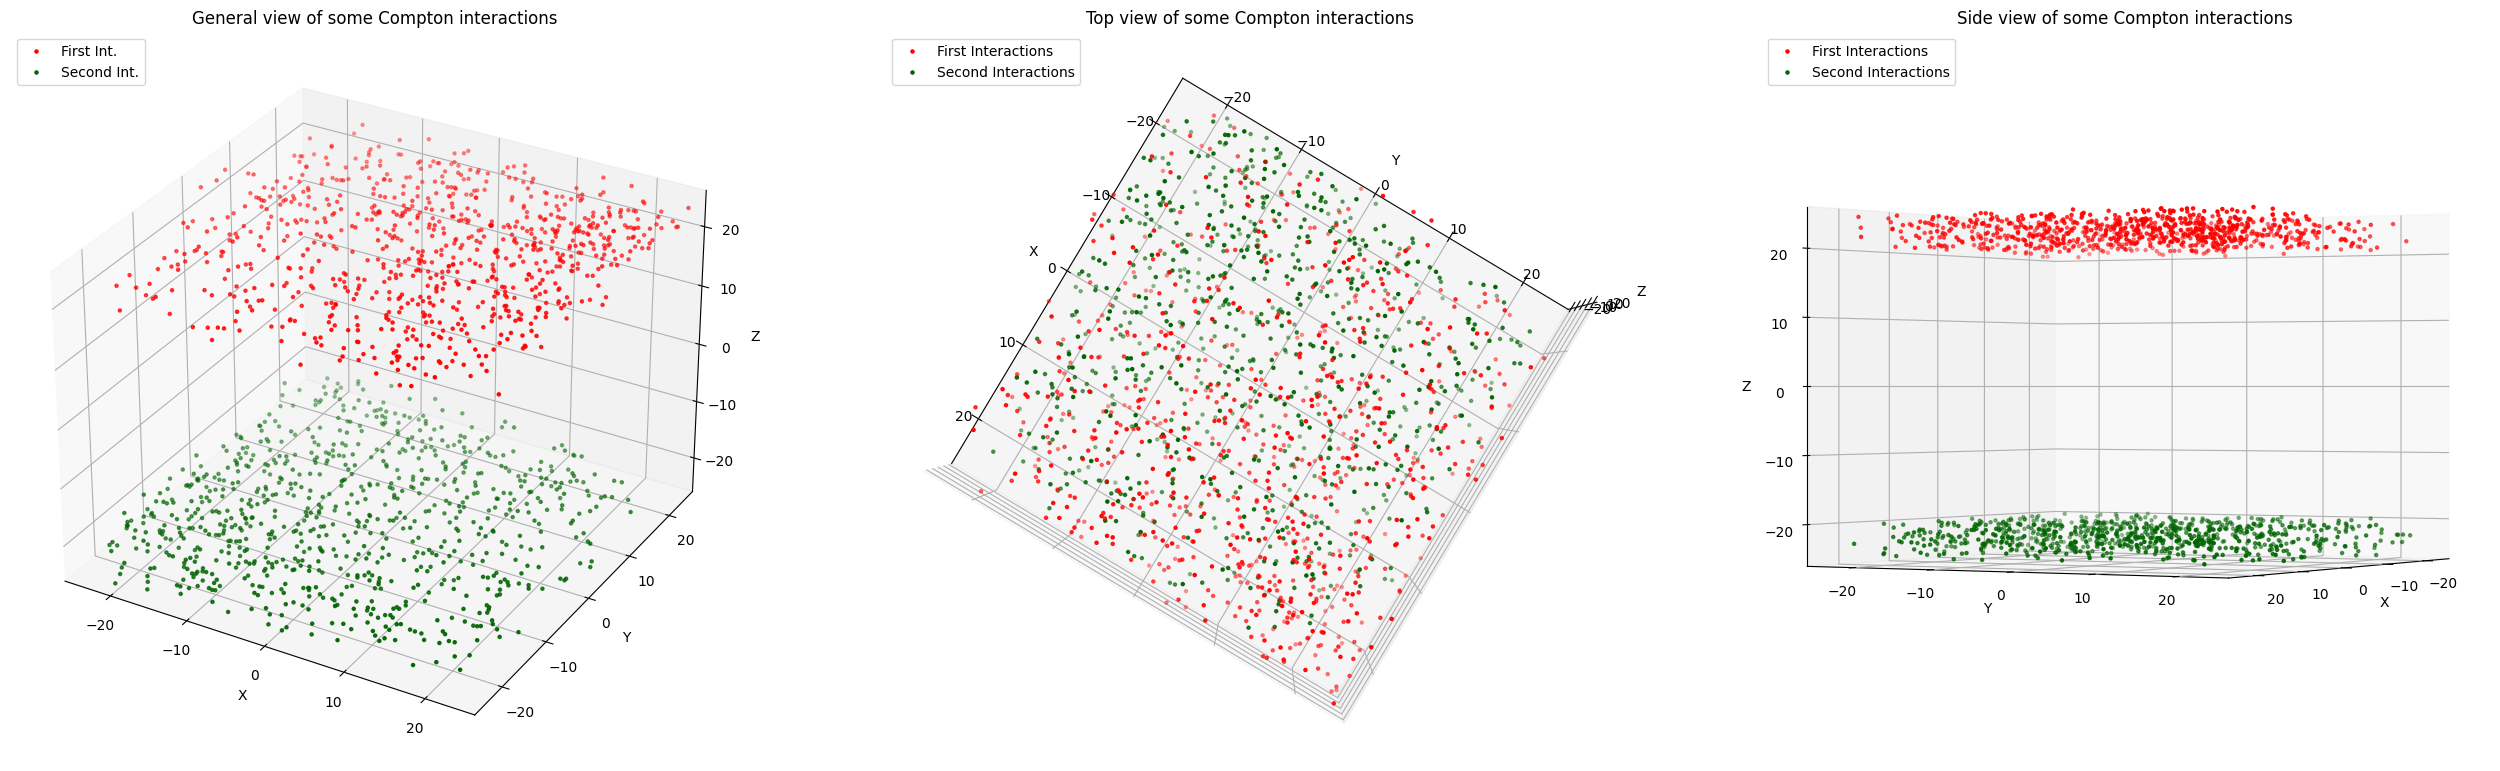

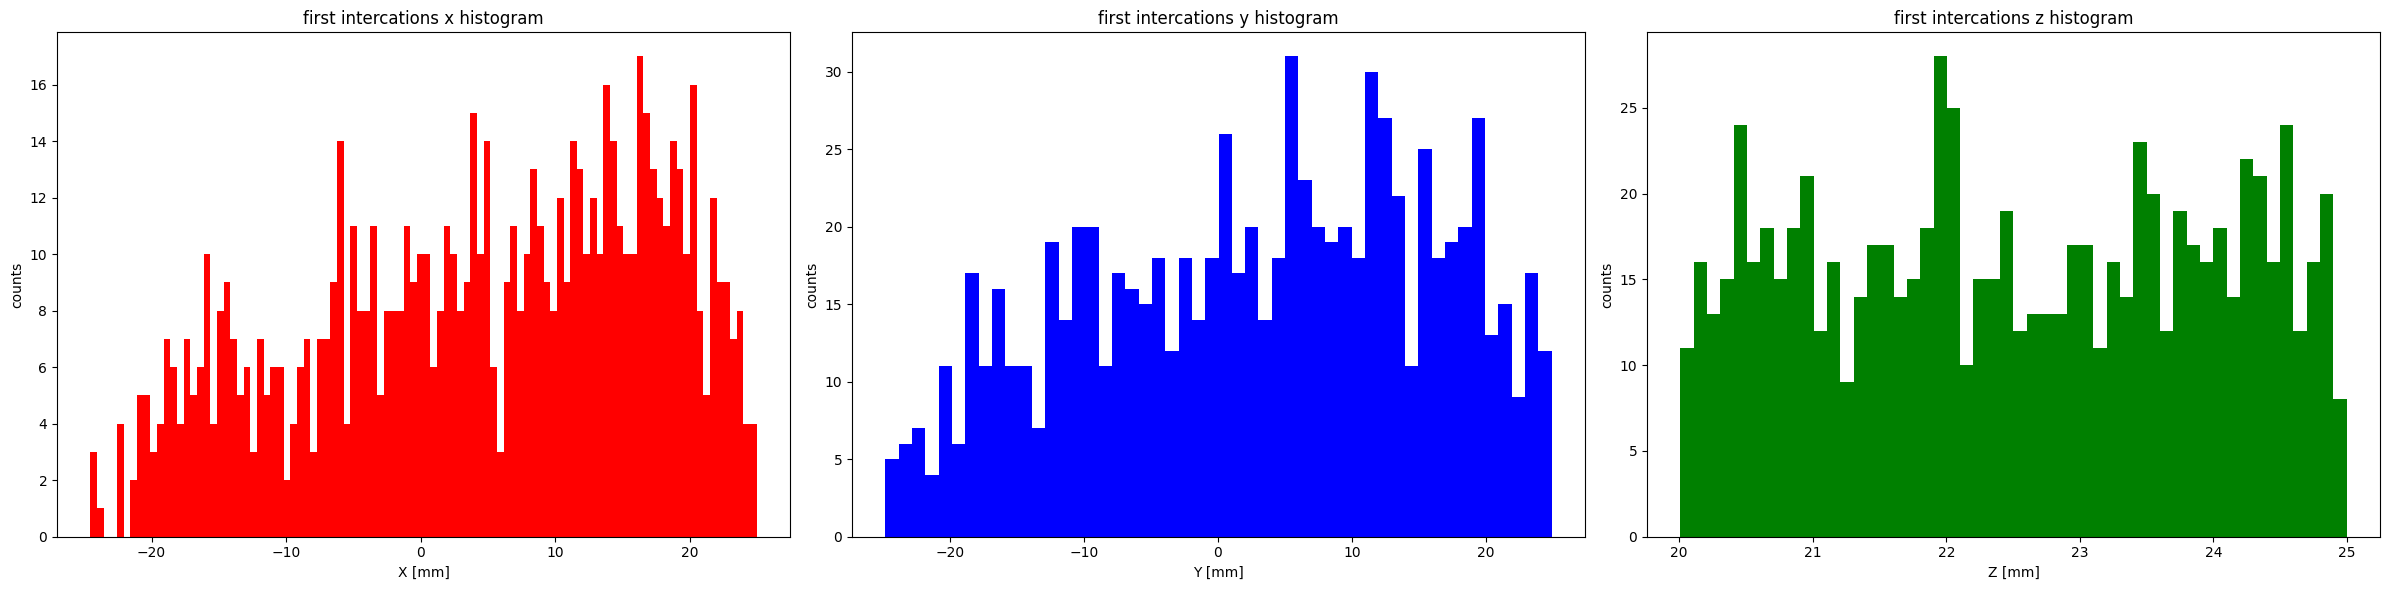

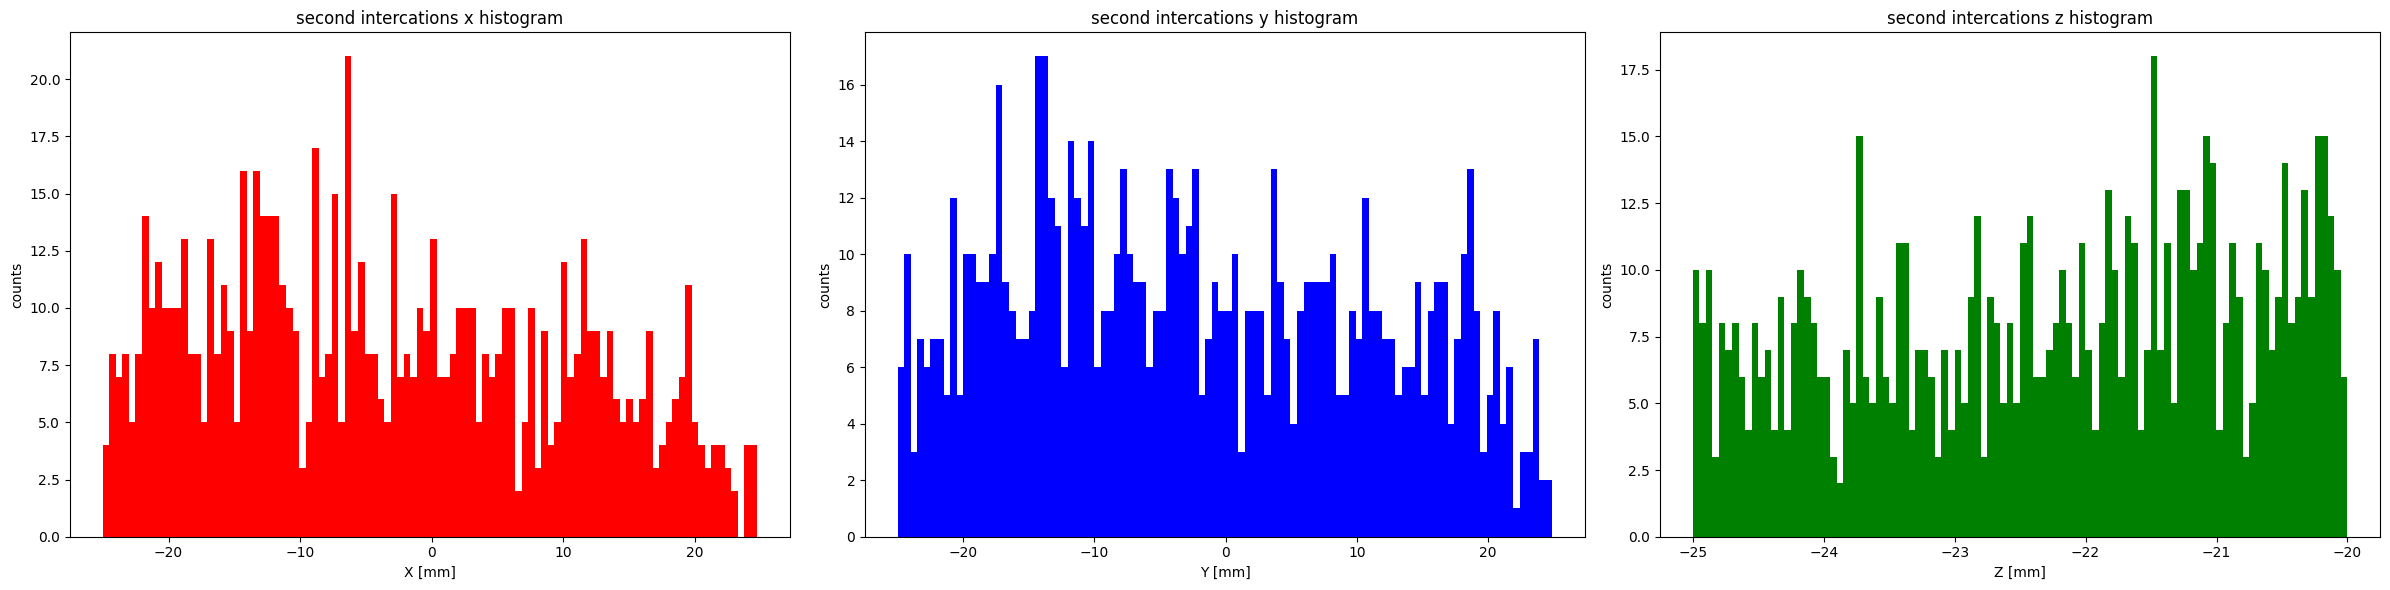

there are  16.0 voxels in a plane
[[-18.75 -18.75 -22.5 ]
 [-18.75 -18.75  22.5 ]
 [-18.75  -6.25 -22.5 ]
 [-18.75  -6.25  22.5 ]
 [-18.75   6.25 -22.5 ]
 [-18.75   6.25  22.5 ]
 [-18.75  18.75 -22.5 ]
 [-18.75  18.75  22.5 ]
 [ -6.25 -18.75 -22.5 ]
 [ -6.25 -18.75  22.5 ]
 [ -6.25  -6.25 -22.5 ]
 [ -6.25  -6.25  22.5 ]
 [ -6.25   6.25 -22.5 ]
 [ -6.25   6.25  22.5 ]
 [ -6.25  18.75 -22.5 ]
 [ -6.25  18.75  22.5 ]
 [  6.25 -18.75 -22.5 ]
 [  6.25 -18.75  22.5 ]
 [  6.25  -6.25 -22.5 ]
 [  6.25  -6.25  22.5 ]
 [  6.25   6.25 -22.5 ]
 [  6.25   6.25  22.5 ]
 [  6.25  18.75 -22.5 ]
 [  6.25  18.75  22.5 ]
 [ 18.75 -18.75 -22.5 ]
 [ 18.75 -18.75  22.5 ]
 [ 18.75  -6.25 -22.5 ]
 [ 18.75  -6.25  22.5 ]
 [ 18.75   6.25 -22.5 ]
 [ 18.75   6.25  22.5 ]
 [ 18.75  18.75 -22.5 ]
 [ 18.75  18.75  22.5 ]]
[[-18.75 -18.75 -22.5 ]
 [-18.75 -18.75  22.5 ]
 [-18.75  -6.25 -22.5 ]
 [-18.75  -6.25  22.5 ]
 [-18.75   6.25 -22.5 ]
 [-18.75   6.25  22.5 ]
 [-18.75  18.75 -22.5 ]
 [-18.75  18.75  22.5 ]
 [ -6

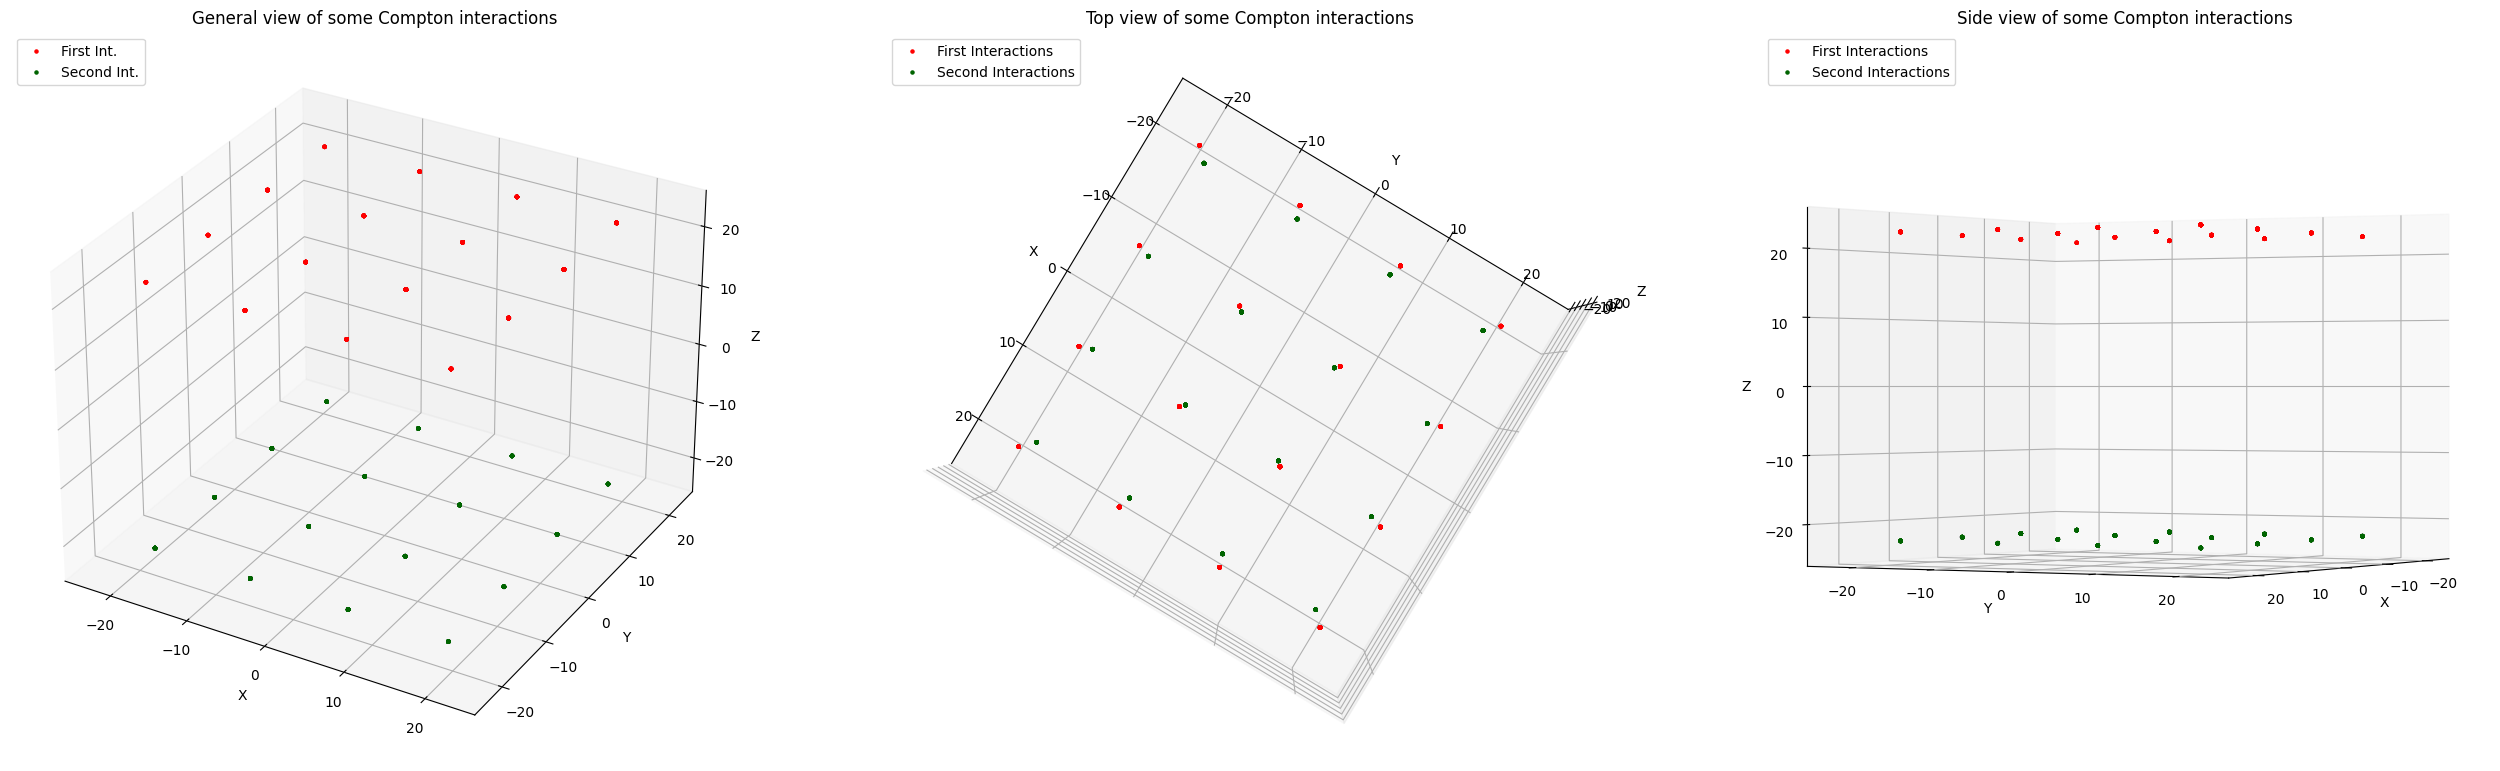

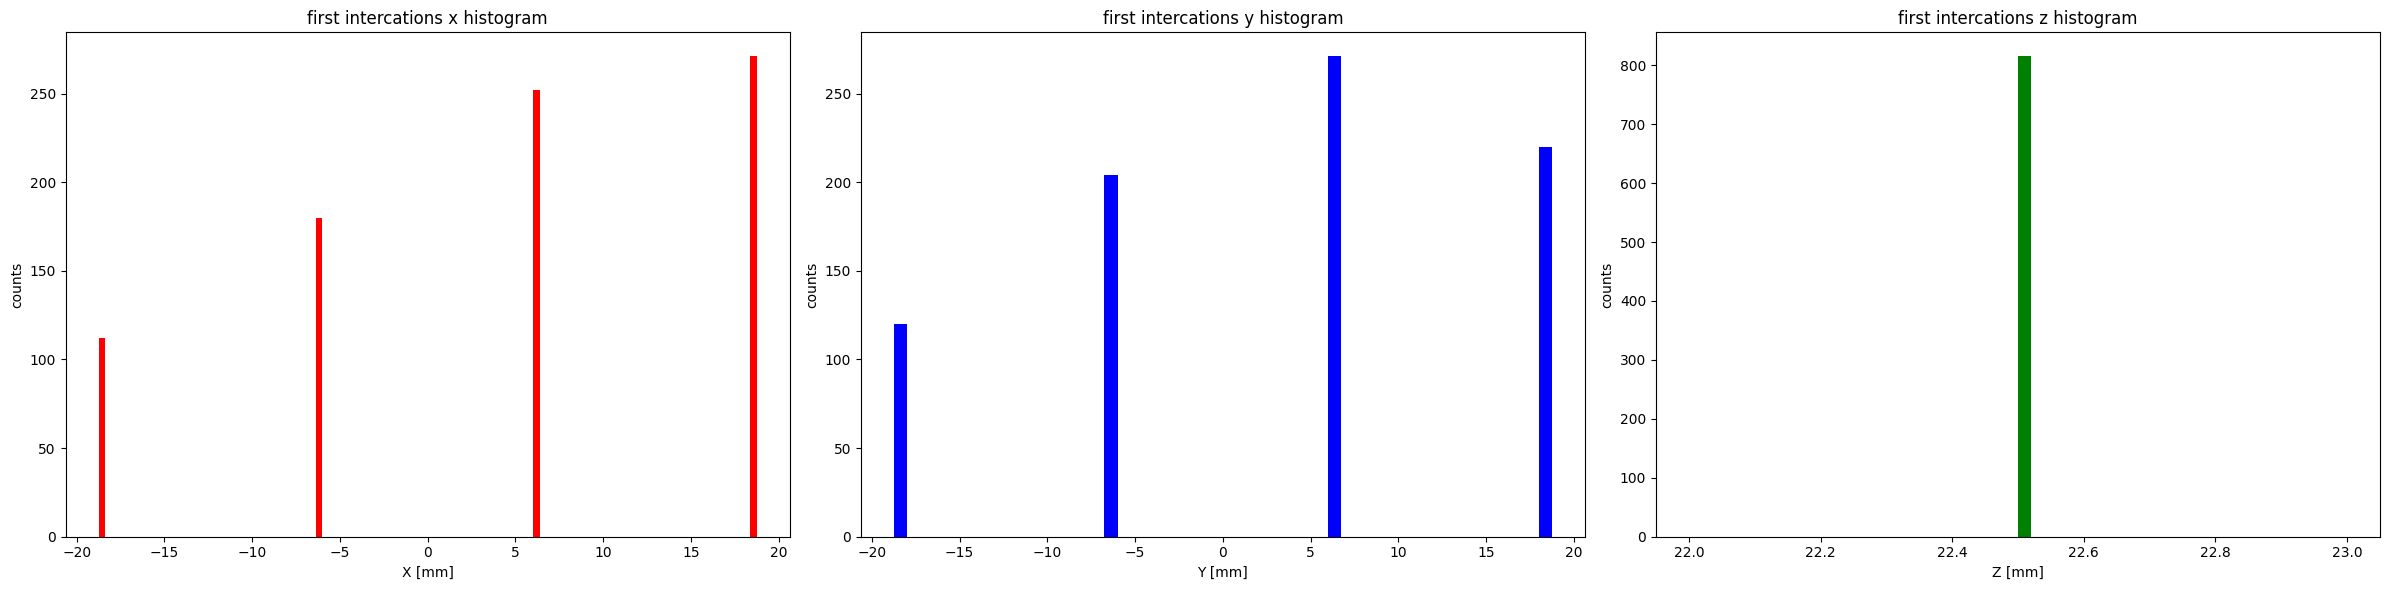

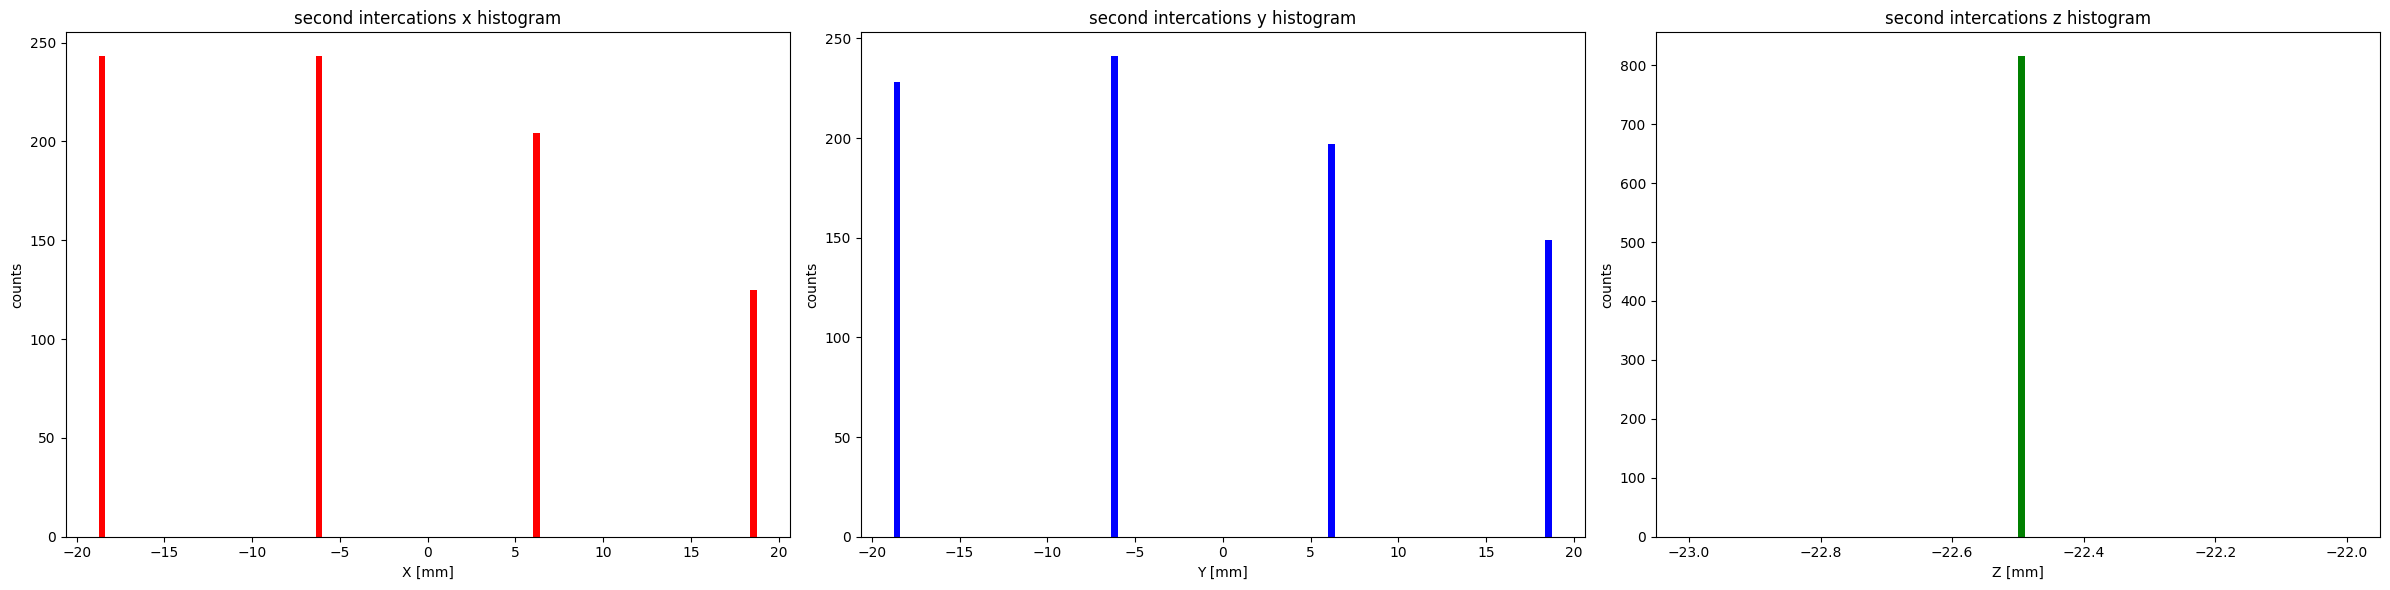

first_int_voxelized[0:5]
[[ 383.           40.17603613    6.25         18.75         22.5       ]
 [ 531.           82.32537264  -18.75         18.75         22.5       ]
 [ 829.           23.474031     -6.25         18.75         22.5       ]
 [ 983.          241.56341239   -6.25         -6.25         22.5       ]
 [1324.          126.01139841    6.25        -18.75         22.5       ]]
second_int_voxelized[0:5]
[[ 383.          101.56786621   -6.25        -18.75        -22.5       ]
 [ 531.          582.13439756  -18.75          6.25        -22.5       ]
 [ 829.          147.7140644   -18.75          6.25        -22.5       ]
 [ 983.          284.253154      6.25         -6.25        -22.5       ]
 [1324.          560.35928988  -18.75        -18.75        -22.5       ]]


In [ ]:
## MAIN
N = 20000
# file_90 = pd.read_csv(filename_90deg, header = None)
# ALL_90 = file_90.values
# ALL_90 = ALL_90[0:N, :]
# eventIdx_90 = ALL_90[0:N, 0]
# features_90 = ALL_90[0:N, 1:]
# temp = features_90
# features_90 = features_90[temp[:, 0] > 0]
# eventIdx_90 = eventIdx_90[temp[:, 0] > 0]
# features_90[:, 0] = 1000*features_90[:, 0] # MeV to KeV
# del ALL_90, file_90
#full_90 = FullSpectra(features_90[:, 0], eventIdx_90) # full_90 = [Event number, Total energy, Total number of interactions]
# need to add here resolution to the 662 KeV
#res = 8
#energy_with_res_90 = addRes(full_90[:, 1], res)
#
#longest_trajectory_90 = Counter(eventIdx_90).most_common()[0][1]

## visualization ##
#plotDataHist()
##

#features_90_by_event = enrg2tranj(features_90, eventIdx_90, longest_trajectory_90)


# Visualize_Camera(first_int[:-20000],second_int[:-20000])
# events_histograms(first_int[:-20000], second_int[:-20000])

Visualize_Camera(first_int,second_int)
events_histograms(first_int, second_int)

voxels_in_row = 4  # how the 50x50 plane will be divided

#voxelize
xvoxels, yvoxels, zvoxels = 50/voxels_in_row, 50/voxels_in_row, 5

num_of_voxels_on_plane = 50**2/(xvoxels*yvoxels)
print('there are ', num_of_voxels_on_plane, 'voxels in a plane')

first_int_voxelized  = convert_to_voxels(first_int[:,:], xvoxels, yvoxels, zvoxels)
second_int_voxelized = convert_to_voxels(second_int[:,:], xvoxels, yvoxels, zvoxels)
Visualize_Camera(first_int_voxelized,second_int_voxelized)
events_histograms(first_int_voxelized, second_int_voxelized)
first_int  = first_int_voxelized
second_int = second_int_voxelized

p1, v21, est_theta = sbpData(first_int_voxelized, second_int_voxelized)
v21 = -v21
p1 = p1
print('first_int_voxelized[0:5]')
print(first_int_voxelized[0:5])
print('second_int_voxelized[0:5]')
print(second_int_voxelized[0:5])

In [ ]:
first_int_voxelized[-20000:, 2:5]

array([[ 20. ,  10. ,  22.5],
       [ 10. ,  20. ,  22.5],
       [ 20. ,  10. ,  22.5],
       ...,
       [-20. , -20. , -22.5],
       [-20. , -20. , -22.5],
       [-20. , -20. , -22.5]])

In [ ]:
#np.save('/content/gdrive/MyDrive/CC_Thesis/data/Data_X100_Y100_#3/first_interaction_voxelized' , first_int_voxelized)
#np.save('/content/gdrive/MyDrive/CC_Thesis/data/Data_X100_Y100_#3/second_interaction_voxelized' , second_int_voxelized)

<ipython-input-115-64c9962292b8>:95: RuntimeWarning: invalid value encountered in divide
  v_orth = v_orth / np.linalg.norm(v_orth)


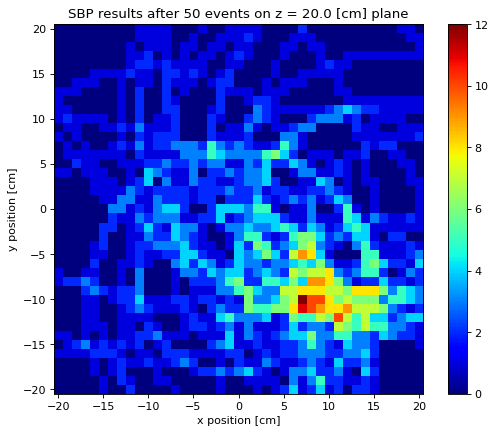

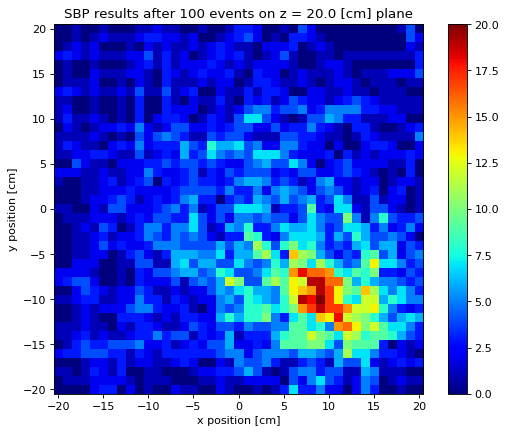

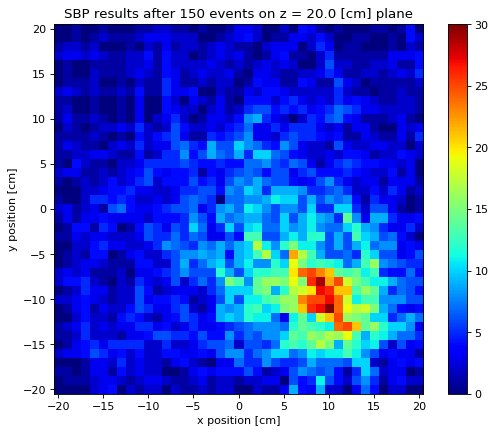

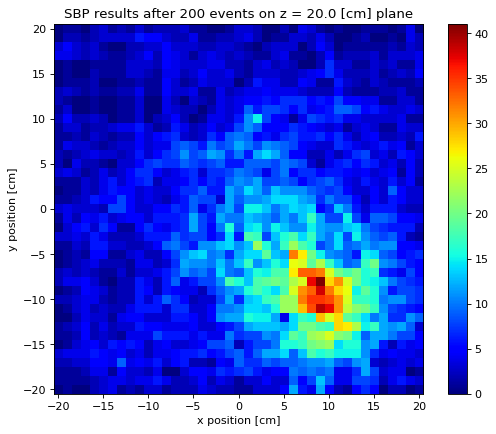

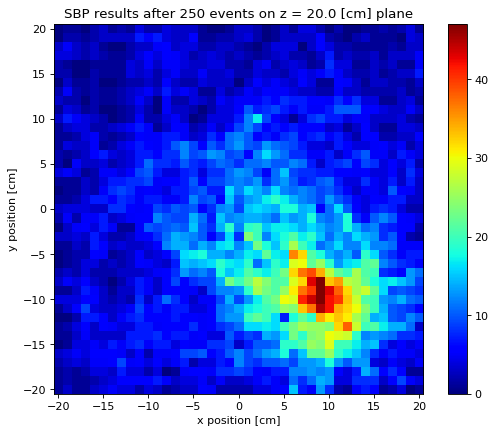

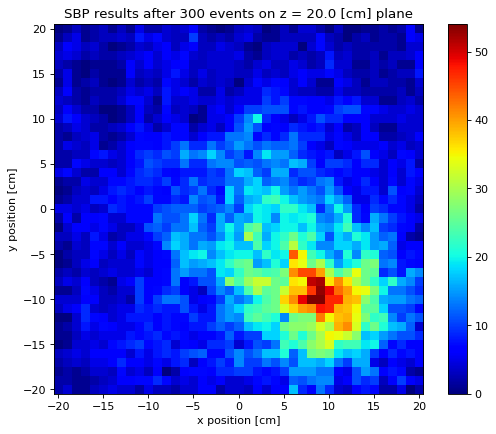

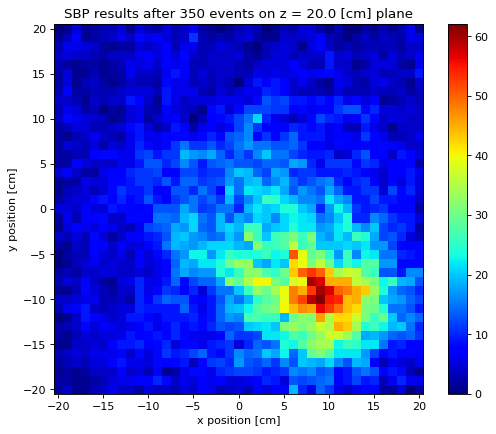

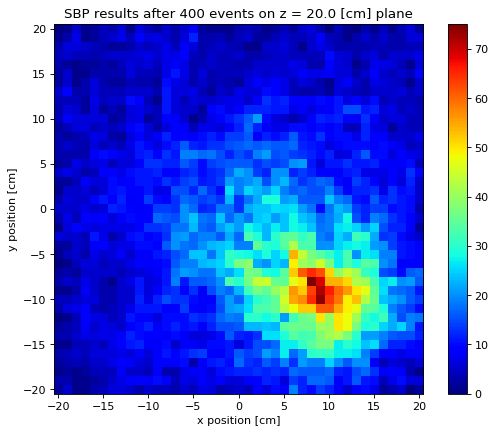

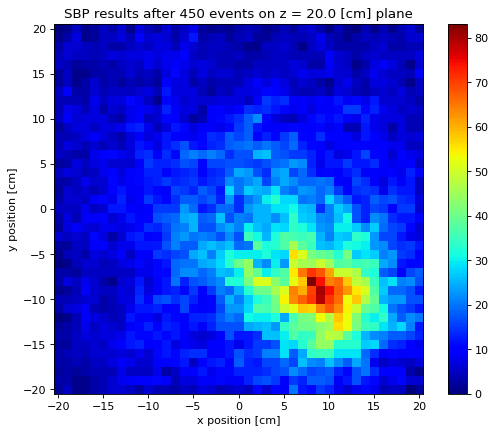

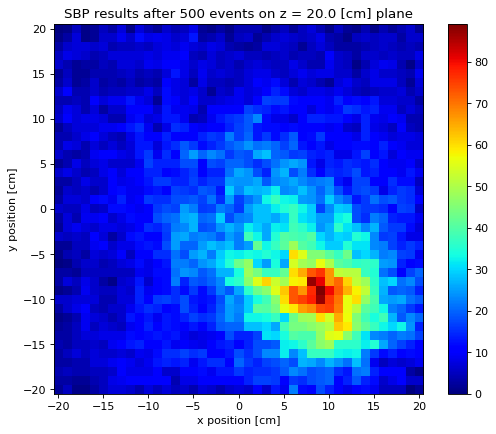

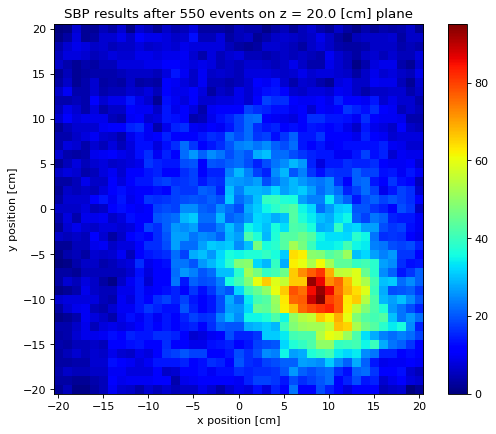

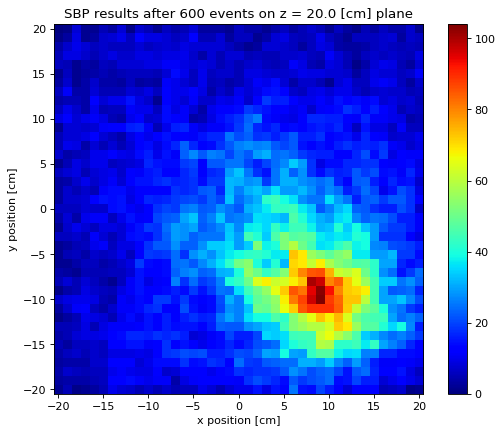

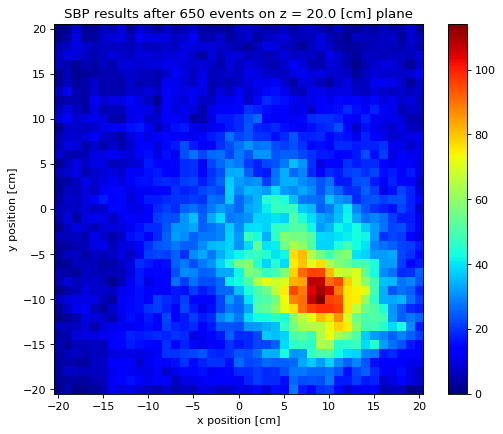

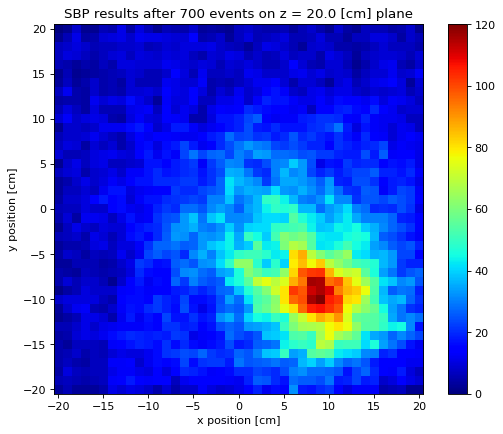

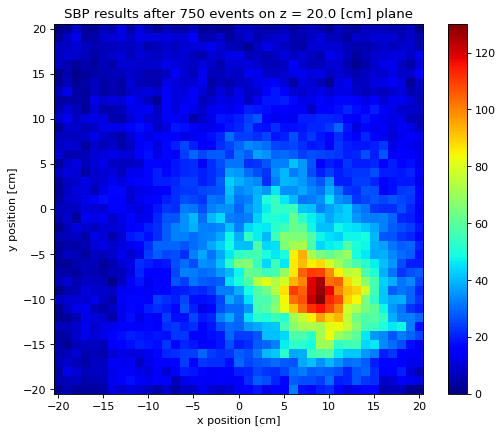

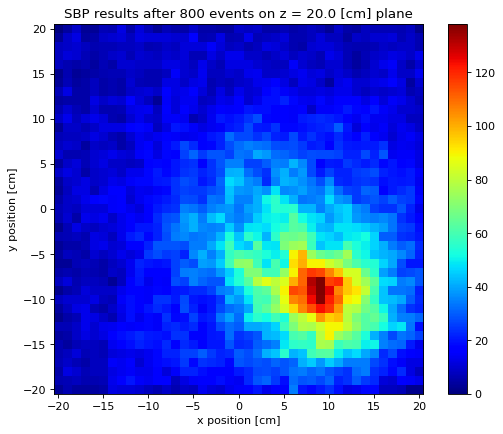

In [ ]:
## Simple Back Projection ##

plane_z_axis = 200
target_1 = plane_z_axis # defines img zise to be 1/6 world
image_size = 2 * target_1 + 1
image_res = 10 # make the image to appear at [cm]
imageTOT = np.zeros((image_size, image_size))
coneNumDeg = 360
x = np.zeros((N, coneNumDeg))
y = np.zeros((N, coneNumDeg))
imageTOT, x, y = sbpAlgo(p1, v21, est_theta, plane_z_axis, target_1, image_res, coneNumDeg)


# Chapter 2 - Channel Union - Old Method


In [ ]:
def find_voxel_centers(height, width, depth, voxel_Xsize, voxel_Ysize, voxel_Zsize, xmin, ymin, zmin):
    x_coords = np.arange(xmin + voxel_Xsize / 2, xmin + width,  voxel_Xsize)
    y_coords = np.arange(ymin + voxel_Ysize / 2, ymin + height, voxel_Ysize)
    z_coords = np.arange(zmin + voxel_Zsize / 2, zmin + depth,  voxel_Zsize)

    voxel_centers = np.array(np.meshgrid(x_coords, y_coords, z_coords)).T.reshape(-1, 3)
    return voxel_centers

def delete_inner_voxel_centers(voxel_centers, height, width, depth, voxel_Xsize, voxel_Ysize, voxel_Zsize, xmin, ymin, zmin):
    voxel_centers_filtered = []
    for center in voxel_centers:
        x, y, z = center
        #print(xmin + voxel_size/2,x == xmin + width  -  voxel_size/2 )
        x_on_shell = (x == xmin + voxel_Xsize/2 or x == xmin + width  -  voxel_Xsize/2)
        y_on_shell = (y == ymin + voxel_Ysize/2 or y == ymin + height -  voxel_Ysize/2)
        z_on_shell = (z == zmin + voxel_Zsize/2 or z == zmin + depth  -  voxel_Zsize/2)
        if x_on_shell or y_on_shell or z_on_shell:
            voxel_centers_filtered.append(center)
    return np.array(voxel_centers_filtered)

def replace_coordinates_with_indices(interaction_data, shell_voxel_centers):
    indexed_interaction_data = np.copy(interaction_data)
    for i in range(len(shell_voxel_centers)):
        x, y, z = shell_voxel_centers[i]
        indices = np.where((indexed_interaction_data[:, -3] == x) & (indexed_interaction_data[:, -2] == y) & (indexed_interaction_data[:, -1] == z))[0]
        indexed_interaction_data[indices, -3:] = i
    return indexed_interaction_data

def create_voxels_matrice_connectivity(size):
  # Create a 2D array with ones on the diagonal
  arr = np.zeros((size,size))

  # Assign values to the upper triangular half
  for i in range(size):
    #for j in range(i + 1, size):
    if np.where(arr[i] == 1)[0].size == 0: # means there is no 1's on the i'th row that is not on the diagonal
        # Randomly choose one position in the upper triangular half
        # Count the occurrences of '1' in each column
        column_counts = np.sum(arr == 1, axis=0)

        # Identify the columns where '1' appears only once
        good_cols = np.where(column_counts == 0)[0]
        pos = np.random.choice(good_cols[np.where(good_cols > i)])
        arr[i,pos] = 1
        arr[pos,i] = 1
  return arr
"""
def add_relative_voxel_rows(indexed_interaction_data, shell_voxel_centers, connectivity_matrix):
    extended_data = []
    for i, row in enumerate(indexed_interaction_data):
        extended_data.append(row)
        relative_indices = np.where(connectivity_matrix[row[2].astype(int), :] == 1)[0]
        for j in relative_indices:
            extended_row = np.copy(row)
            extended_row[2] = j
            extended_data.append(extended_row)
    extended_data = np.array(extended_data)
    return extended_data
"""
def add_relative_voxel_rows(indexed_interaction_data, indexed_other_interaction_data, shell_voxel_centers, connectivity_matrix):
    extended_data = []
    for i, row in enumerate(indexed_interaction_data):
        extended_data.append(row)
        relative_indices = np.where(connectivity_matrix[indexed_other_interaction_data[i,2].astype(int), :] == 1)[0]
        for j in relative_indices:
            extended_row = np.copy(row)
            extended_row[2] = j
            extended_data.append(extended_row)
    extended_data = np.array(extended_data)
    return extended_data

In [ ]:
camera_size = [50, 50, 50]
voxel_cube_size = 5
camera_minimum_corner = [-25, -25, -25]
voxel_centers = find_voxel_centers(camera_size[0],camera_size[1],camera_size[2],voxel_cube_size,voxel_cube_size,voxel_cube_size,camera_minimum_corner[0],camera_minimum_corner[1],camera_minimum_corner[2])
shell_voxels = delete_inner_voxel_centers(voxel_centers,camera_size[0],camera_size[1],camera_size[2],voxel_cube_size,voxel_cube_size,voxel_cube_size,camera_minimum_corner[0],camera_minimum_corner[1],camera_minimum_corner[2])
indexed_first_int = replace_coordinates_with_indices(first_int_voxelized[:N],shell_voxels)[:,:3] # [photon_index,energy,voxel_index]
indexed_second_int = replace_coordinates_with_indices(second_int_voxelized[:N],shell_voxels)[:,:3] # [photon_index,energy,voxel_index]
connectivity_matrice = create_voxels_matrice_connectivity(shell_voxels.shape[0])
extended_indexed_first_int = add_relative_voxel_rows(indexed_first_int,indexed_second_int,shell_voxels,connectivity_matrice)
print(first_int_voxelized[0:15])
print(indexed_first_int[0:15])
print(extended_indexed_first_int[:10])

[[ 42.    407.348  -2.5    17.5    22.5  ]
 [ 68.    382.96  -22.5   -12.5    17.5  ]
 [ 80.    184.04   22.5    22.5    17.5  ]
 [ 81.    291.788  22.5    -7.5   -17.5  ]
 [ 87.    174.795 -17.5   -12.5    22.5  ]
 [106.     40.232  22.5   -17.5    17.5  ]
 [111.    255.96    7.5    12.5    22.5  ]
 [115.     56.84  -22.5    -2.5   -12.5  ]
 [118.     74.86  -12.5    22.5     7.5  ]
 [133.    246.744  12.5    -7.5    22.5  ]
 [134.    437.084  -2.5    -2.5    22.5  ]
 [168.    283.371 -22.5     2.5    -7.5  ]
 [170.    187.818   2.5    -7.5    22.5  ]
 [186.    104.633  17.5    22.5    -7.5  ]
 [194.    429.44  -17.5    -2.5    22.5  ]]
[[ 42.    407.348 436.   ]
 [ 68.    382.96  354.   ]
 [ 80.    184.04  387.   ]
 [ 81.    291.788 129.   ]
 [ 87.    174.795 400.   ]
 [106.     40.232 379.   ]
 [111.    255.96  455.   ]
 [115.     56.84  140.   ]
 [118.     74.86  293.   ]
 [133.    246.744 461.   ]
 [134.    437.084 432.   ]
 [168.    283.371 177.   ]
 [170.    187.818 441.   ]
 [1

In [ ]:
voxel_centers.shape

(1000, 3)

In [ ]:
shell_voxels.shape[0]

488

In [ ]:
extended_indexed_second_int = add_relative_voxel_rows(indexed_second_int,indexed_first_int,shell_voxels,connectivity_matrice)

In [ ]:
extended_indexed_first_int[:,0]

array([4.20000e+01, 4.20000e+01, 6.80000e+01, ..., 1.84572e+05,
       1.84582e+05, 1.84582e+05])

In [ ]:
extended_indexed_first_int.shape

(40000, 3)

In [ ]:
extended_indexed_second_int.shape

(40000, 3)

In [ ]:
print(first_int_voxelized[0:10])
print(extended_indexed_first_int[0:10])

[[ 42.    407.348  -2.5    17.5    22.5  ]
 [ 68.    382.96  -22.5   -12.5    17.5  ]
 [ 80.    184.04   22.5    22.5    17.5  ]
 [ 81.    291.788  22.5    -7.5   -17.5  ]
 [ 87.    174.795 -17.5   -12.5    22.5  ]
 [106.     40.232  22.5   -17.5    17.5  ]
 [111.    255.96    7.5    12.5    22.5  ]
 [115.     56.84  -22.5    -2.5   -12.5  ]
 [118.     74.86  -12.5    22.5     7.5  ]
 [133.    246.744  12.5    -7.5    22.5  ]]
[[ 42.    407.348 436.   ]
 [ 42.    407.348  90.   ]
 [ 68.    382.96  354.   ]
 [ 68.    382.96  479.   ]
 [ 80.    184.04  387.   ]
 [ 80.    184.04  313.   ]
 [ 81.    291.788 129.   ]
 [ 81.    291.788  26.   ]
 [ 87.    174.795 400.   ]
 [ 87.    174.795 115.   ]]


In [ ]:
first_int = extended_indexed_first_int
num_rows = first_int.shape[0]
first_int = np.hstack((first_int, np.zeros((num_rows, 2))))
first_int[:, 2] = shell_voxels[extended_indexed_first_int[:, 2].astype(int), 0]
first_int[:, 3] = shell_voxels[extended_indexed_first_int[:, 2].astype(int), 1]
first_int[:, 4] = shell_voxels[extended_indexed_first_int[:, 2].astype(int), 2]
second_int = extended_indexed_second_int
num_rows = second_int.shape[0]
second_int = np.hstack((second_int, np.zeros((num_rows, 2))))
second_int[:, 2] = shell_voxels[extended_indexed_second_int[:, 2].astype(int), 0]
second_int[:, 3] = shell_voxels[extended_indexed_second_int[:, 2].astype(int), 1]
second_int[:, 4] = shell_voxels[extended_indexed_second_int[:, 2].astype(int), 2]
p1, v21, est_theta = sbpData(Angle=90)
v21 = -v21
p1 = p1
print('first_int[0:10]')
print(first_int[0:10])

first_int[0:10]
[[ 42.    407.348  -2.5    17.5    22.5  ]
 [ 42.    407.348 -22.5   -12.5   -12.5  ]
 [ 68.    382.96  -22.5   -12.5    17.5  ]
 [ 68.    382.96   12.5    12.5   -22.5  ]
 [ 80.    184.04   22.5    22.5    17.5  ]
 [ 80.    184.04   22.5   -17.5   -17.5  ]
 [ 81.    291.788  22.5    -7.5   -17.5  ]
 [ 81.    291.788 -22.5     2.5    -2.5  ]
 [ 87.    174.795 -17.5   -12.5    22.5  ]
 [ 87.    174.795 -22.5     2.5    12.5  ]]


<ipython-input-5-99c9d55c00b0>:108: RuntimeWarning: divide by zero encountered in double_scalars
  alpha = (plane_z_axis - p1[2]) / v_tag[2]
<ipython-input-5-99c9d55c00b0>:109: RuntimeWarning: invalid value encountered in multiply
  location = p1 + alpha*v_tag
<ipython-input-5-99c9d55c00b0>:44: RuntimeWarning: invalid value encountered in divide
  v = v / np.linalg.norm(v)
<ipython-input-5-99c9d55c00b0>:96: RuntimeWarning: invalid value encountered in divide
  v_orth = v_orth / np.linalg.norm(v_orth)


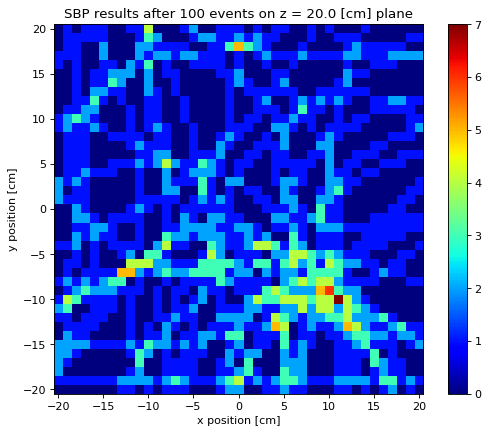

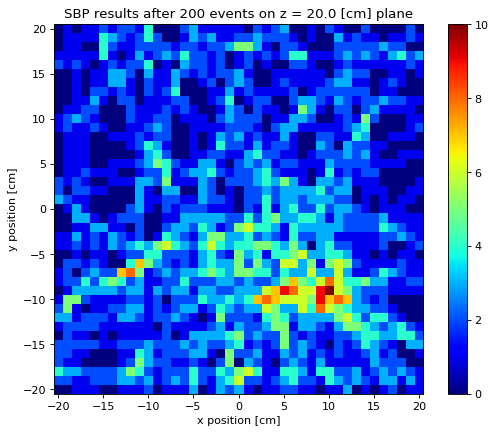

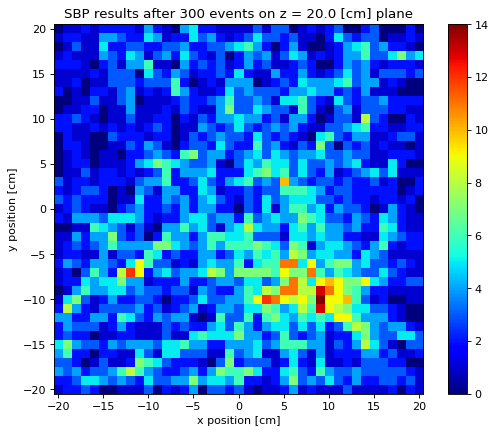

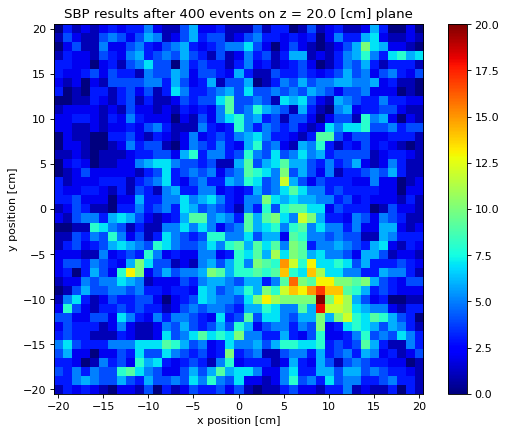

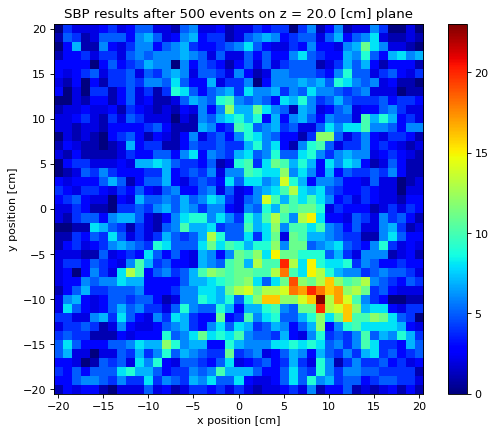

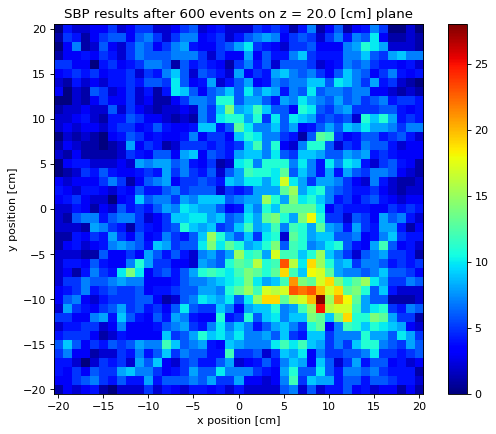

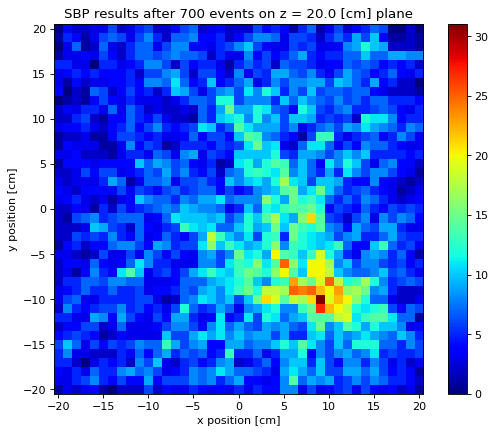

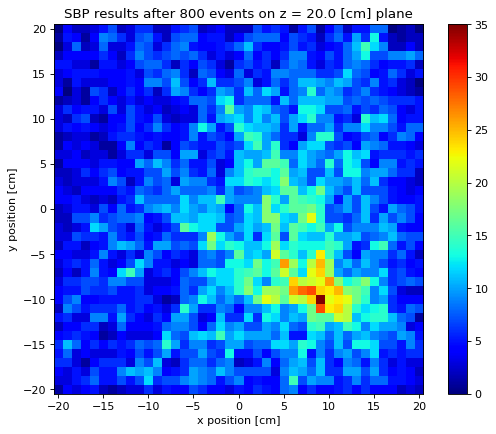

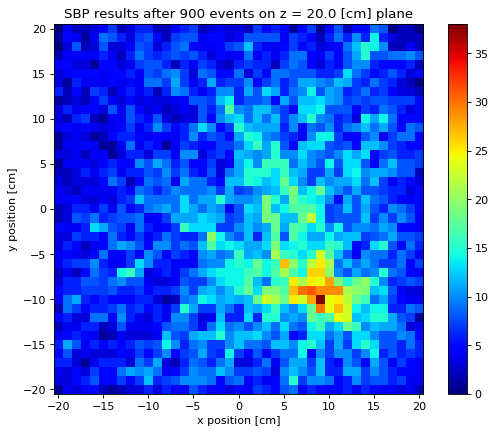

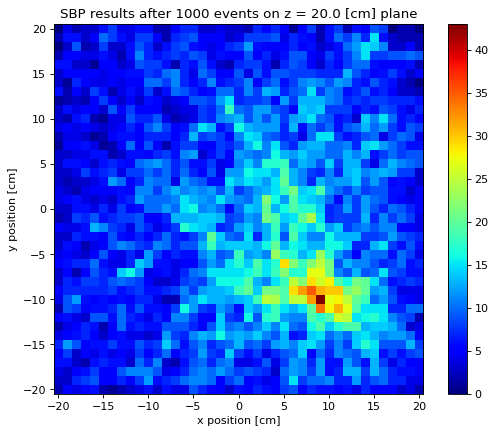

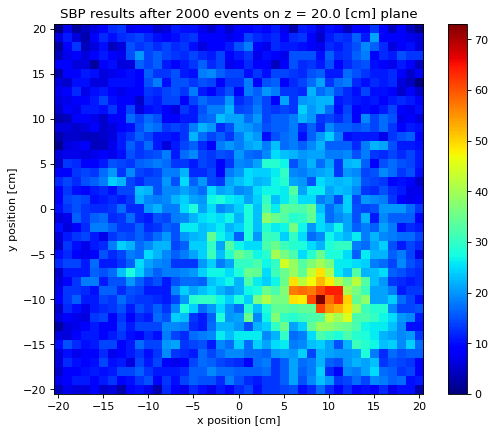

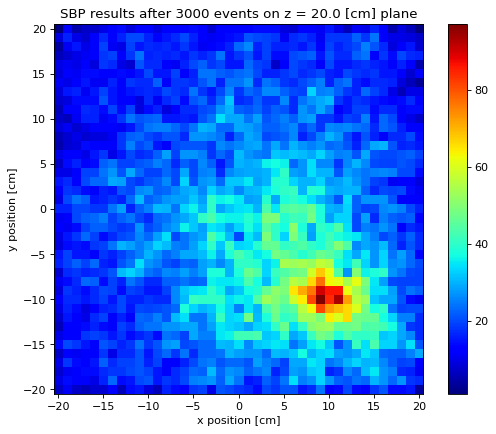

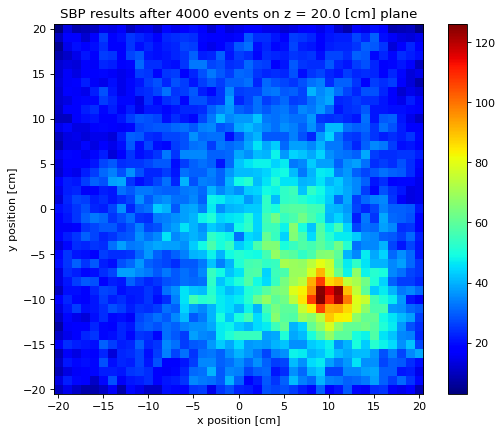

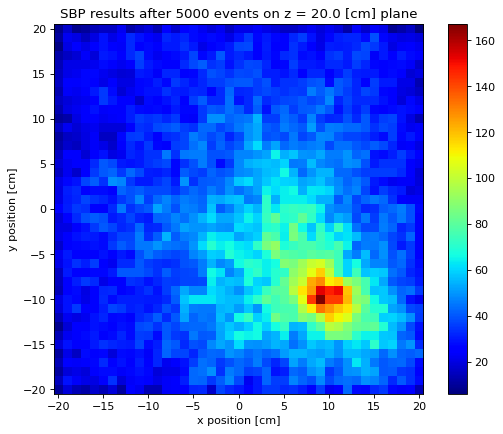

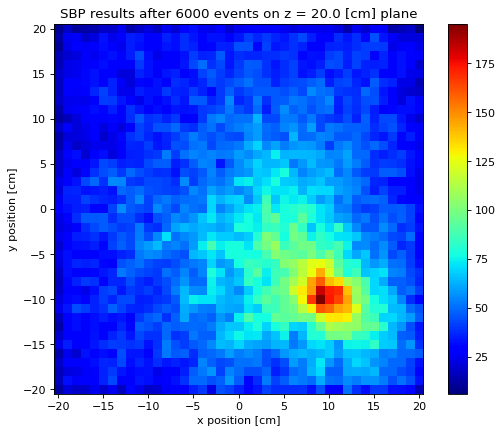

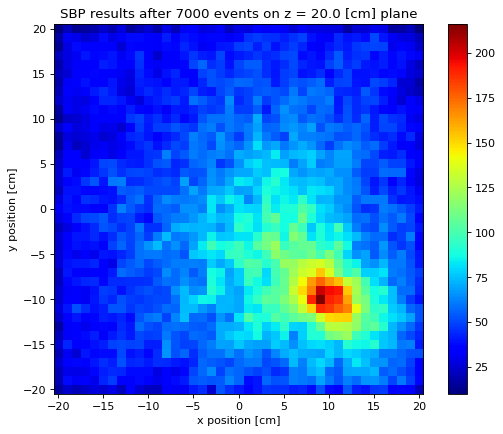

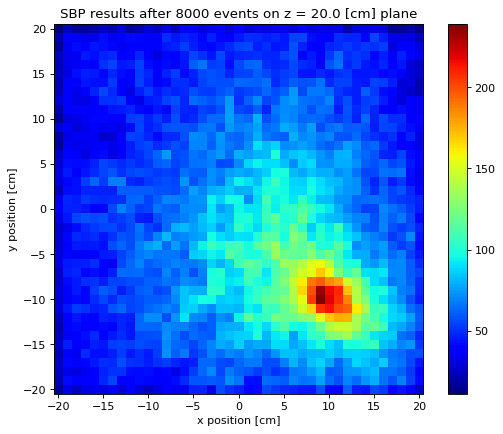

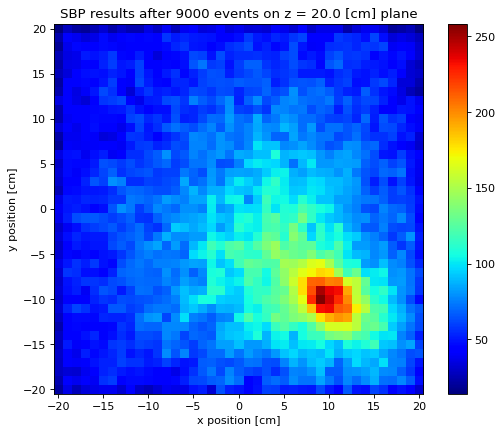

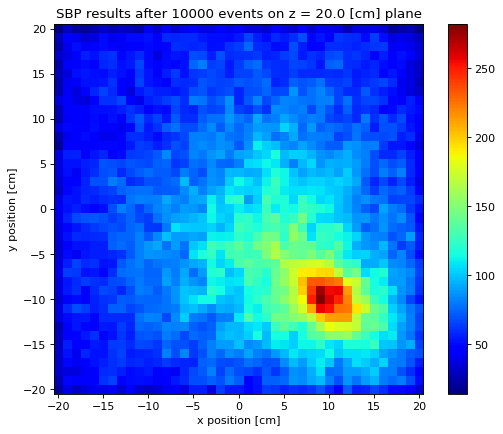

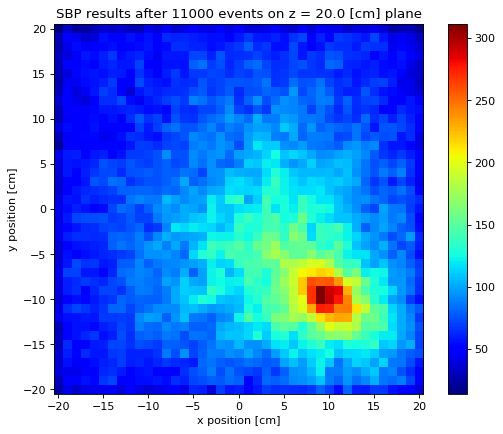

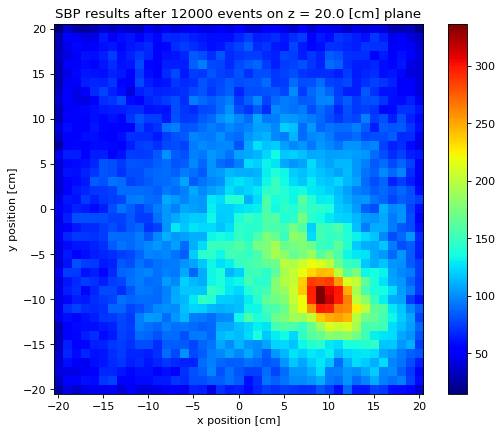

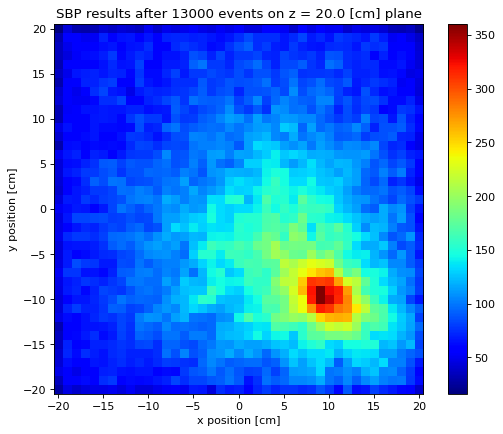

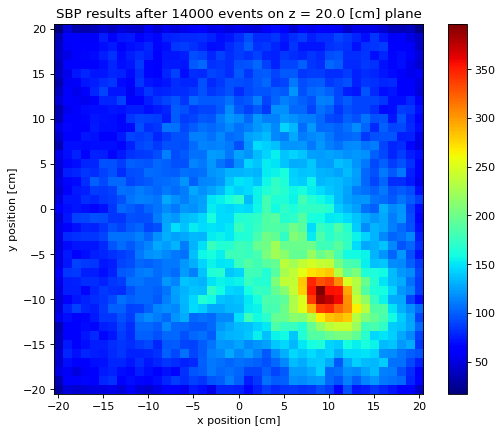

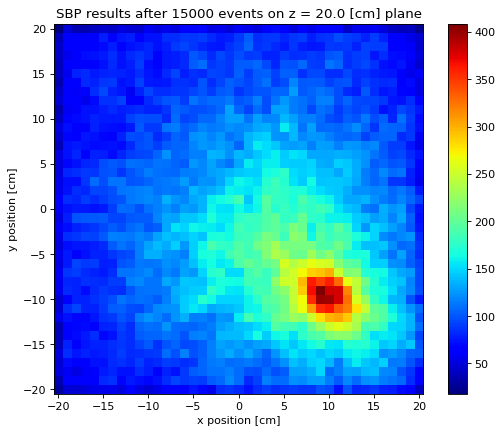

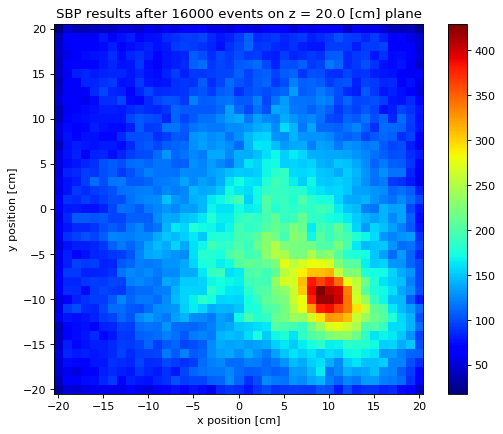

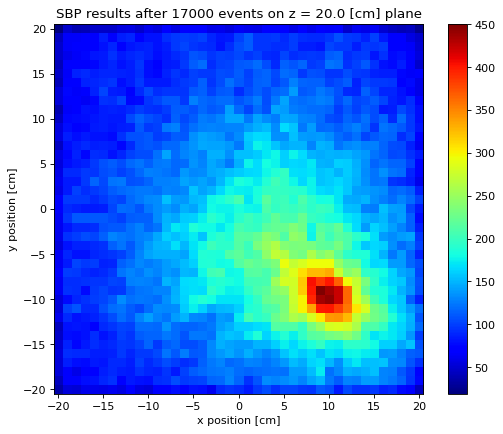

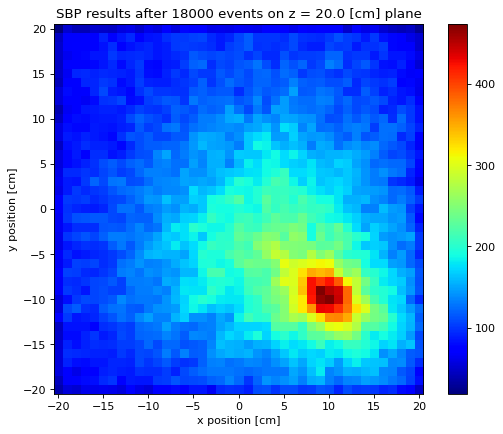

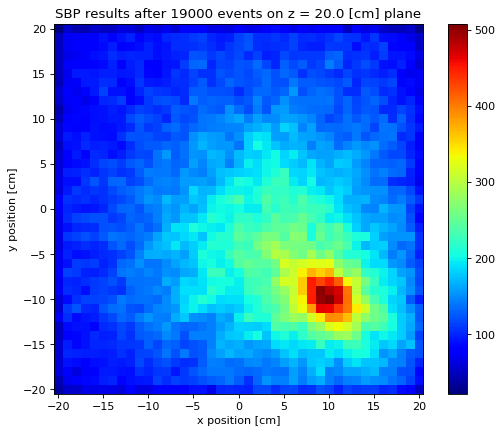

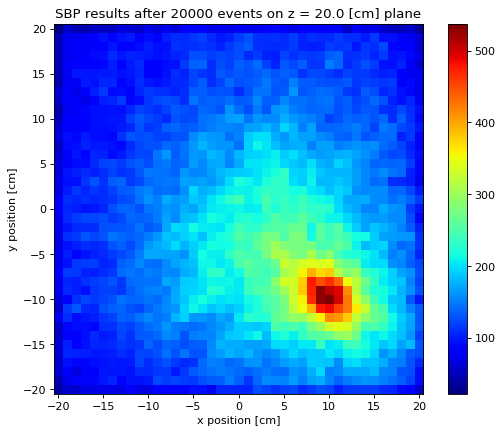

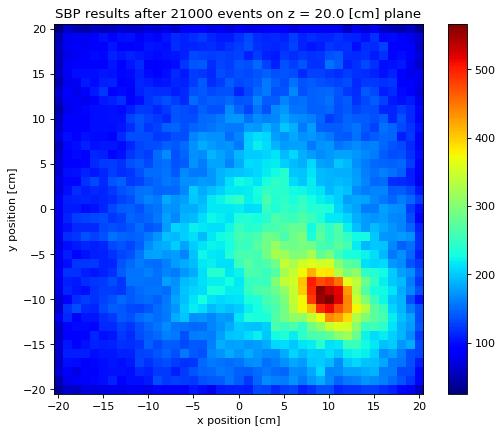

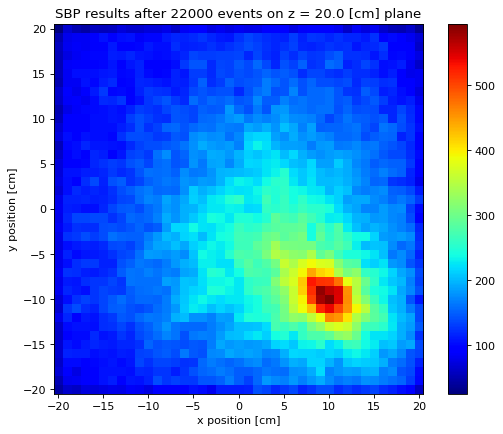

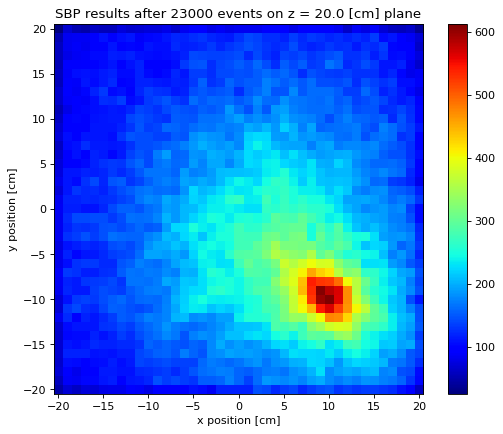

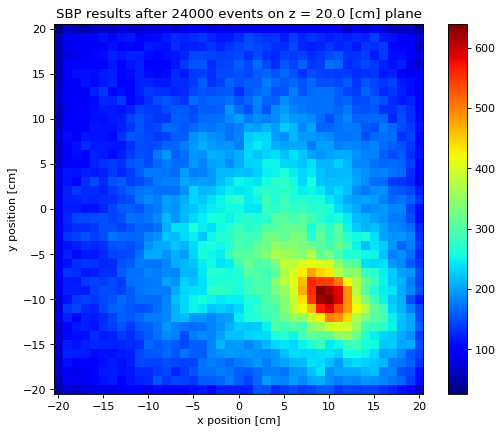

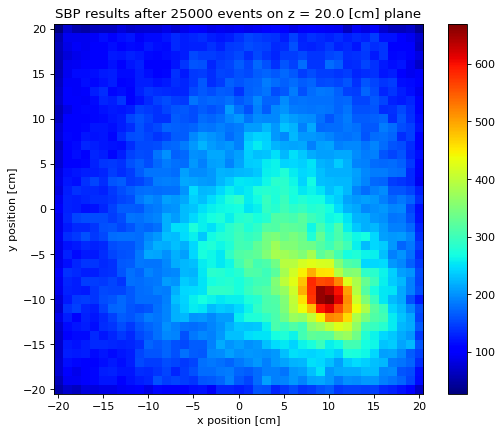

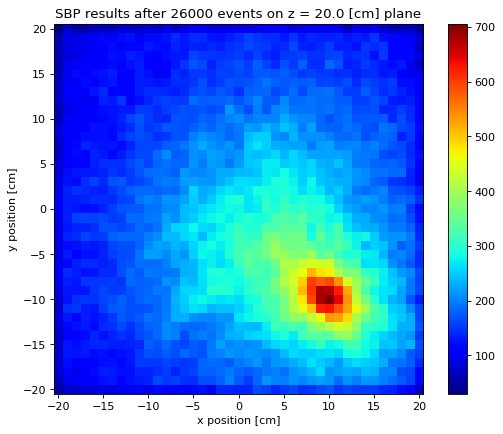

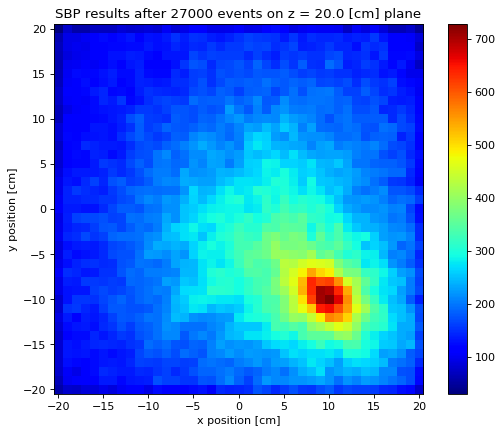

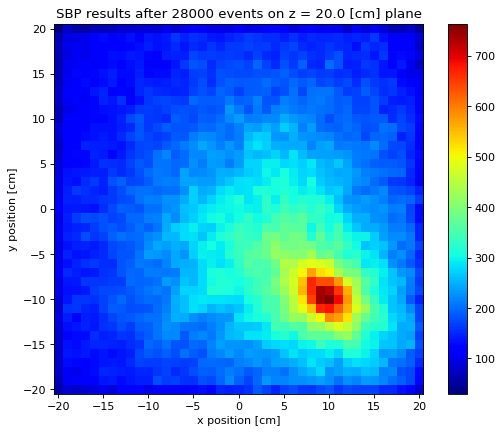

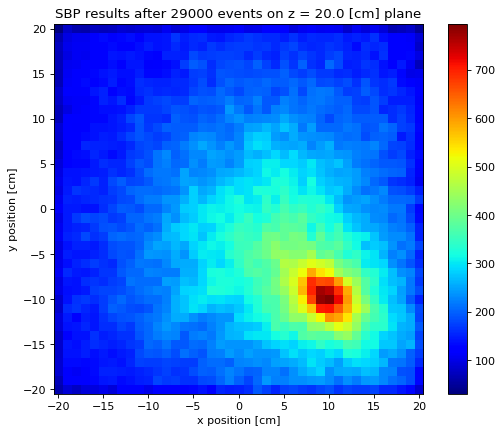

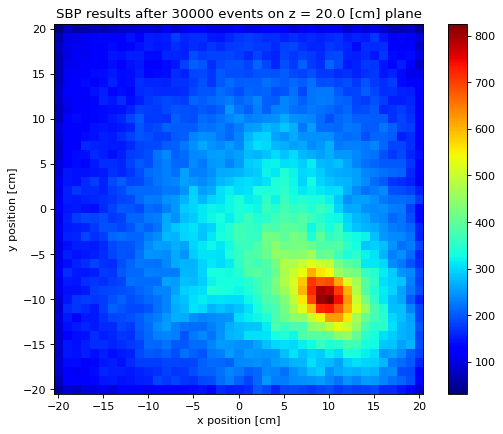

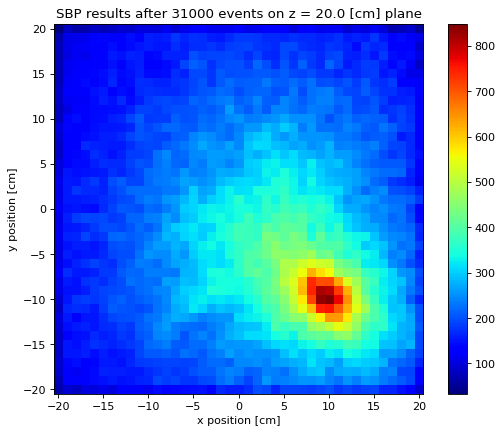

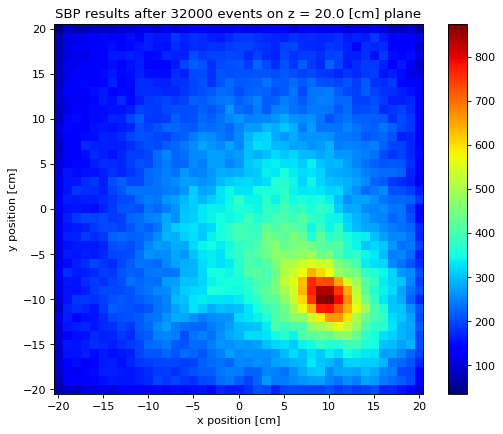

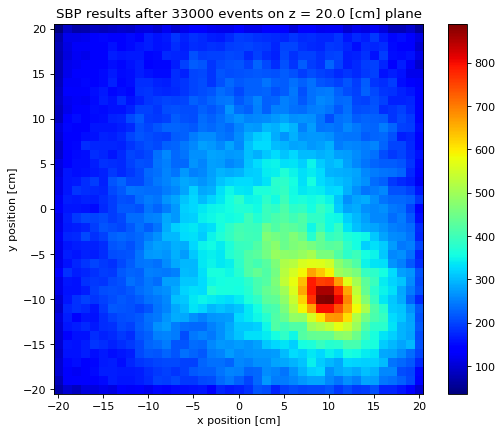

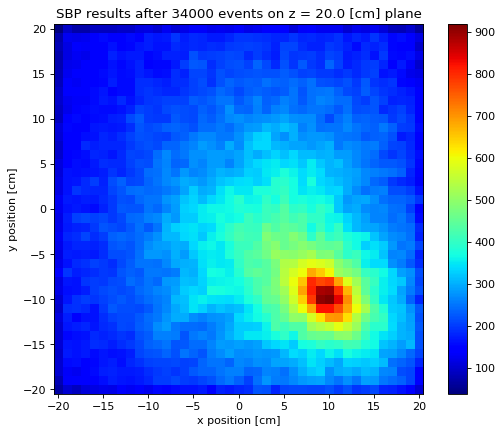

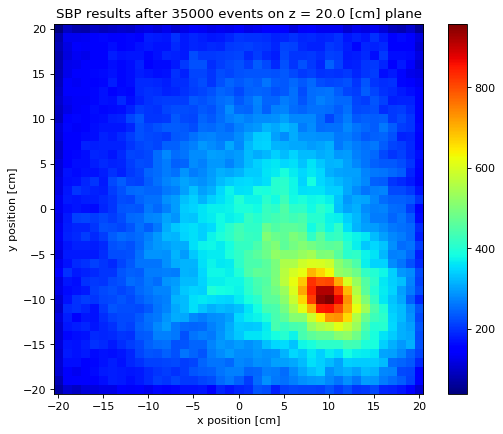

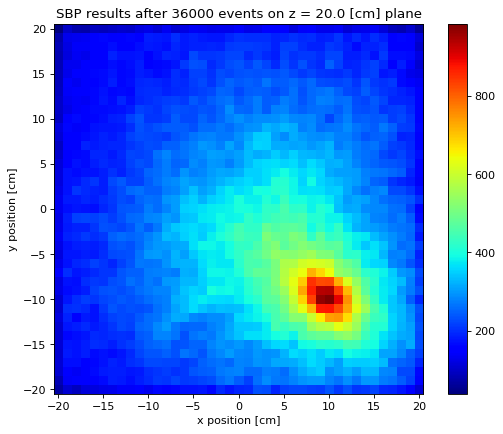

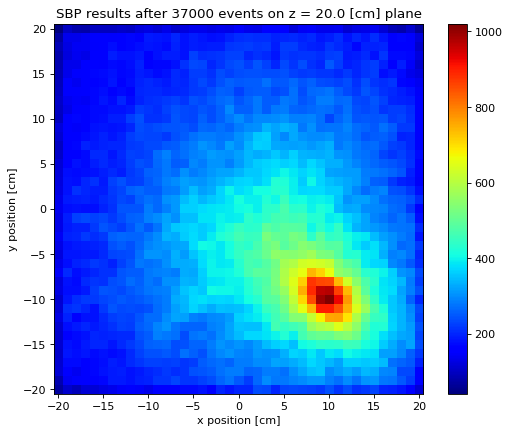

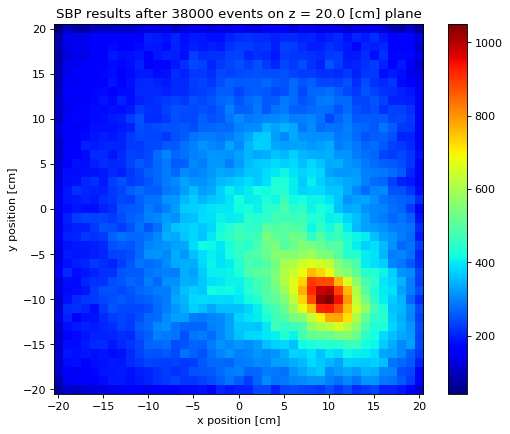

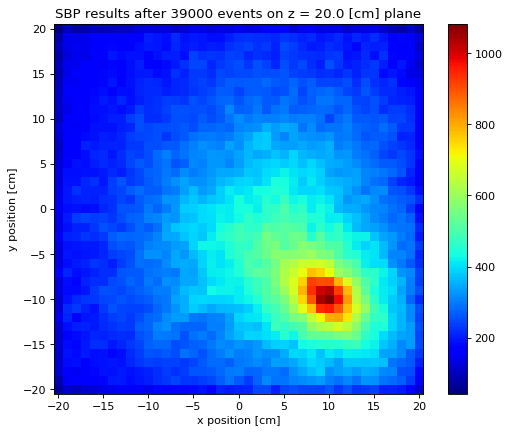

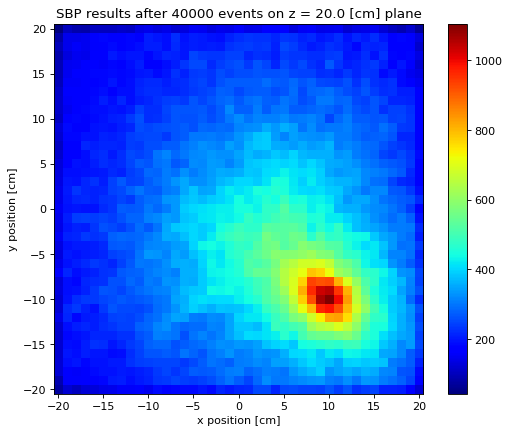

In [ ]:
## Simple Back Projection ##
plane_z_axis = 200
target_1 = plane_z_axis # defines img zise to be 1/6 world
image_size = 2 * target_1 + 1
image_res = 10 # make the image to appear at [cm]
imageTOT = np.zeros((image_size, image_size))
N = 2*N
imageTOT = sbpAlgo(p1, v21, est_theta, plane_z_axis, target_1, image_res,360)
##

# Chapter 3 - The General Channel Union - Old Method

In [ ]:
# # # # # T B D # # # # # #
import random

def divide_into_random_groups(size, channels_to_unite, seed): # seed ensures reproducibility
    # Set the seed for random number generation
    random.seed(seed)
    # Create an array of numbers from 0 to size - 1
    numbers = np.arange(size)

    # Shuffle the numbers randomly
    random.shuffle(numbers)

    # Divide the shuffled numbers into random groups of size channels_to_unite
    groups = [numbers[i:i + channels_to_unite] for i in range(0, size, channels_to_unite)]

    # Convert the groups to NumPy arrays
    groups = [np.array(group) for group in groups]

    return groups

def create_general_voxels_matrice_connectivity(size, channels_to_unite, seed):
    # Initialize a size x size matrix filled with zeros
    groups = divide_into_random_groups(size, channels_to_unite, seed)
    similarity_matrix = np.zeros((size, size))

    # Iterate through groups and set the matrix elements accordingly
    for group_index, group in enumerate(groups):
        for i in group:
            for j in group:
                similarity_matrix[i, j] = 1
    np.fill_diagonal(similarity_matrix, 0)
    if is_symmetric(similarity_matrix) == False:
      return null
    return similarity_matrix
"""
def add_general_relative_voxel_rows(indexed_interaction_data, indexed_other_interaction_data, shell_voxel_centers, connectivity_matrix):

    extended_data = []
    for i, row in enumerate(indexed_interaction_data):
        extended_data.append(row)
        relative_indices = np.where(connectivity_matrix[indexed_other_interaction_data[i,2].astype(int), :] == 1)[0]
        for j in relative_indices:
            extended_row = np.copy(row)
            extended_row[2] = j
            extended_data.append(extended_row)
    extended_data = np.array(extended_data)

    return extended_data
 """
def is_symmetric(matrix):
    # Check if the matrix is square (number of rows = number of columns)
    num_rows = len(matrix)
    num_cols = len(matrix[0])
    if num_rows != num_cols:
        return False

    # Compare the matrix to its transpose
    for i in range(num_rows):
        for j in range(num_cols):
            if matrix[i][j] != matrix[j][i]:
                return False

    return True

In [ ]:
channels_to_union = 4
general_connectivity_matrice = create_general_voxels_matrice_connectivity(shell_voxels.shape[0], channels_to_union)
general_extended_indexed_first_int  = add_relative_voxel_rows(indexed_first_int,indexed_second_int,shell_voxels,general_connectivity_matrice)
general_extended_indexed_second_int = add_relative_voxel_rows(indexed_second_int,indexed_first_int,shell_voxels,general_connectivity_matrice)
print(first_int_voxelized[0:15])
print(indexed_first_int[0:15])
print(general_extended_indexed_first_int[:10])

[[ 42.    407.348  -2.5    17.5    22.5  ]
 [ 68.    382.96  -22.5   -12.5    17.5  ]
 [ 80.    184.04   22.5    22.5    17.5  ]
 [ 81.    291.788  22.5    -7.5   -17.5  ]
 [ 87.    174.795 -17.5   -12.5    22.5  ]
 [106.     40.232  22.5   -17.5    17.5  ]
 [111.    255.96    7.5    12.5    22.5  ]
 [115.     56.84  -22.5    -2.5   -12.5  ]
 [118.     74.86  -12.5    22.5     7.5  ]
 [133.    246.744  12.5    -7.5    22.5  ]
 [134.    437.084  -2.5    -2.5    22.5  ]
 [168.    283.371 -22.5     2.5    -7.5  ]
 [170.    187.818   2.5    -7.5    22.5  ]
 [186.    104.633  17.5    22.5    -7.5  ]
 [194.    429.44  -17.5    -2.5    22.5  ]]
[[ 42.    407.348 436.   ]
 [ 68.    382.96  354.   ]
 [ 80.    184.04  387.   ]
 [ 81.    291.788 129.   ]
 [ 87.    174.795 400.   ]
 [106.     40.232 379.   ]
 [111.    255.96  455.   ]
 [115.     56.84  140.   ]
 [118.     74.86  293.   ]
 [133.    246.744 461.   ]
 [134.    437.084 432.   ]
 [168.    283.371 177.   ]
 [170.    187.818 441.   ]
 [1

In [ ]:
first_int = general_extended_indexed_first_int
num_rows = first_int.shape[0]
first_int = np.hstack((first_int, np.zeros((num_rows, 2))))
first_int[:, 2] = shell_voxels[general_extended_indexed_first_int[:, 2].astype(int), 0]
first_int[:, 3] = shell_voxels[general_extended_indexed_first_int[:, 2].astype(int), 1]
first_int[:, 4] = shell_voxels[general_extended_indexed_first_int[:, 2].astype(int), 2]
second_int = general_extended_indexed_second_int
num_rows = second_int.shape[0]
second_int = np.hstack((second_int, np.zeros((num_rows, 2))))
second_int[:, 2] = shell_voxels[general_extended_indexed_second_int[:, 2].astype(int), 0]
second_int[:, 3] = shell_voxels[general_extended_indexed_second_int[:, 2].astype(int), 1]
second_int[:, 4] = shell_voxels[general_extended_indexed_second_int[:, 2].astype(int), 2]
p1, v21, est_theta = sbpData(Angle=90)
v21 = -v21
p1 = p1
print('first_int[0:10]')
print(first_int[0:10])

first_int[0:10]
[[ 42.    407.348  -2.5    17.5    22.5  ]
 [ 42.    407.348  22.5    22.5   -22.5  ]
 [ 42.    407.348 -22.5   -22.5   -17.5  ]
 [ 42.    407.348  22.5   -22.5    22.5  ]
 [ 68.    382.96  -22.5   -12.5    17.5  ]
 [ 68.    382.96   -7.5   -12.5   -22.5  ]
 [ 68.    382.96   -7.5   -17.5    22.5  ]
 [ 68.    382.96    7.5    -7.5    22.5  ]
 [ 80.    184.04   22.5    22.5    17.5  ]
 [ 80.    184.04    2.5   -22.5   -22.5  ]]


<ipython-input-5-99c9d55c00b0>:108: RuntimeWarning: divide by zero encountered in double_scalars
  alpha = (plane_z_axis - p1[2]) / v_tag[2]
<ipython-input-5-99c9d55c00b0>:109: RuntimeWarning: invalid value encountered in multiply
  location = p1 + alpha*v_tag
<ipython-input-5-99c9d55c00b0>:44: RuntimeWarning: invalid value encountered in divide
  v = v / np.linalg.norm(v)
<ipython-input-5-99c9d55c00b0>:96: RuntimeWarning: invalid value encountered in divide
  v_orth = v_orth / np.linalg.norm(v_orth)


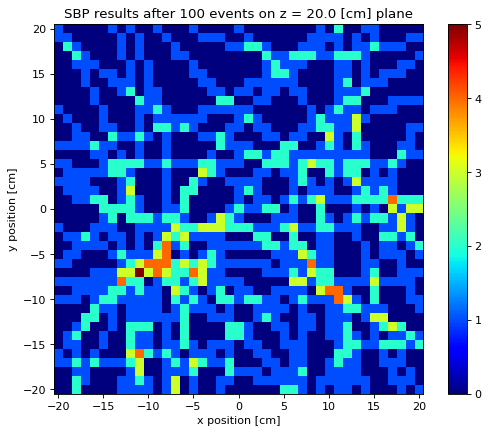

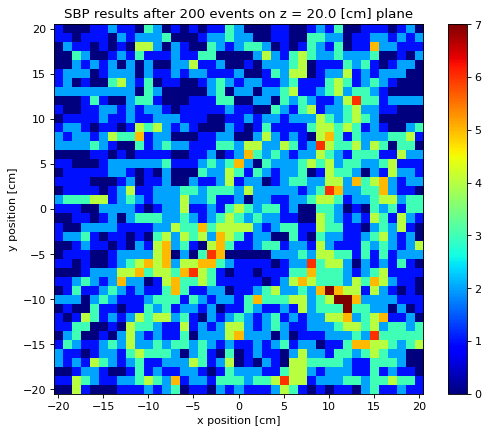

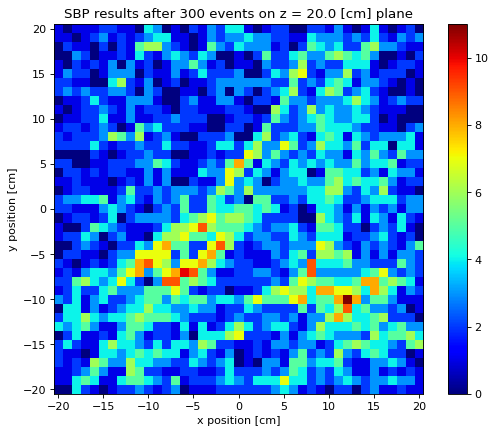

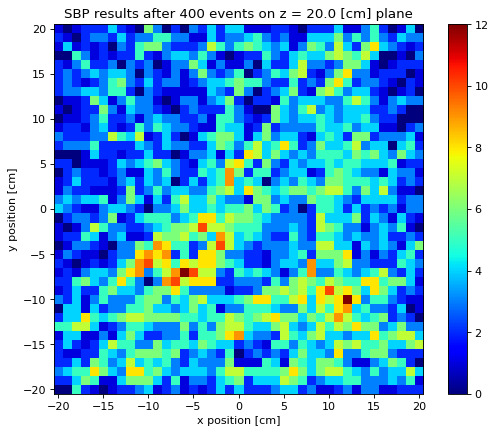

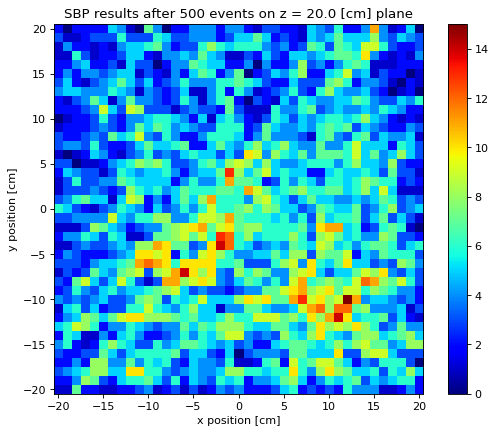

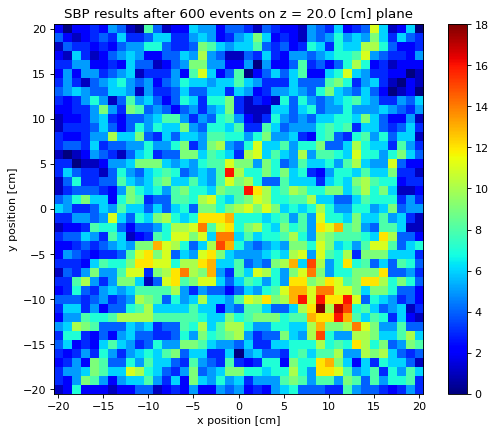

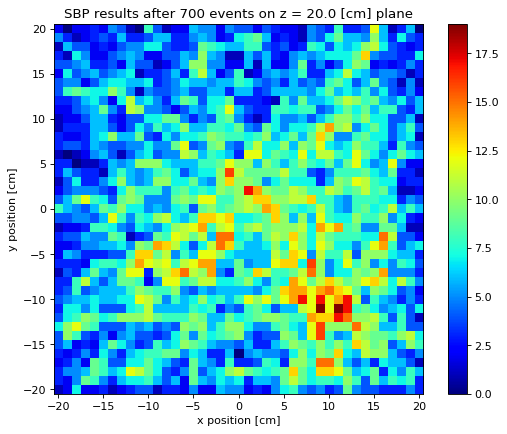

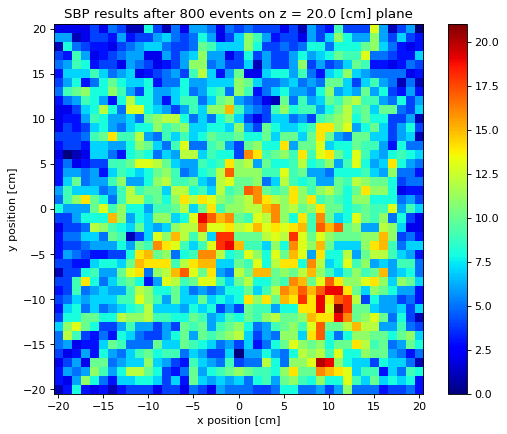

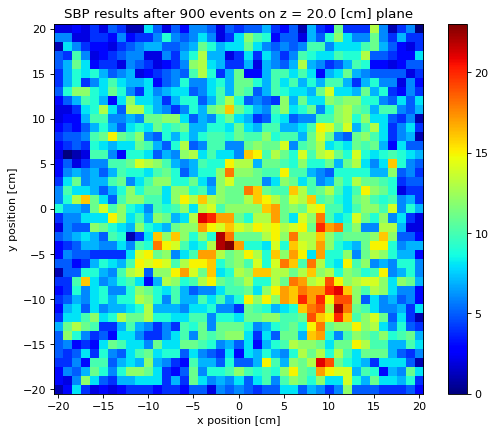

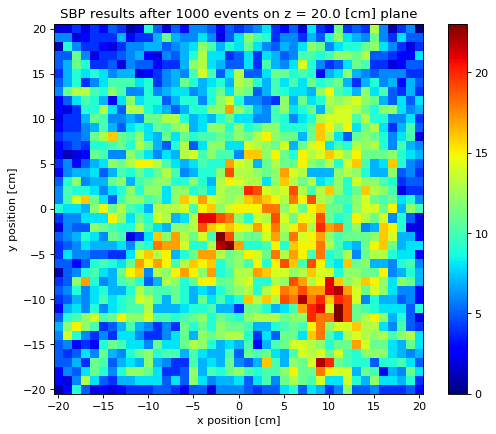

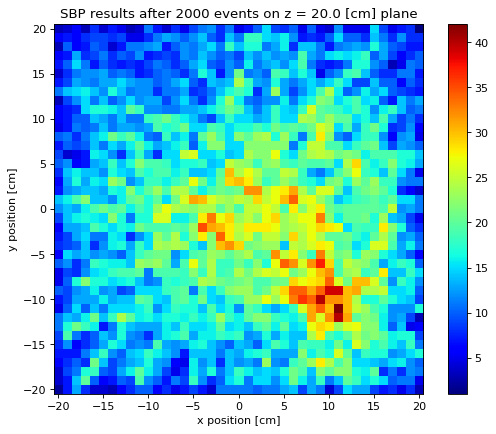

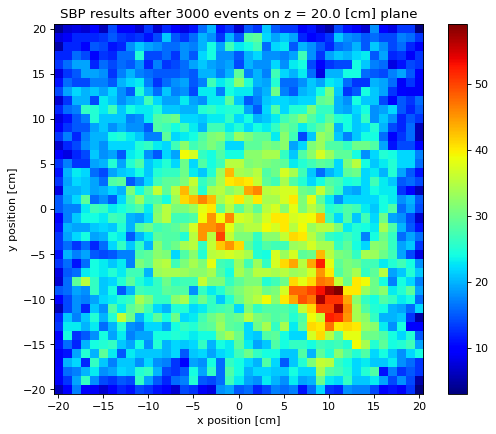

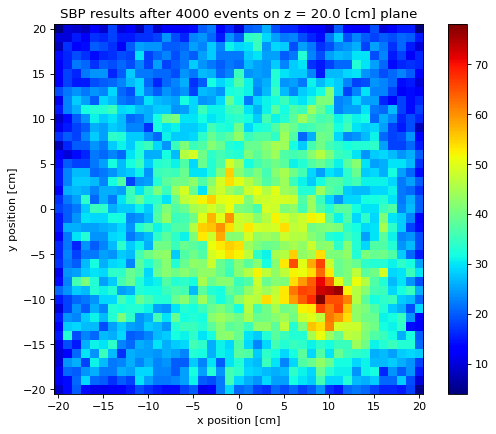

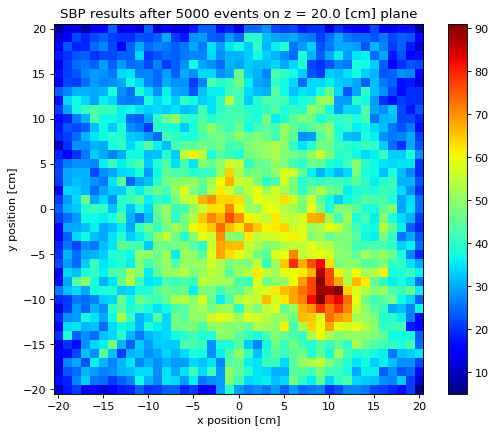

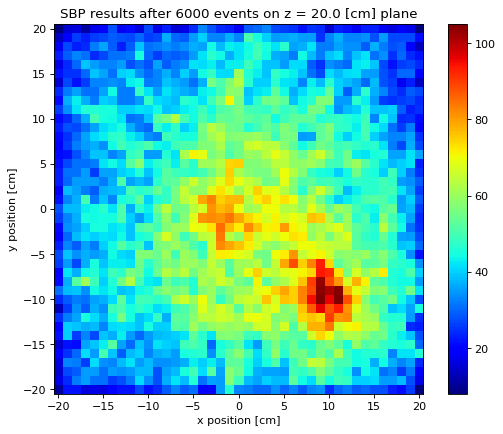

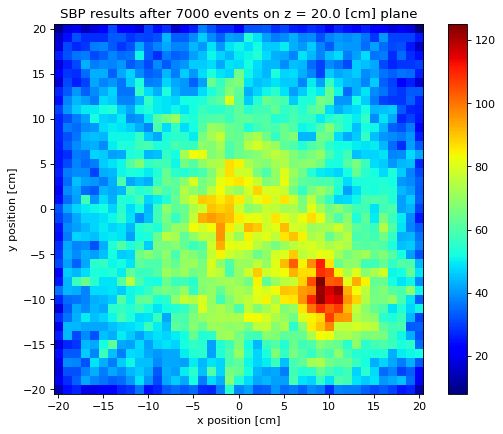

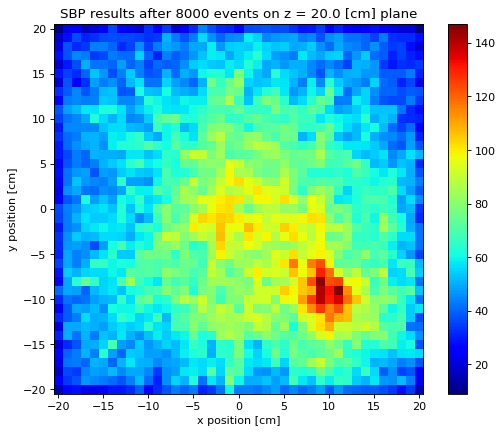

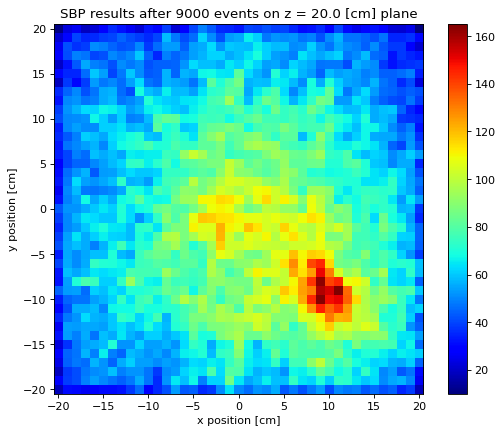

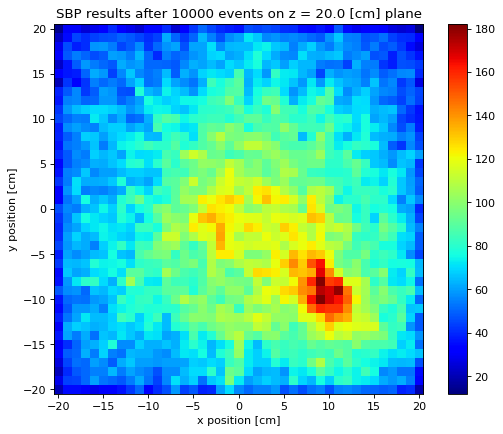

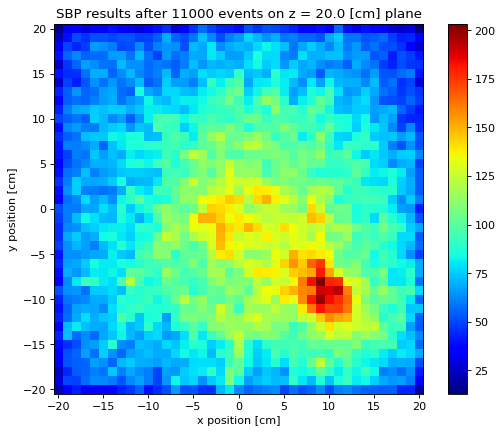

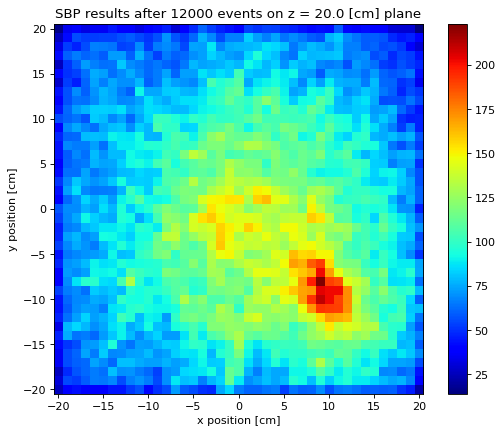

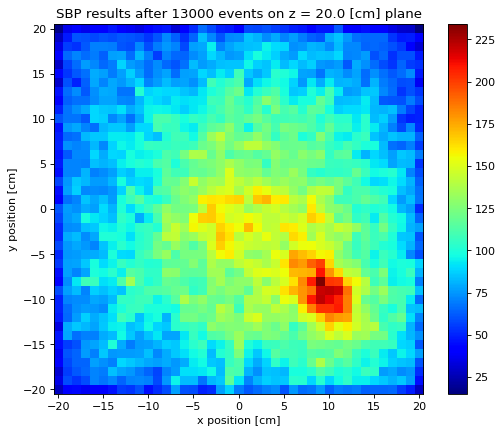

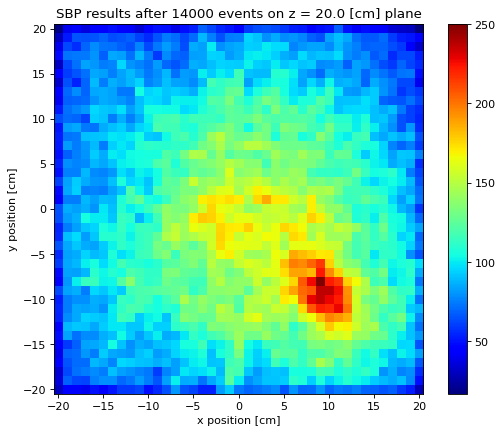

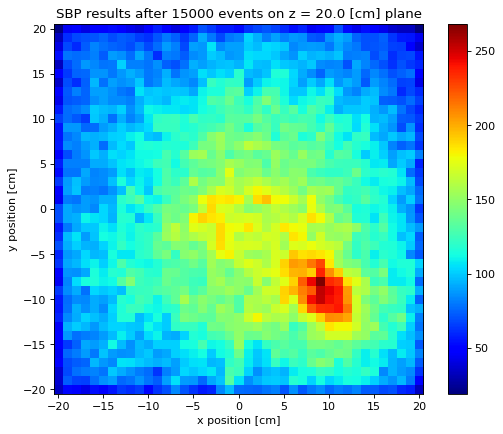

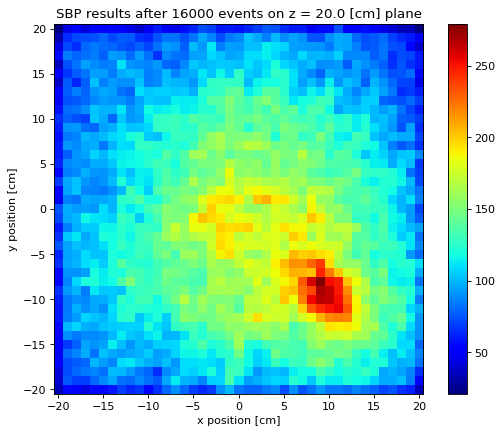

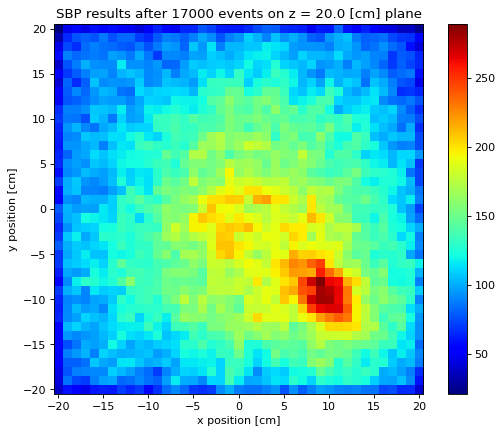

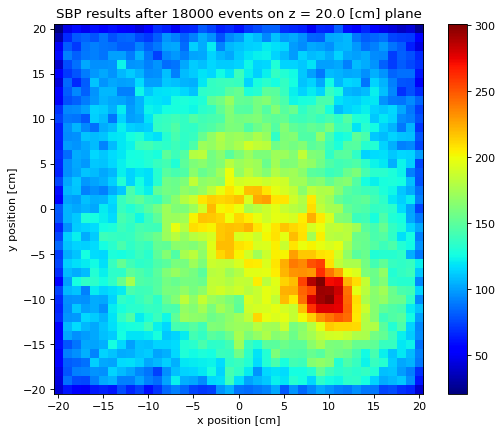

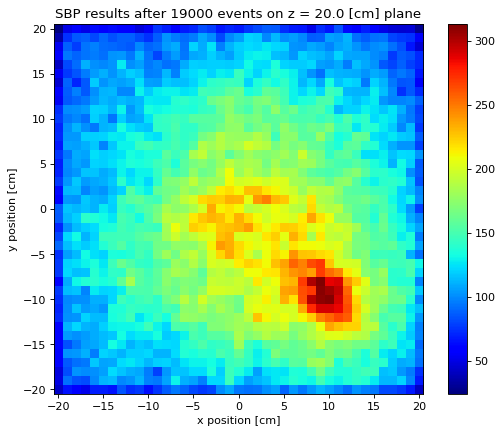

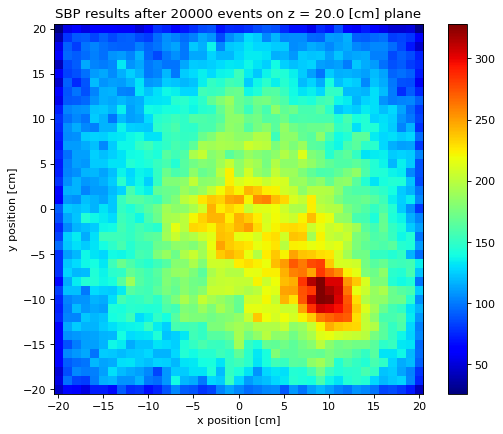

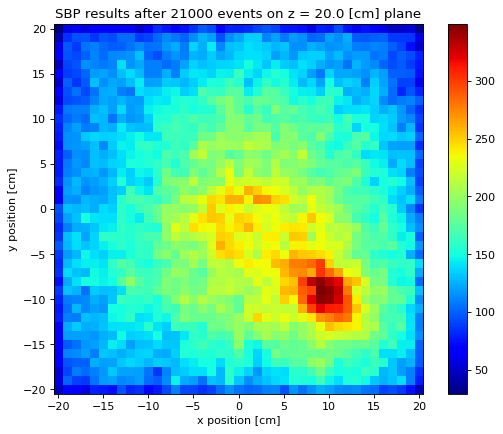

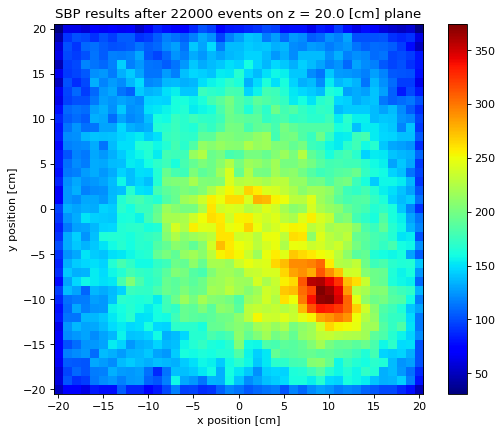

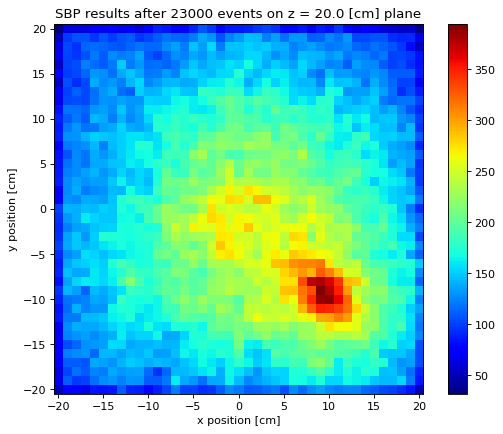

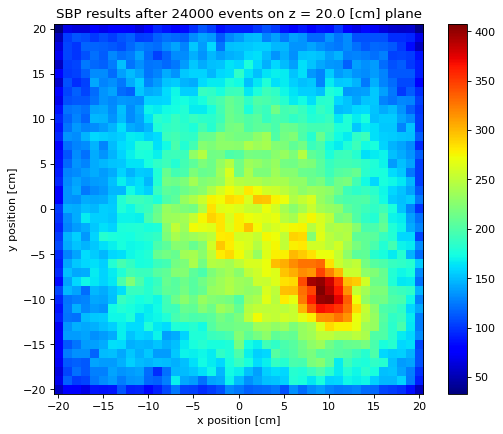

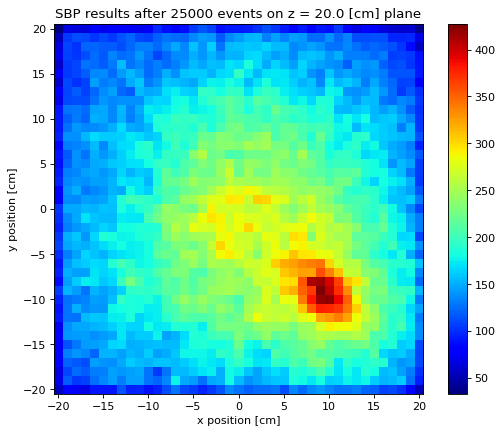

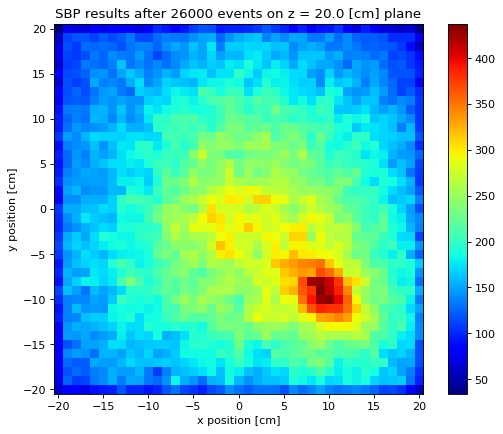

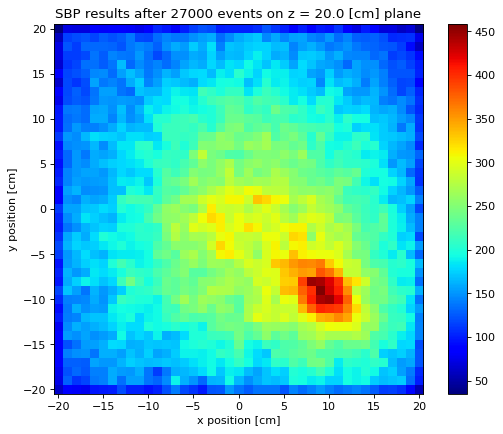

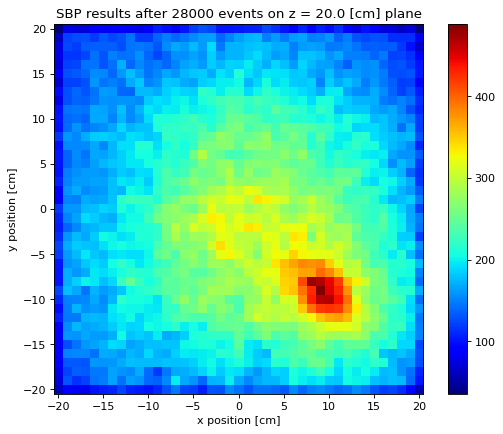

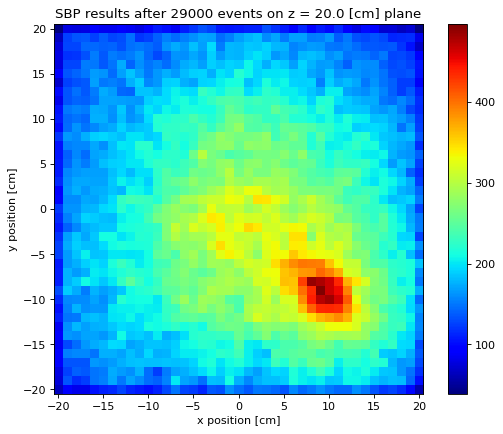

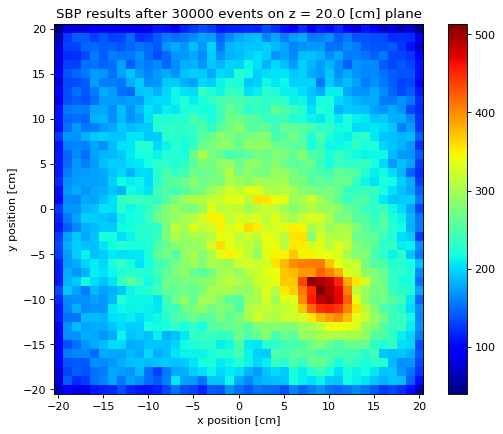

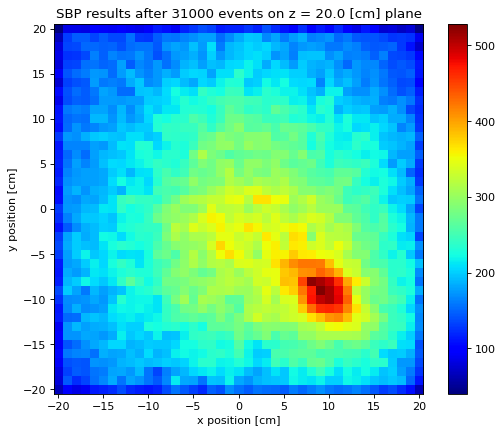

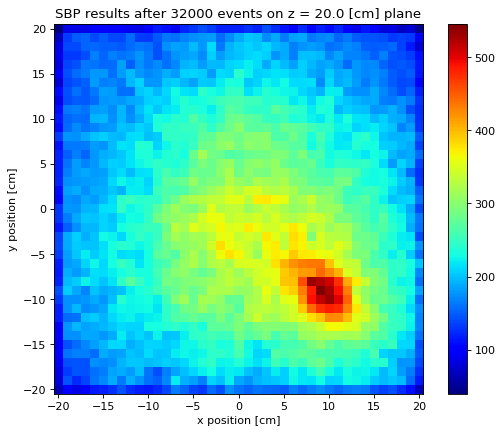

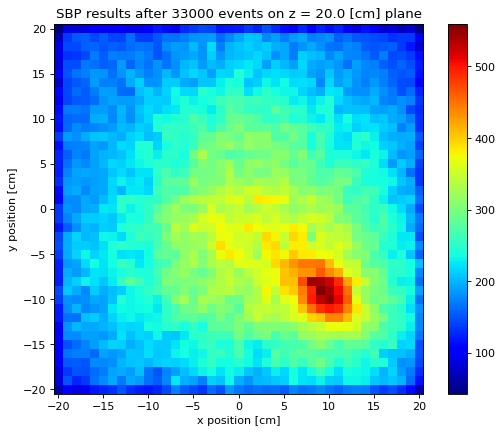

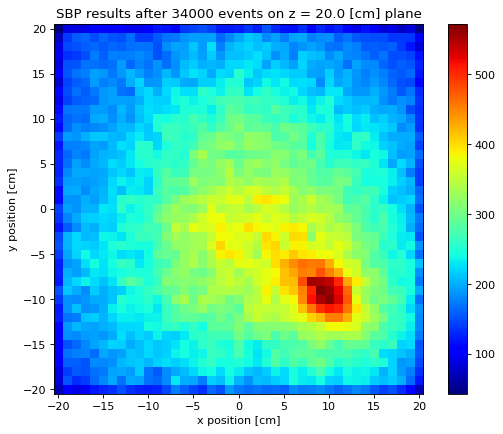

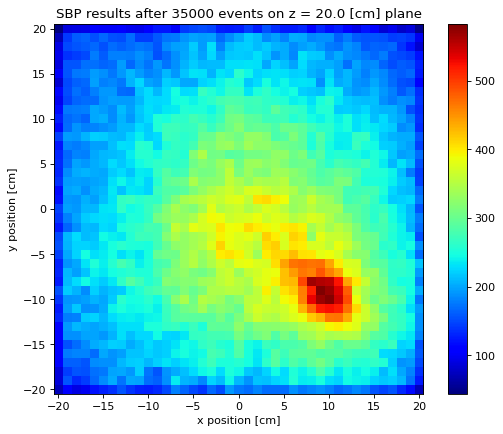

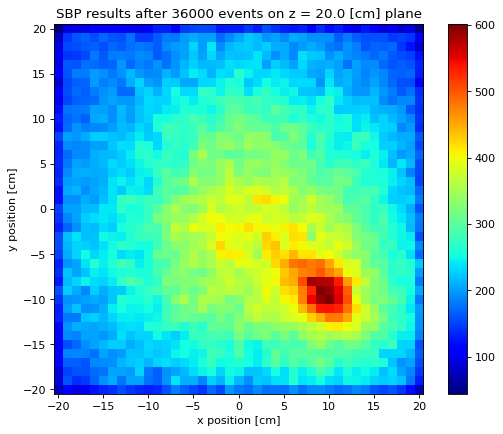

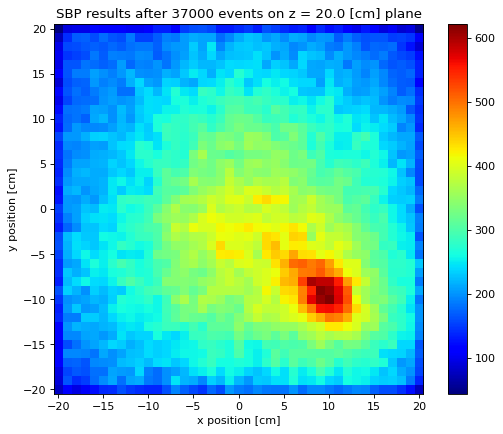

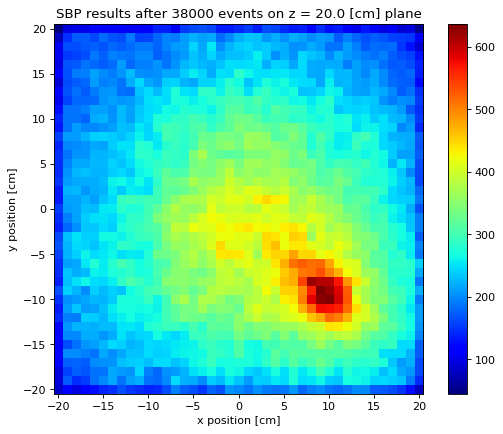

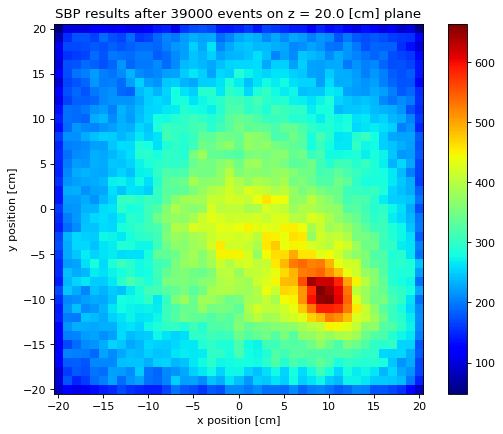

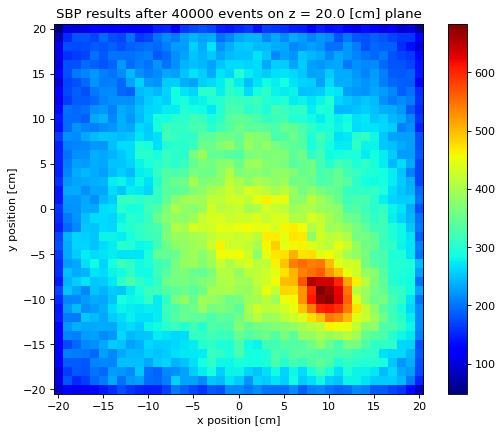

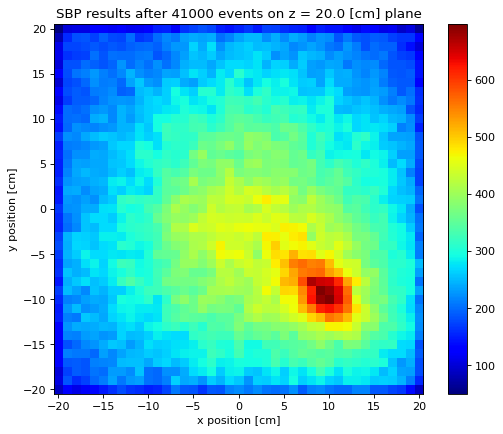

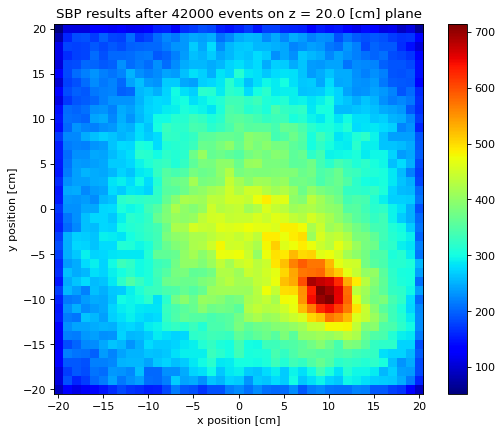

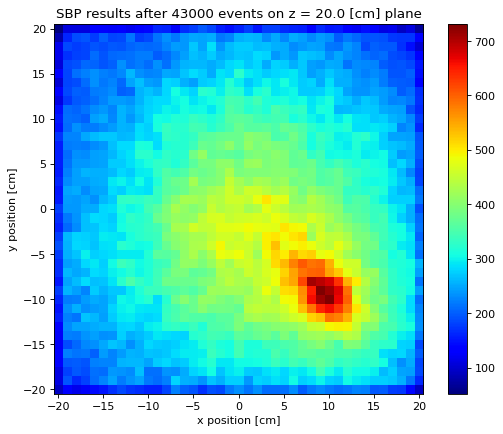

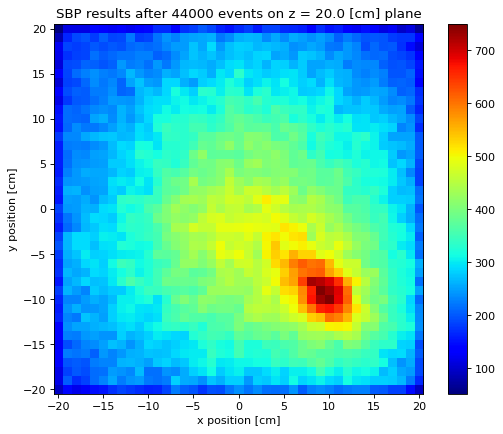

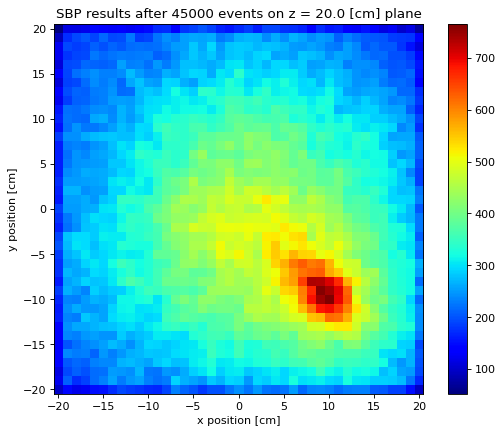

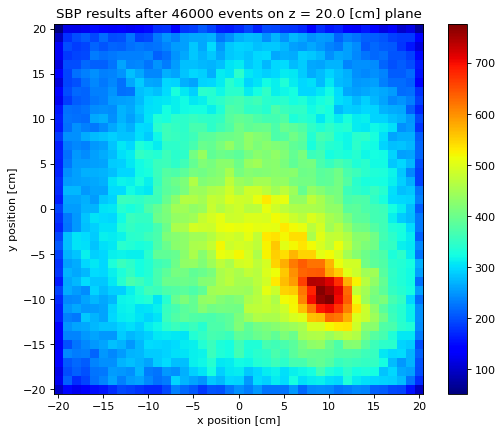

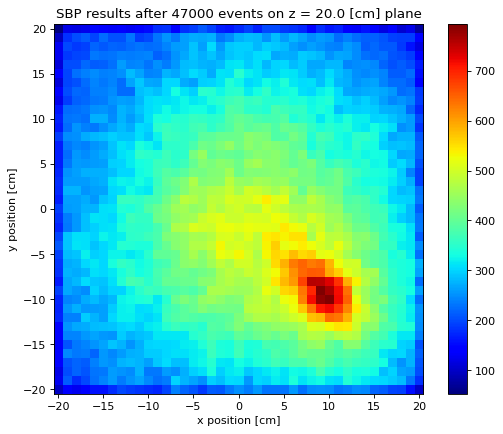

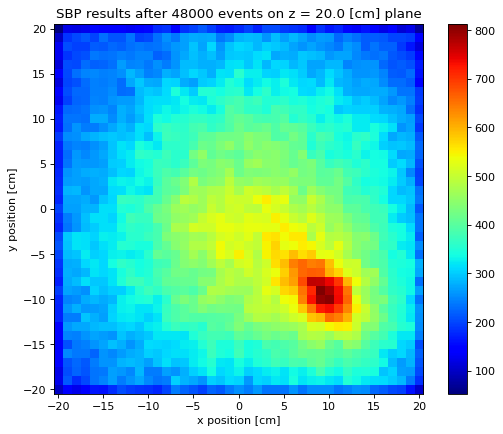

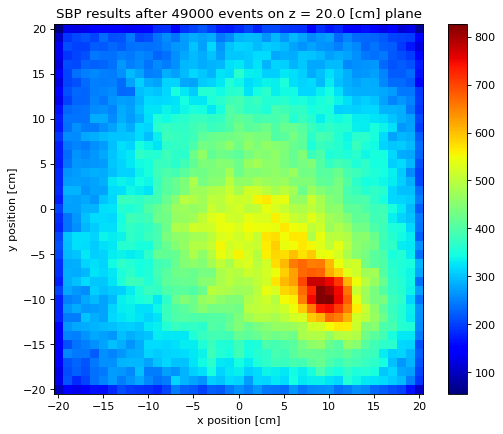

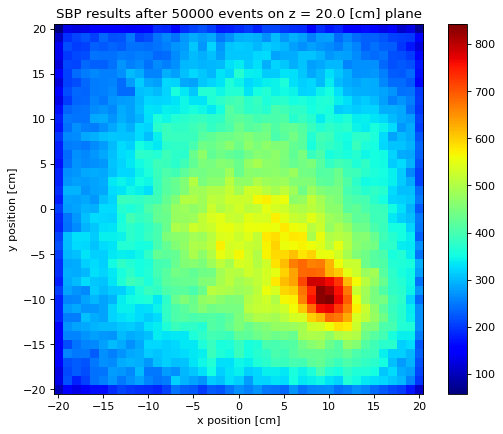

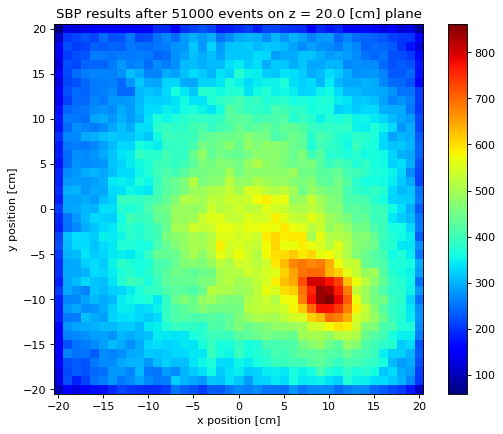

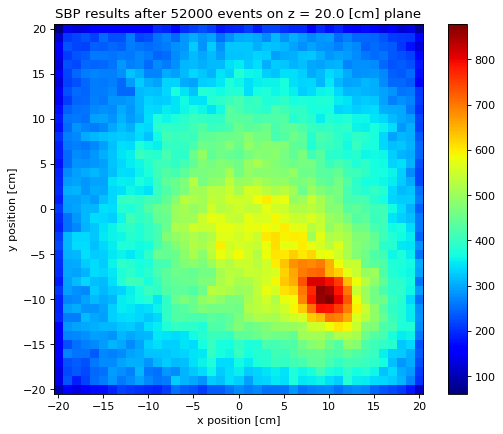

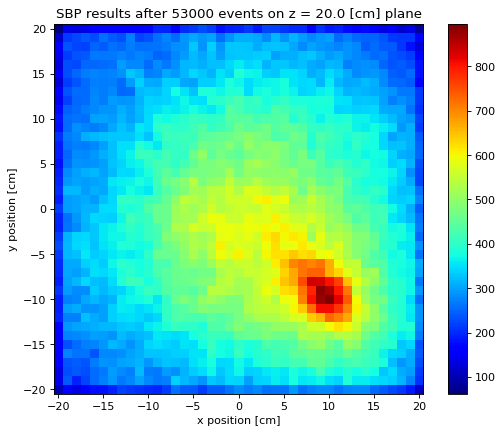

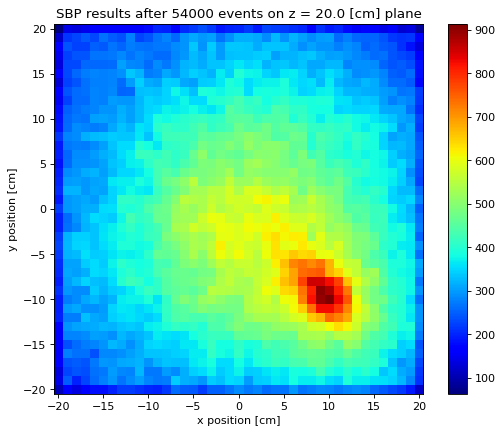

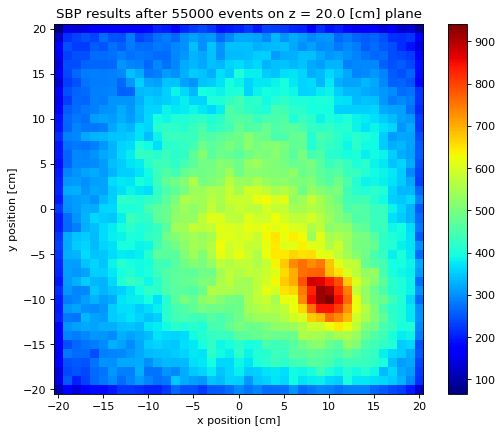

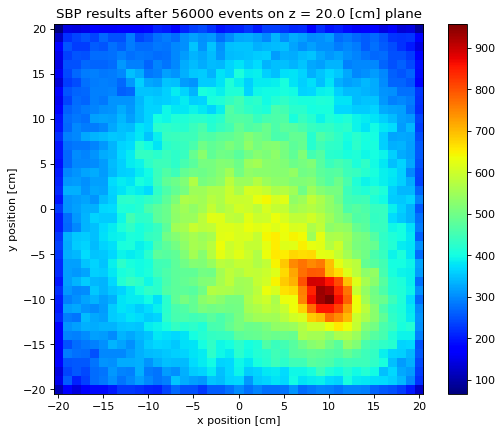

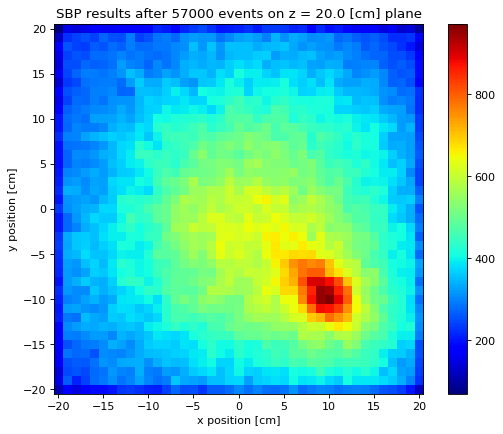

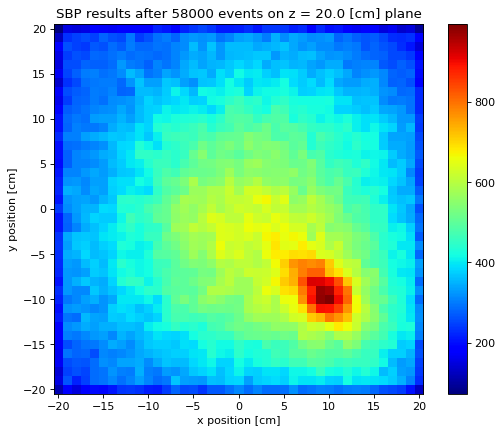

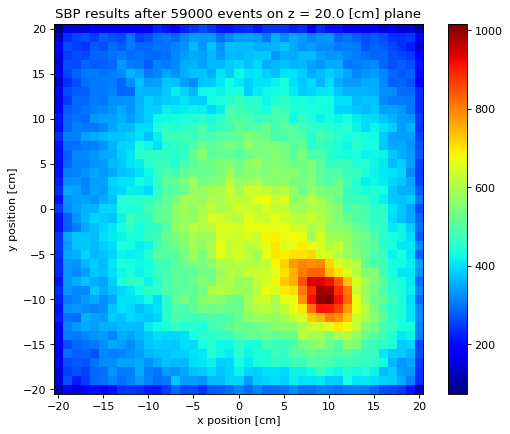

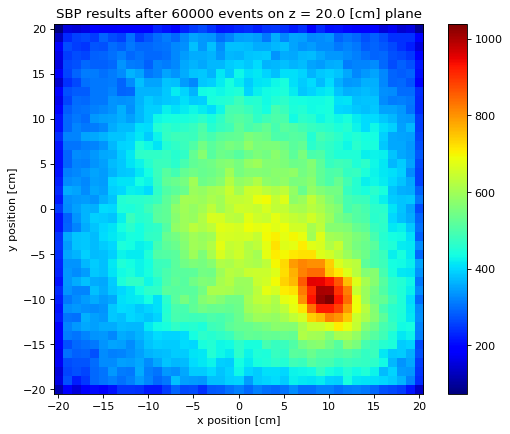

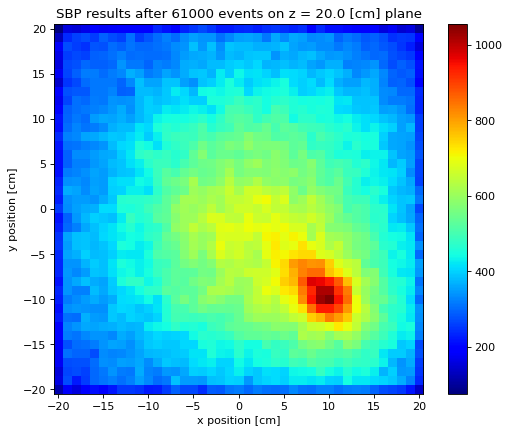

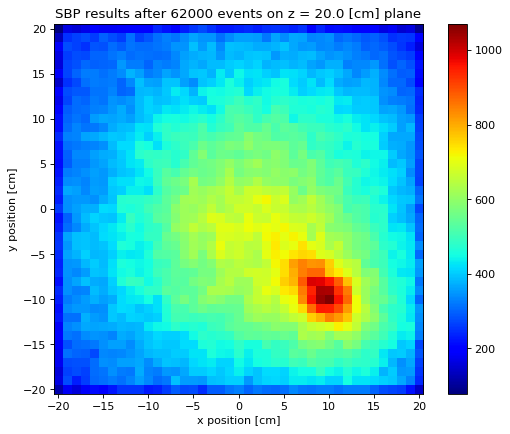

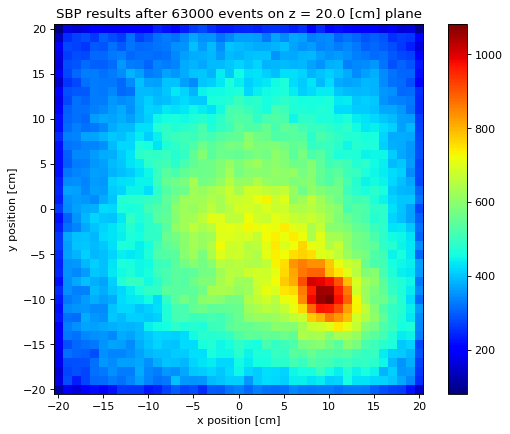

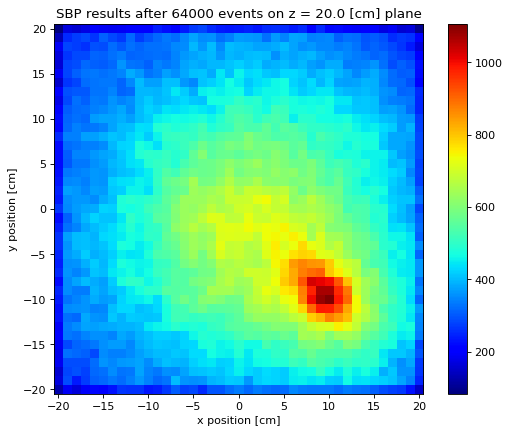

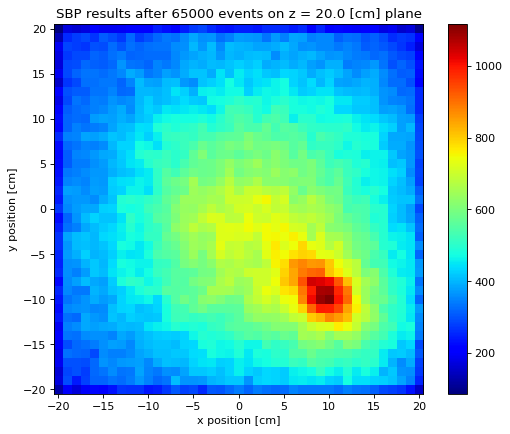

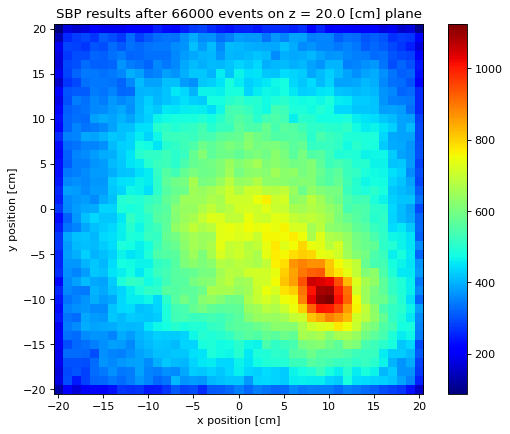

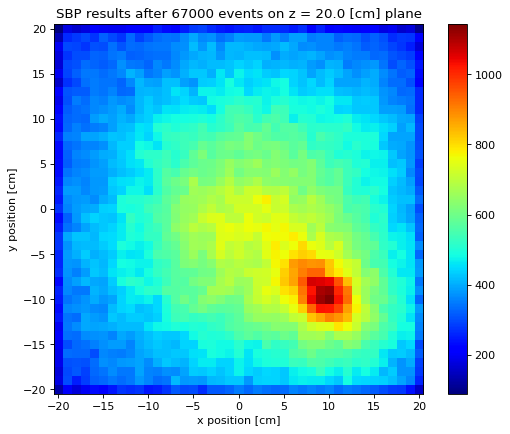

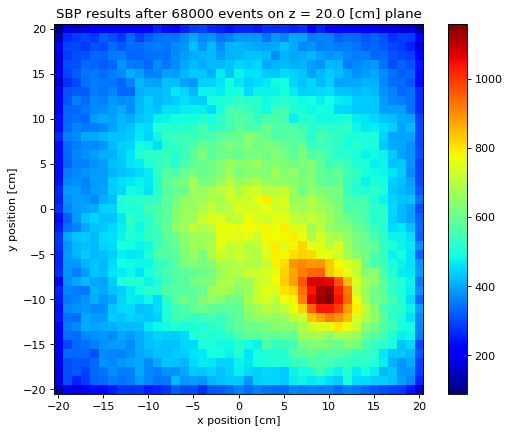

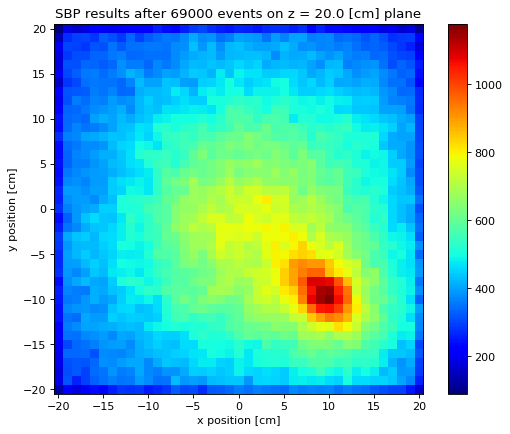

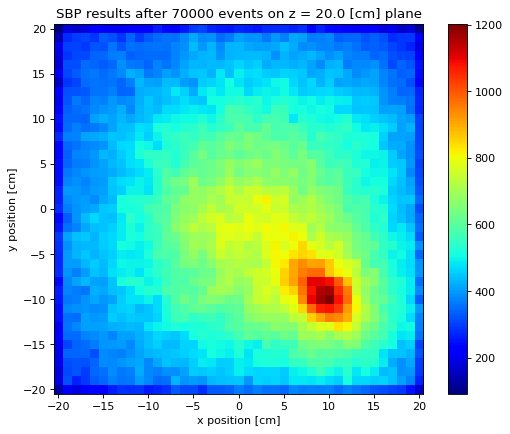

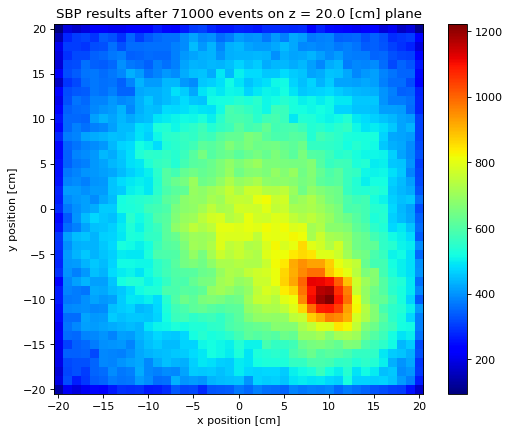

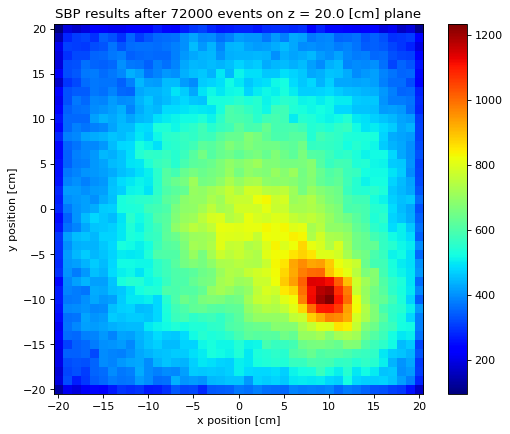

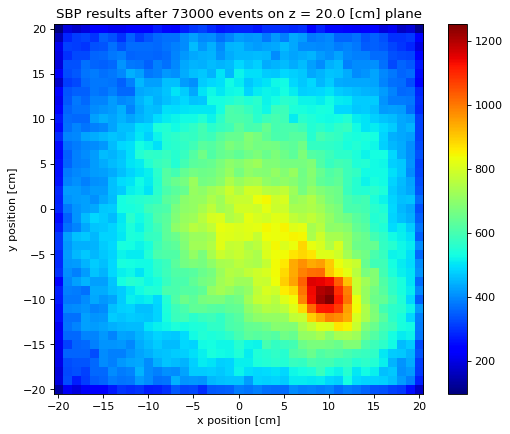

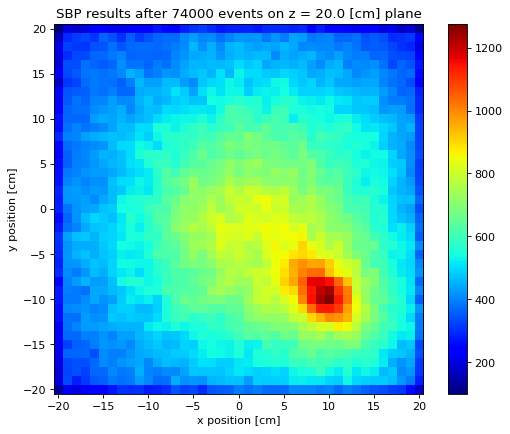

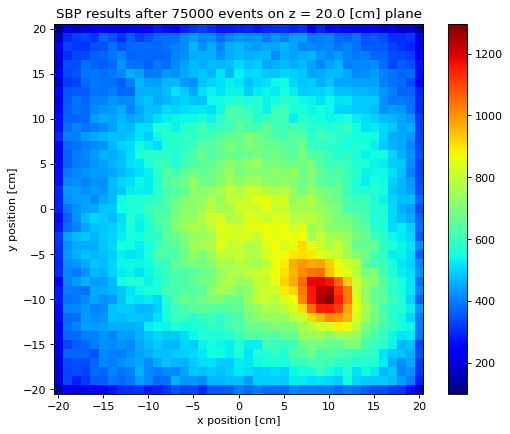

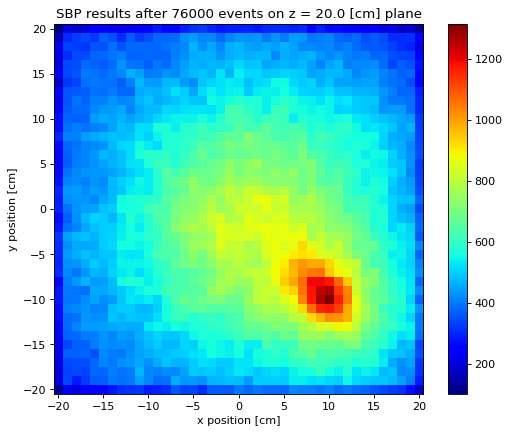

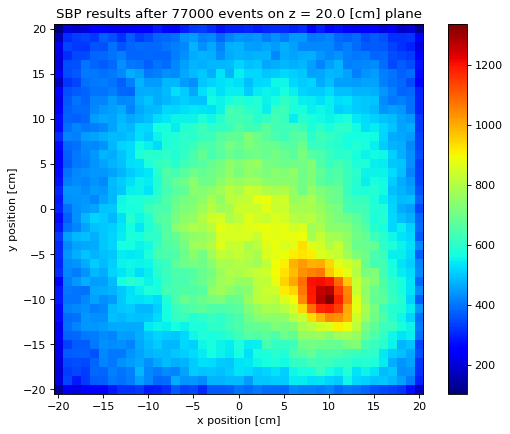

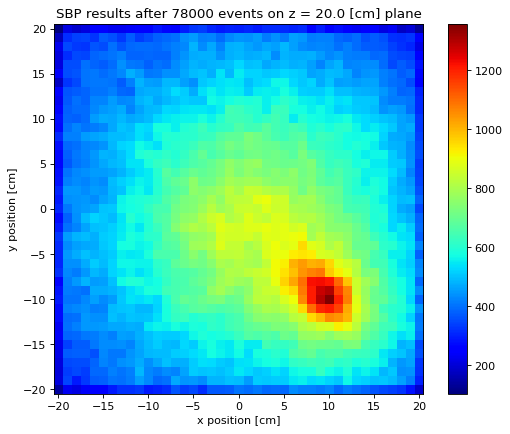

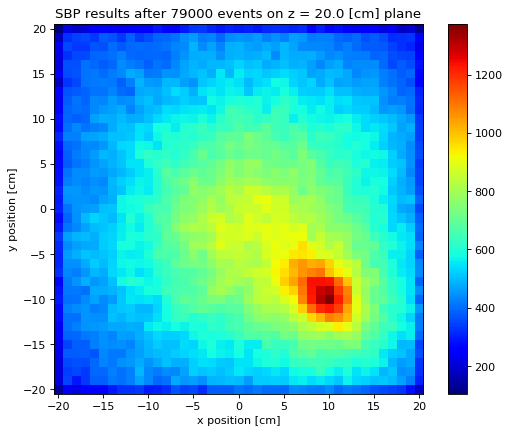

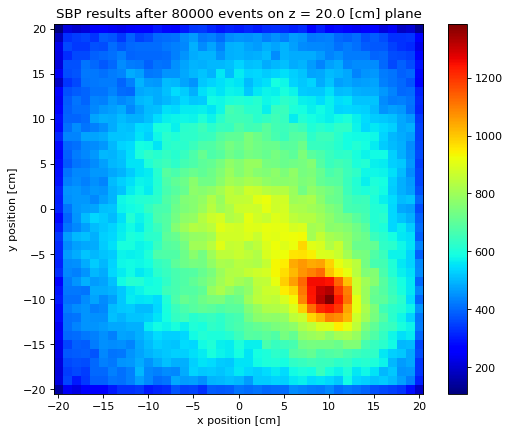

In [ ]:
## Simple Back Projection ##
plane_z_axis = 200
target_1 = plane_z_axis # defines img zise to be 1/6 world
image_size = 2 * target_1 + 1
image_res = 10 # make the image to appear at [cm]
imageTOT = np.zeros((image_size, image_size))
N = 5*N
imageTOT = sbpAlgo(p1, v21, est_theta, plane_z_axis, target_1, image_res,360)
##

# Export to Matlab

In [ ]:
from scipy import io

def save_mat_file(channels_to_union, p1, v21, est_theta, imageTOT):
  F0 = imageTOT
  # After p1, v21, est_theta = sbpData(Angle=90) and AFTER SBP
  save_path = '/content/gdrive/MyDrive/CC_Thesis/matlab_export/{}_channels_to_union.mat'.format(channels_to_union) # channels_to_union must be defined

  # Save the array to a MATLAB-compatible file
  matlab_objects = {
      'p1': p1,
      'v21': v21,
      'est_theta': est_theta,
      'F0': F0
  }
  # Save the dictionary as a MATLAB .mat file
  io.savemat(save_path, matlab_objects)
  print('Matlab file has exported for',channels_to_union, 'united channels')


In [ ]:
Max_channels_to_union = 6
Min_channels_to_union = 6 # 0 is the normal CC

for i in range(Min_channels_to_union, Max_channels_to_union + 1):
  ## Unite Channels
  channels_to_union = i
  print('channels_to_union = ', i)
  general_connectivity_matrice = create_general_voxels_matrice_connectivity(shell_voxels.shape[0], channels_to_union)
  general_extended_indexed_first_int  = add_relative_voxel_rows(indexed_first_int,indexed_second_int,shell_voxels,general_connectivity_matrice)
  general_extended_indexed_second_int = add_relative_voxel_rows(indexed_second_int,indexed_first_int,shell_voxels,general_connectivity_matrice)
  first_int = general_extended_indexed_first_int
  num_rows = first_int.shape[0]
  first_int = np.hstack((first_int, np.zeros((num_rows, 2))))
  first_int[:, 2] = shell_voxels[general_extended_indexed_first_int[:, 2].astype(int), 0]
  first_int[:, 3] = shell_voxels[general_extended_indexed_first_int[:, 2].astype(int), 1]
  first_int[:, 4] = shell_voxels[general_extended_indexed_first_int[:, 2].astype(int), 2]
  second_int = general_extended_indexed_second_int
  num_rows = second_int.shape[0]
  second_int = np.hstack((second_int, np.zeros((num_rows, 2))))
  second_int[:, 2] = shell_voxels[general_extended_indexed_second_int[:, 2].astype(int), 0]
  second_int[:, 3] = shell_voxels[general_extended_indexed_second_int[:, 2].astype(int), 1]
  second_int[:, 4] = shell_voxels[general_extended_indexed_second_int[:, 2].astype(int), 2]
  N = i*N
  p1, v21, est_theta = sbpData(Angle=90)
  v21 = -v21
  p1 = p1
  print('first_int[0:10]')
  print(first_int[0:10])
  ## Simple Back Projection ##
  plane_z_axis = 200
  target_1 = plane_z_axis # defines img zise to be 1/6 world
  image_size = 2 * target_1 + 1
  image_res = 10 # make the image to appear at [cm]
  imageTOT = np.zeros((image_size, image_size))
  imageTOT = sbpAlgo(p1, v21, est_theta, plane_z_axis, target_1, image_res,360)
  ## Save to Matlab
  save_mat_file(channels_to_union, p1, v21, est_theta, imageTOT)

channels_to_union =  6


ValueError: ignored

# Chapter 4 - CC for Comparison - Old Method

In [ ]:
from sklearn.neighbors import NearestNeighbors

def find_k_nearest_coordinates(shell_voxels, k):
    # Create a Nearest Neighbors model
    nn_model = NearestNeighbors(n_neighbors=k)

    # Fit the model to the coordinates
    nn_model.fit(shell_voxels[:, :3])  # Considering only the first 3 columns (coordinates)

    # Find the k-nearest neighbors and distances for each point
    distances, indices = nn_model.kneighbors(shell_voxels[:, :3])

    # Create a new matrix with an additional column for group assignment
    result_matrix = np.column_stack((shell_voxels, np.zeros(shell_voxels.shape[0])))

    # Assign each point to a group based on its k-nearest neighbors
    for i in range(shell_voxels.shape[0]):
        result_matrix[i, -1] = int(i / k) + 1

    return result_matrix

def calculate_group_means(result_matrix, k):
    # Get the unique group numbers
    unique_groups = np.unique(result_matrix[:, -1])

    # Create a new matrix for group means
    group_means_matrix = np.zeros((len(unique_groups), 4))  # 4 columns (3 coordinates + group number)

    # Calculate the mean coordinates for each group
    for i, group_num in enumerate(unique_groups):
        group_indices = np.where(result_matrix[:, -1] == group_num)[0]
        group_coordinates = result_matrix[group_indices, :3]
        group_mean = np.mean(group_coordinates, axis=0)
        group_means_matrix[i, :3] = group_mean
        group_means_matrix[i, -1] = group_num

    return group_means_matrix

def replace_coordinates_with_grouped_indices(interaction_data, shell_voxel_centers, grouped_shell_voxels):
    indexed_interaction_data = np.copy(interaction_data)
    for i in range(len(shell_voxel_centers)):
        x, y, z = shell_voxel_centers[i,0:3]
        indices = np.where((indexed_interaction_data[:, -3] == x) & (indexed_interaction_data[:, -2] == y) & (indexed_interaction_data[:, -1] == z))[0]
        indexed_interaction_data[indices, -3:] = grouped_shell_voxels[shell_voxel_centers[i,3].astype(int)-1,3]
    return indexed_interaction_data



In [ ]:

# group k near
k_value = 8  # how many voxels to unite into one big voxel with average center value

result_matrix = find_k_nearest_coordinates(shell_voxels, k_value)
grouped_shell_voxels = calculate_group_means(result_matrix, k_value)
print('grouped_shell_voxels shape and values')
print(grouped_shell_voxels.shape)
print(grouped_shell_voxels)

# the following section must be checked
group_indexed_first_int = replace_coordinates_with_grouped_indices(first_int_voxelized[:N],result_matrix, grouped_shell_voxels)[:,:3] # [photon_index,energy,voxel_index]
group_indexed_second_int = replace_coordinates_with_grouped_indices(second_int_voxelized[:N],result_matrix, grouped_shell_voxels)[:,:3] # [photon_index,energy,voxel_index]
print('group_indexed_first_int shape and values')
print(group_indexed_first_int.shape)
print(group_indexed_first_int)

first_int = group_indexed_first_int
num_rows = first_int.shape[0]
first_int = np.hstack((first_int, np.zeros((num_rows, 2))))
first_int[:, 2] = grouped_shell_voxels[group_indexed_first_int[:, 2].astype(int)-1, 0]  # i think 'shell_voxels' should be 'grouped_shell_voxels'
first_int[:, 3] = grouped_shell_voxels[group_indexed_first_int[:, 2].astype(int)-1, 1]
first_int[:, 4] = grouped_shell_voxels[group_indexed_first_int[:, 2].astype(int)-1, 2]
second_int = group_indexed_second_int
num_rows = second_int.shape[0]
second_int = np.hstack((second_int, np.zeros((num_rows, 2))))
second_int[:, 2] = grouped_shell_voxels[group_indexed_second_int[:, 2].astype(int)-1, 0]
second_int[:, 3] = grouped_shell_voxels[group_indexed_second_int[:, 2].astype(int)-1, 1]
second_int[:, 4] = grouped_shell_voxels[group_indexed_second_int[:, 2].astype(int)-1, 2]
p1, v21, est_theta = sbpData(Angle=90)
v21 = -v21
p1 = p1
print('first_int[0:10]')
print(first_int[0:10])

grouped_shell_voxels shape and values
(61, 4)
[[-22.5   -5.   -22.5    1.  ]
 [-18.75  -2.5  -22.5    2.  ]
 [-15.     0.   -22.5    3.  ]
 [-11.25   2.5  -22.5    4.  ]
 [ -7.5    5.   -22.5    5.  ]
 [ -2.5   -5.   -22.5    6.  ]
 [  1.25  -2.5  -22.5    7.  ]
 [  5.     0.   -22.5    8.  ]
 [  8.75   2.5  -22.5    9.  ]
 [ 12.5    5.   -22.5   10.  ]
 [ 17.5   -5.   -22.5   11.  ]
 [ 21.25  -2.5  -22.5   12.  ]
 [  0.     0.   -20.    13.  ]
 [-21.25   7.5  -17.5   14.  ]
 [ -5.     0.   -17.5   15.  ]
 [ 15.    -5.   -17.5   16.  ]
 [ 22.5    5.   -17.5   17.  ]
 [-22.5   -5.   -12.5   18.  ]
 [-15.     5.   -12.5   19.  ]
 [  5.     0.   -12.5   20.  ]
 [ 21.25  -7.5  -12.5   21.  ]
 [  0.     0.   -10.    22.  ]
 [-21.25   7.5   -7.5   23.  ]
 [ -5.     0.    -7.5   24.  ]
 [ 15.    -5.    -7.5   25.  ]
 [ 22.5    5.    -7.5   26.  ]
 [-22.5   -5.    -2.5   27.  ]
 [-15.     5.    -2.5   28.  ]
 [  5.     0.    -2.5   29.  ]
 [ 21.25  -7.5   -2.5   30.  ]
 [  0.     0.     0.    

Here is a visualization of the "grouped CC"


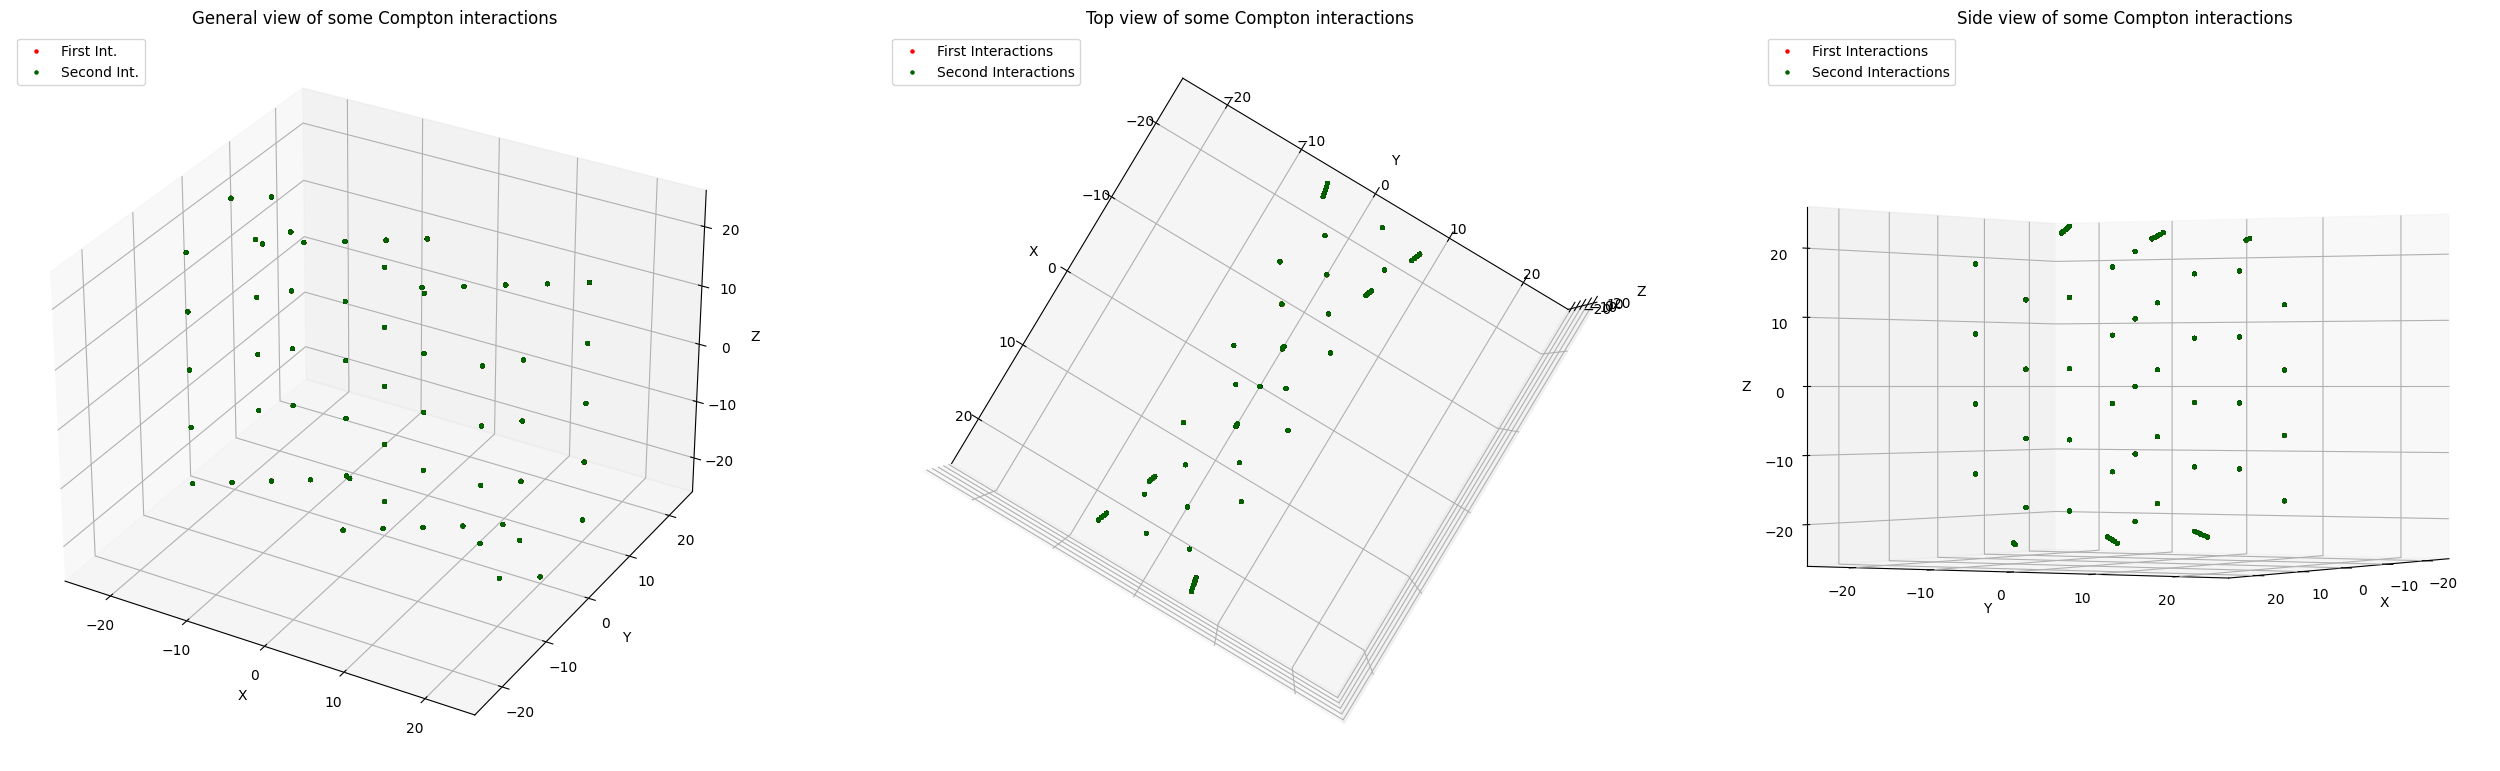

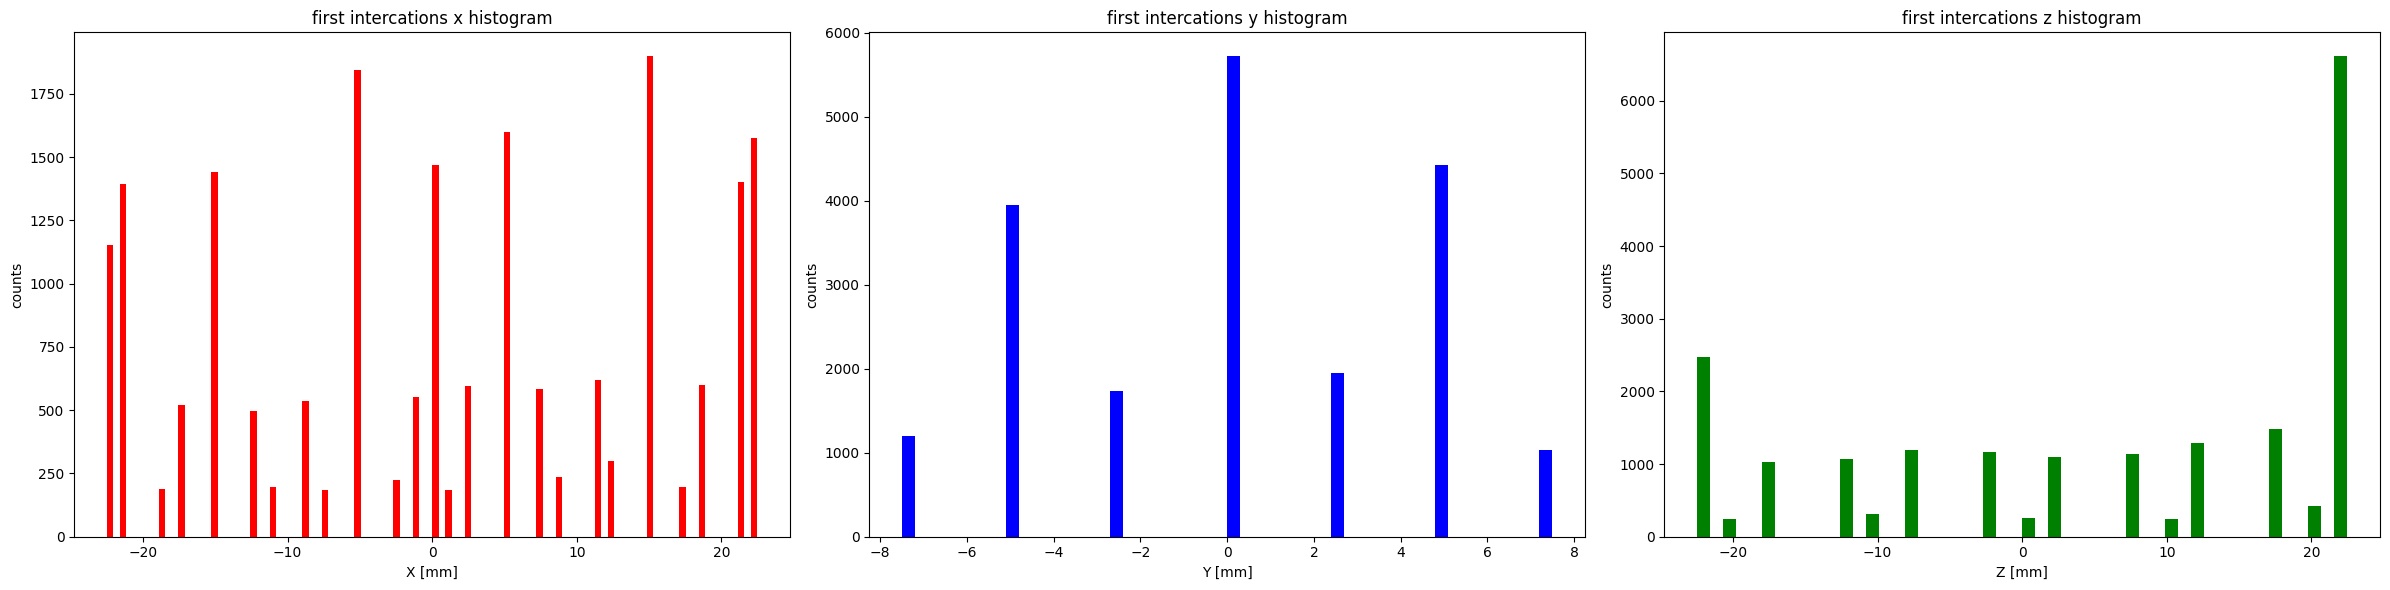

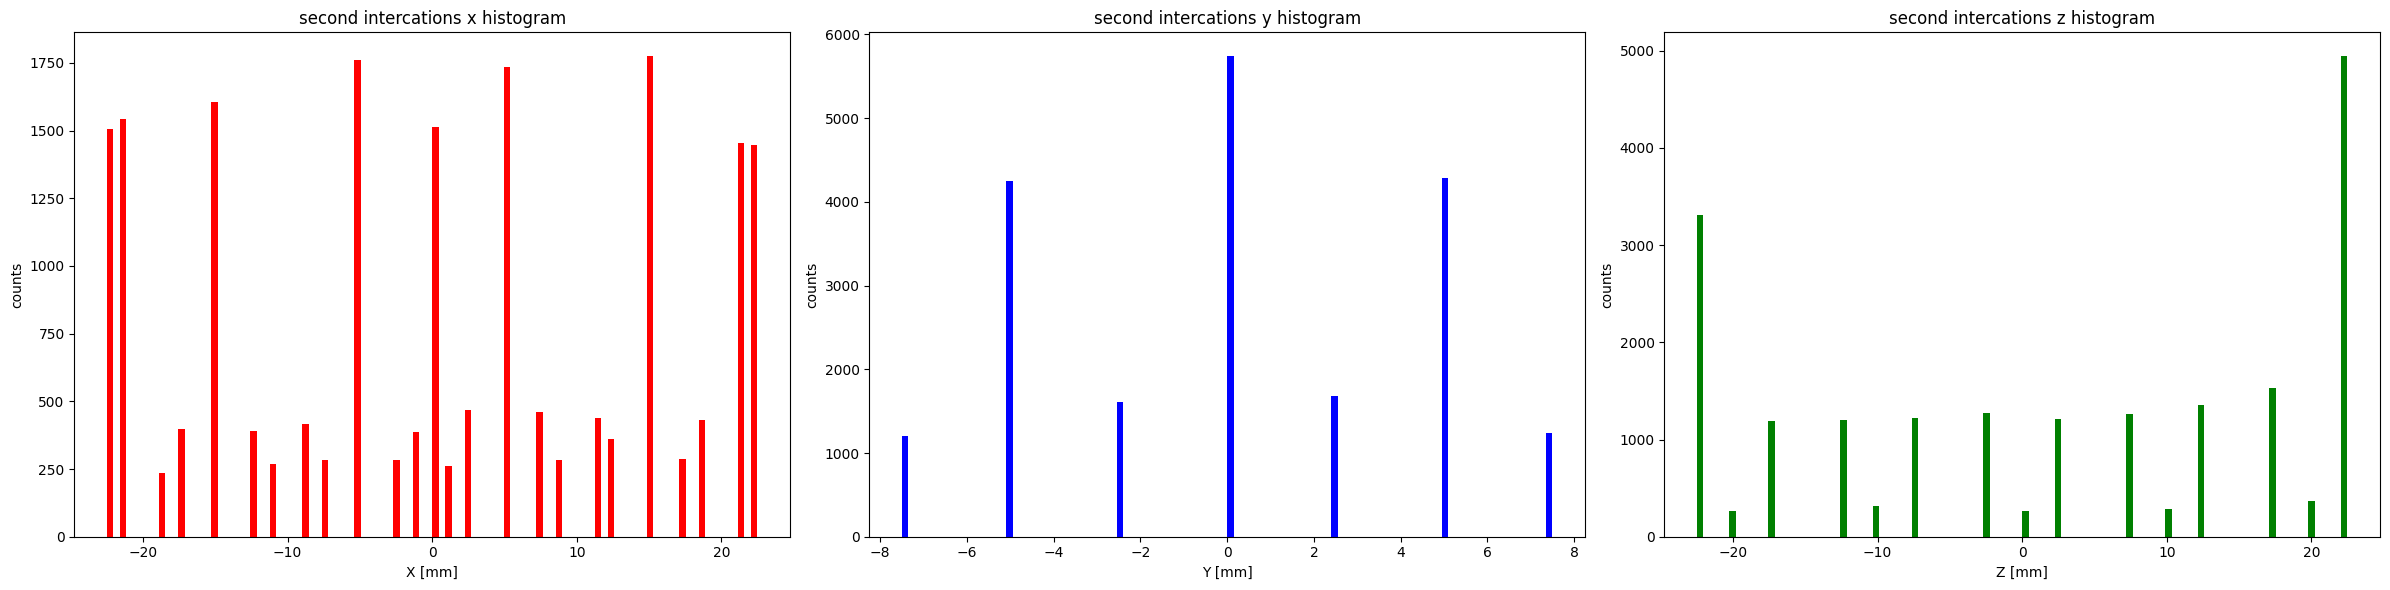

In [ ]:
print('\033[1;37;40mHere is a visualization of the "grouped CC"\033[0;0m')
Visualize_Camera(first_int,second_int)
events_histograms(first_int, second_int)

<ipython-input-5-923d6876b559>:108: RuntimeWarning: divide by zero encountered in double_scalars
  alpha = (plane_z_axis - p1[2]) / v_tag[2]
<ipython-input-5-923d6876b559>:109: RuntimeWarning: invalid value encountered in multiply
  location = p1 + alpha*v_tag
<ipython-input-5-923d6876b559>:44: RuntimeWarning: invalid value encountered in divide
  v = v / np.linalg.norm(v)
<ipython-input-5-923d6876b559>:96: RuntimeWarning: invalid value encountered in divide
  v_orth = v_orth / np.linalg.norm(v_orth)


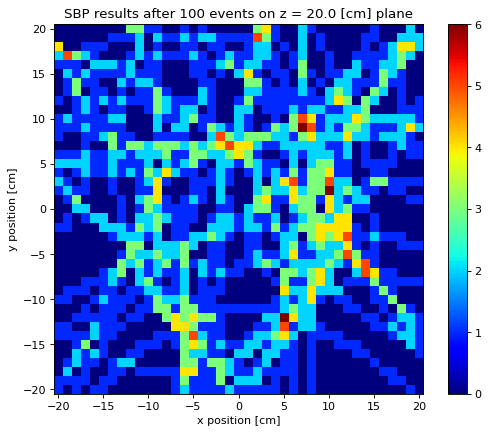

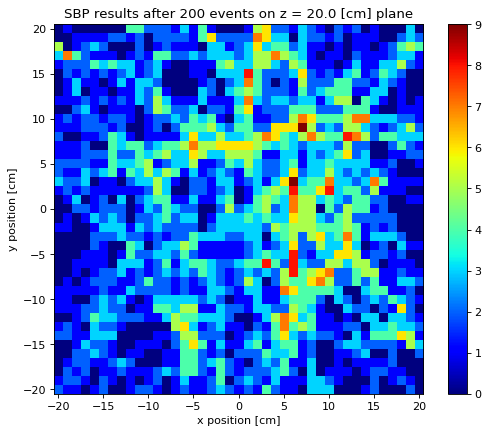

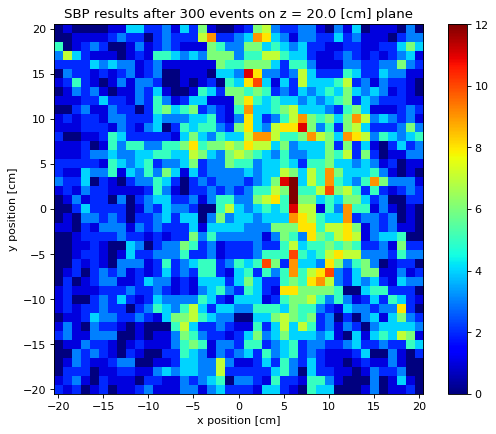

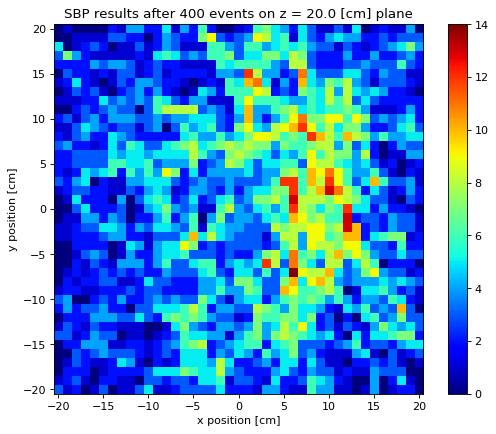

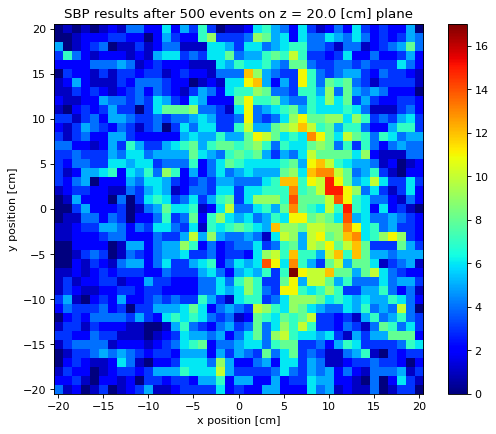

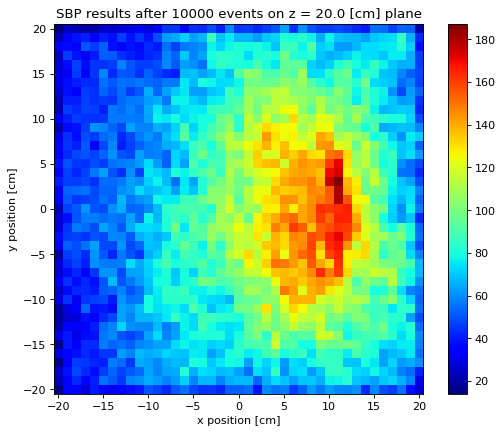

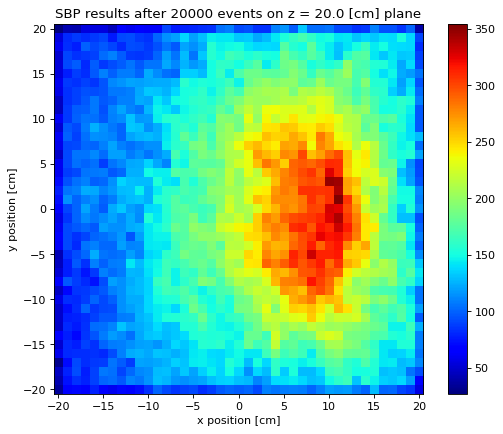

In [ ]:
## Simple Back Projection ##
plane_z_axis = 200
target_1 = plane_z_axis # defines img zise to be 1/6 world
image_size = 2 * target_1 + 1
image_res = 10 # make the image to appear at [cm]
imageTOT = np.zeros((image_size, image_size))
N = 1*N
imageTOT = sbpAlgo(p1, v21, est_theta, plane_z_axis, target_1, image_res,360)
##

# Export Grouped Data to Matlab

In [ ]:
from scipy import io

def save_mat_file(k_value, p1, v21, est_theta, imageTOT):
  F0 = imageTOT
  # After p1, v21, est_theta = sbpData(Angle=90) and AFTER SBP
  save_path = '/content/gdrive/MyDrive/CC_Thesis/matlab_export/data_x100_y100/grouped/{}_k_value.mat'.format(k_value) # channels_to_union must be defined

  # Save the array to a MATLAB-compatible file
  matlab_objects = {
      'p1': p1,
      'v21': v21,
      'est_theta': est_theta,
      'F0': F0
  }
  # Save the dictionary as a MATLAB .mat file
  io.savemat(save_path, matlab_objects)
  print('Matlab file has exported for',k_value, 'united channels')
## Save to Matlab
#save_mat_file(k_value, p1, v21, est_theta, imageTOT)

NameError: name 'k_value' is not defined

# Chapter 5 - Channels Union 01/2024

**Method**


1.   Define the reference voxalization size, for example a S-A CC with 4x4 voxels on each plane, means 2x4x4 readout channels
2.   save results
3.   Voxelize the CC with smaller voxels
4.   Create random Connectivity Matrice based on Connecting voxels from S plane with voxels from A plane
5.   extend the data base with the fake events, extract {p1, v21, theta}
6.   run SBP on the new data set
7.   do 2-6 again


In [ ]:
def delete_not_SA_voxel_centers(voxel_centers, height, width, depth, voxel_Xsize, voxel_Ysize, voxel_Zsize, xmin, ymin, zmin):
    voxel_centers_filtered = []
    for center in voxel_centers:
        x, y, z = center
        #print(xmin + voxel_size/2,x == xmin + width  -  voxel_size/2 )
        x_on_shell = (x == xmin + voxel_Xsize/2 or x == xmin + width  -  voxel_Xsize/2)
        y_on_shell = (y == ymin + voxel_Ysize/2 or y == ymin + height -  voxel_Ysize/2)
        z_on_shell = (z == zmin + voxel_Zsize/2 or z == zmin + depth  -  voxel_Zsize/2)
        if (x_on_shell and z_on_shell) or (y_on_shell and z_on_shell) or z_on_shell:
            voxel_centers_filtered.append(center)
    return np.array(voxel_centers_filtered)

  # Save to Matlab
from scipy import io

def save_mat_file(reference_voxels_in_row_x_col, voxels_per_channel, res, seed, p1, v21, est_theta, imageTOT):
  F0 = imageTOT
  # After p1, v21, est_theta = sbpData(Angle=90) and AFTER SBP
  save_path = f'/content/gdrive/MyDrive/CC_Thesis/matlab_export/data_x100_y100/reference_voxels_in_row_x_col_{int(reference_voxels_in_row_x_col)}/random_connectivity/seed_{int(seed)}/{int(voxels_per_channel)}_voxels_per_channel/res_{res}mm/matlab_objects.mat'

  # Save the array to a MATLAB-compatible file
  matlab_objects = {
      'p1': p1,
      'v21': v21,
      'est_theta': est_theta,
      'F0': F0
  }
  # Save the dictionary as a MATLAB .mat file
  io.savemat(save_path, matlab_objects)
  print('Matlab file has exported to',save_path)

In [ ]:
def main(reference_voxels_in_row_x_col, voxels_in_row, voxels_in_col, image_res, seed, save_mat):
  ## MAIN
  print(f"Running main with parameters: {reference_voxels_in_row_x_col}, {voxels_in_row}, {voxels_in_col}, {image_res}, {seed}")

  #reference_voxels_in_row_x_col = 5
  reference_num_of_channels = 2 * ( 50**2 / (50/reference_voxels_in_row_x_col)**2 )

  N = 1000
  #voxels_in_row = 50  # how the 50x50 plane will be divided
  #voxels_in_col = 50  # how the 50x50 plane will be divided
  xvoxels, yvoxels, zvoxels = 50/voxels_in_row, 50/voxels_in_col, 5
  num_of_voxels_on_plane = 50**2/(xvoxels*yvoxels)
  print('there are ', num_of_voxels_on_plane, 'voxels in a plane')
  voxels_per_channel = ( 2 * ( num_of_voxels_on_plane ) ) / reference_num_of_channels
  print('there are ', voxels_per_channel, 'voxels_per_channel')
  N = int(N*voxels_per_channel)

  first_int, second_int = initialize_first_int_second_int()

  Visualize_Camera(first_int,second_int)
  events_histograms(first_int, second_int)

  #voxelize



  first_int_voxelized  = convert_to_voxels(first_int[:,:], xvoxels, yvoxels, zvoxels)
  second_int_voxelized = convert_to_voxels(second_int[:,:], xvoxels, yvoxels, zvoxels)
  Visualize_Camera(first_int_voxelized,second_int_voxelized)
  events_histograms(first_int_voxelized, second_int_voxelized)

  ## Save the Voxelized data
  # np.save('/content/gdrive/MyDrive/CC_Thesis/data/Data_X100_Y100_#3/first_interaction_voxelized' , first_int_voxelized)
  # np.save('/content/gdrive/MyDrive/CC_Thesis/data/Data_X100_Y100_#3/second_interaction_voxelized' , second_int_voxelized)

  first_int  = first_int_voxelized
  second_int = second_int_voxelized

  # Here is the code that extends the data set with the fake events

  camera_size = [50, 50, 50]
  voxel_cube_size = xvoxels  # I assume xvoxels = yvoxels
  camera_minimum_corner = [-25, -25, -25]
  voxel_centers = find_voxel_centers(camera_size[0],camera_size[1],camera_size[2], xvoxels, yvoxels, zvoxels,camera_minimum_corner[0],camera_minimum_corner[1],camera_minimum_corner[2])
  shell_voxels = delete_not_SA_voxel_centers(voxel_centers,camera_size[0],camera_size[1],camera_size[2], xvoxels, yvoxels, zvoxels,camera_minimum_corner[0],camera_minimum_corner[1],camera_minimum_corner[2])
  print('the number of voxels is:')
  print(shell_voxels.shape[0])
  print('the coordinates of the voxels are:')
  print(shell_voxels)

  indexed_first_int = replace_coordinates_with_indices(first_int_voxelized,shell_voxels)[:,:3] # [photon_index,energy,voxel_index]
  indexed_second_int = replace_coordinates_with_indices(second_int_voxelized,shell_voxels)[:,:3] # [photon_index,energy,voxel_index]
  print('indexed_first_int:')
  print(indexed_first_int)

  general_connectivity_matrice = create_general_voxels_matrice_connectivity(shell_voxels.shape[0], int(voxels_per_channel), seed)
  general_extended_indexed_first_int  = add_relative_voxel_rows(indexed_first_int,indexed_second_int,shell_voxels,general_connectivity_matrice)
  general_extended_indexed_second_int = add_relative_voxel_rows(indexed_second_int,indexed_first_int,shell_voxels,general_connectivity_matrice)
  ###################################
  # The following code checks if general_connectivity_matrice is reasonable
  # Check all rows
  if all(np.count_nonzero(row == 1) == voxels_per_channel - 1 for row in general_connectivity_matrice):
      print("All rows have the correct number of '1's.")

  # Check all columns
  if all(np.count_nonzero(general_connectivity_matrice[:, col] == 1) == voxels_per_channel - 1 for col in range(general_connectivity_matrice.shape[1])):
      print("All columns have the correct number of '1's.")
  ###################################

  first_int = general_extended_indexed_first_int
  num_rows = first_int.shape[0]
  first_int = np.hstack((first_int, np.zeros((num_rows, 2))))
  first_int[:, 2] = shell_voxels[general_extended_indexed_first_int[:, 2].astype(int), 0]
  first_int[:, 3] = shell_voxels[general_extended_indexed_first_int[:, 2].astype(int), 1]
  first_int[:, 4] = shell_voxels[general_extended_indexed_first_int[:, 2].astype(int), 2]

  second_int = general_extended_indexed_second_int
  num_rows = second_int.shape[0]
  second_int = np.hstack((second_int, np.zeros((num_rows, 2))))
  second_int[:, 2] = shell_voxels[general_extended_indexed_second_int[:, 2].astype(int), 0]
  second_int[:, 3] = shell_voxels[general_extended_indexed_second_int[:, 2].astype(int), 1]
  second_int[:, 4] = shell_voxels[general_extended_indexed_second_int[:, 2].astype(int), 2]

  p1, v21, est_theta = sbpData(first_int, second_int, N)
  v21 = -v21
  p1 = p1

  ## Simple Back Projection ##
  plane_z_axis = 200
  target_1 = plane_z_axis # defines img zise to be 1/6 world
  image_size = 2 * target_1 + 1
  #image_res = 5 # make the image to appear at [cm]
  imageTOT = np.zeros((image_size, image_size))
  coneNumDeg = 360
  x = np.zeros((N, coneNumDeg))
  y = np.zeros((N, coneNumDeg))
  imageTOT, x, y = sbpAlgo(p1, v21, est_theta, plane_z_axis, target_1, image_res, coneNumDeg)

  ## Save to Matlab
  if save_mat == True:
    save_mat_file(reference_voxels_in_row_x_col, voxels_per_channel, image_res, seed,  p1, v21, est_theta, imageTOT)

  return p1, v21, est_theta, imageTOT


In [ ]:
# This code checks how many voxels there are based on counting the different (x,y,z) combinations of first_int + second_int  #########################

# Extract the columns of interest
columns_of_interest = first_int_voxelized[:, 2:5]

# Use numpy.vstack to create a view of the array with only the selected columns
unique_combinations = np.vstack({tuple(row) for row in columns_of_interest})

# Number of unique combinations
num_unique_combinations = unique_combinations.shape[0]

print(f"Number of unique combinations: {num_unique_combinations}")


Number of unique combinations: 667


<ipython-input-17-a2e827c3632e>:7: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  unique_combinations = np.vstack({tuple(row) for row in columns_of_interest})


Running main with parameters: 5, 50, 50, 10, 1
there are  2500.0 voxels in a plane
there are  100.0 voxels_per_channel


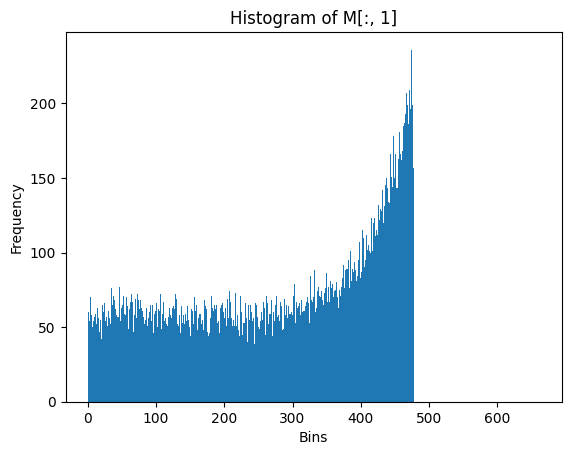

<ipython-input-3-d71e18727ecf>:22: RuntimeWarning: overflow encountered in divide
  res_vec = fwhm_res * (662 / M_tmp[:, 1]) ** 0.5
<ipython-input-3-d71e18727ecf>:22: RuntimeWarning: invalid value encountered in sqrt
  res_vec = fwhm_res * (662 / M_tmp[:, 1]) ** 0.5


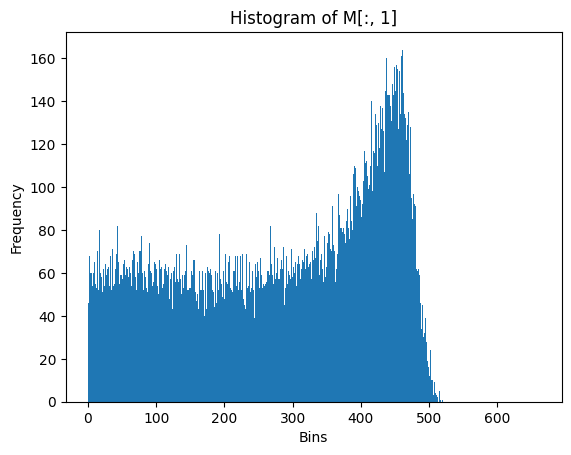

[405.8629534  382.74846967 199.28420121 281.22521236 169.64249024]
[405.8629534  382.74846967 199.28420121 281.22521236 169.64249024]


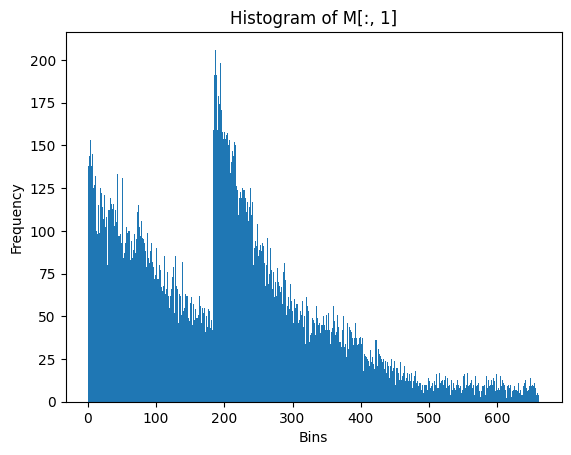

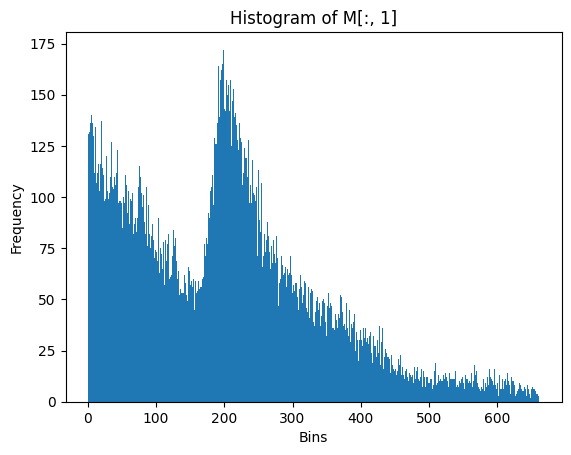

[ 33.78462101  22.64613288 107.30159323 196.48342389 285.36668459]
[ 33.78462101  22.64613288 107.30159323 196.48342389 285.36668459]
counter =  815


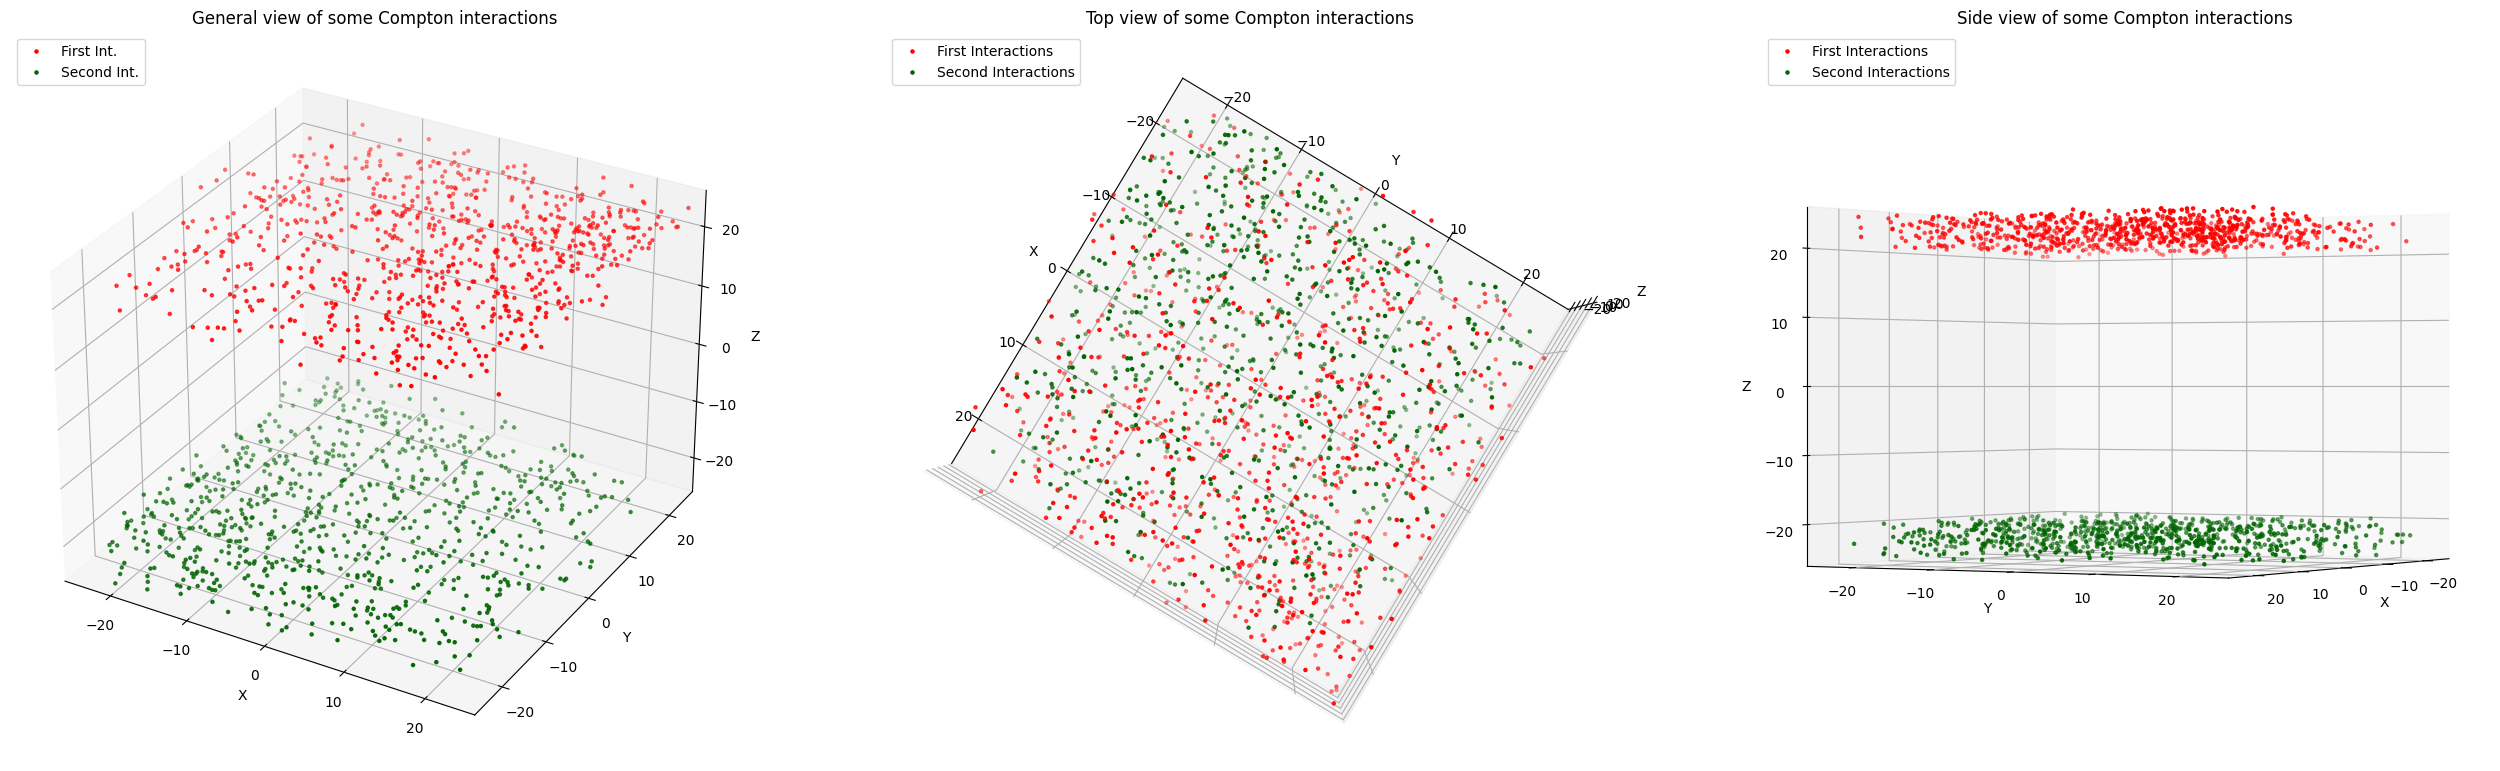

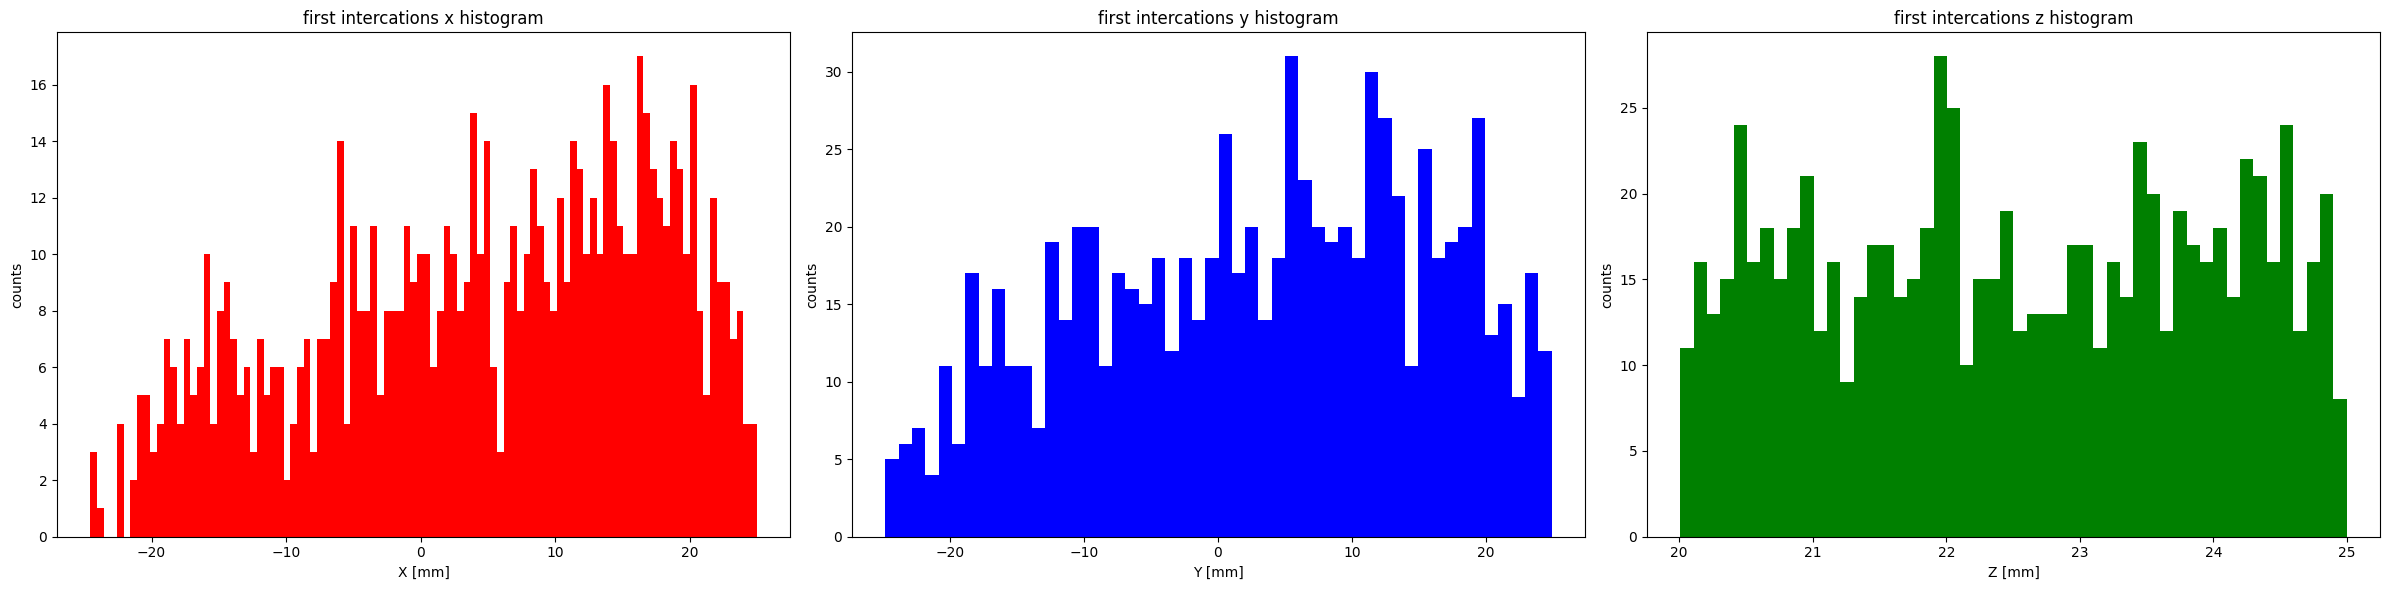

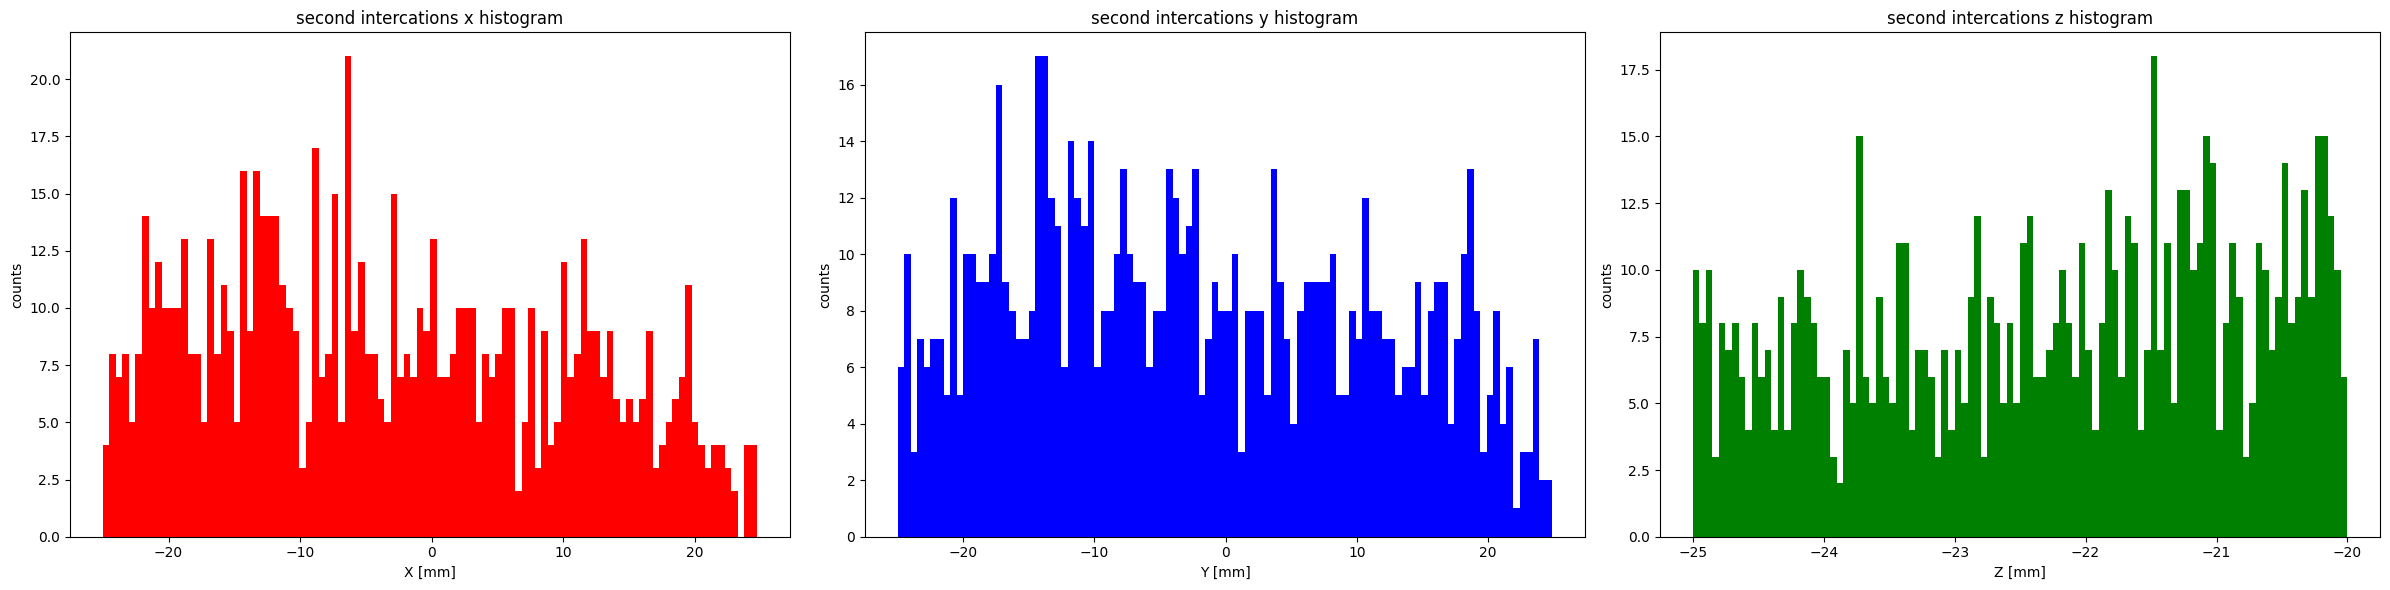

[[-24.5 -24.5 -22.5]
 [-24.5 -24.5  22.5]
 [-24.5 -23.5 -22.5]
 ...
 [ 24.5  23.5  22.5]
 [ 24.5  24.5 -22.5]
 [ 24.5  24.5  22.5]]
[[-24.5 -24.5 -22.5]
 [-24.5 -24.5  22.5]
 [-24.5 -23.5 -22.5]
 ...
 [ 24.5  23.5  22.5]
 [ 24.5  24.5 -22.5]
 [ 24.5  24.5  22.5]]


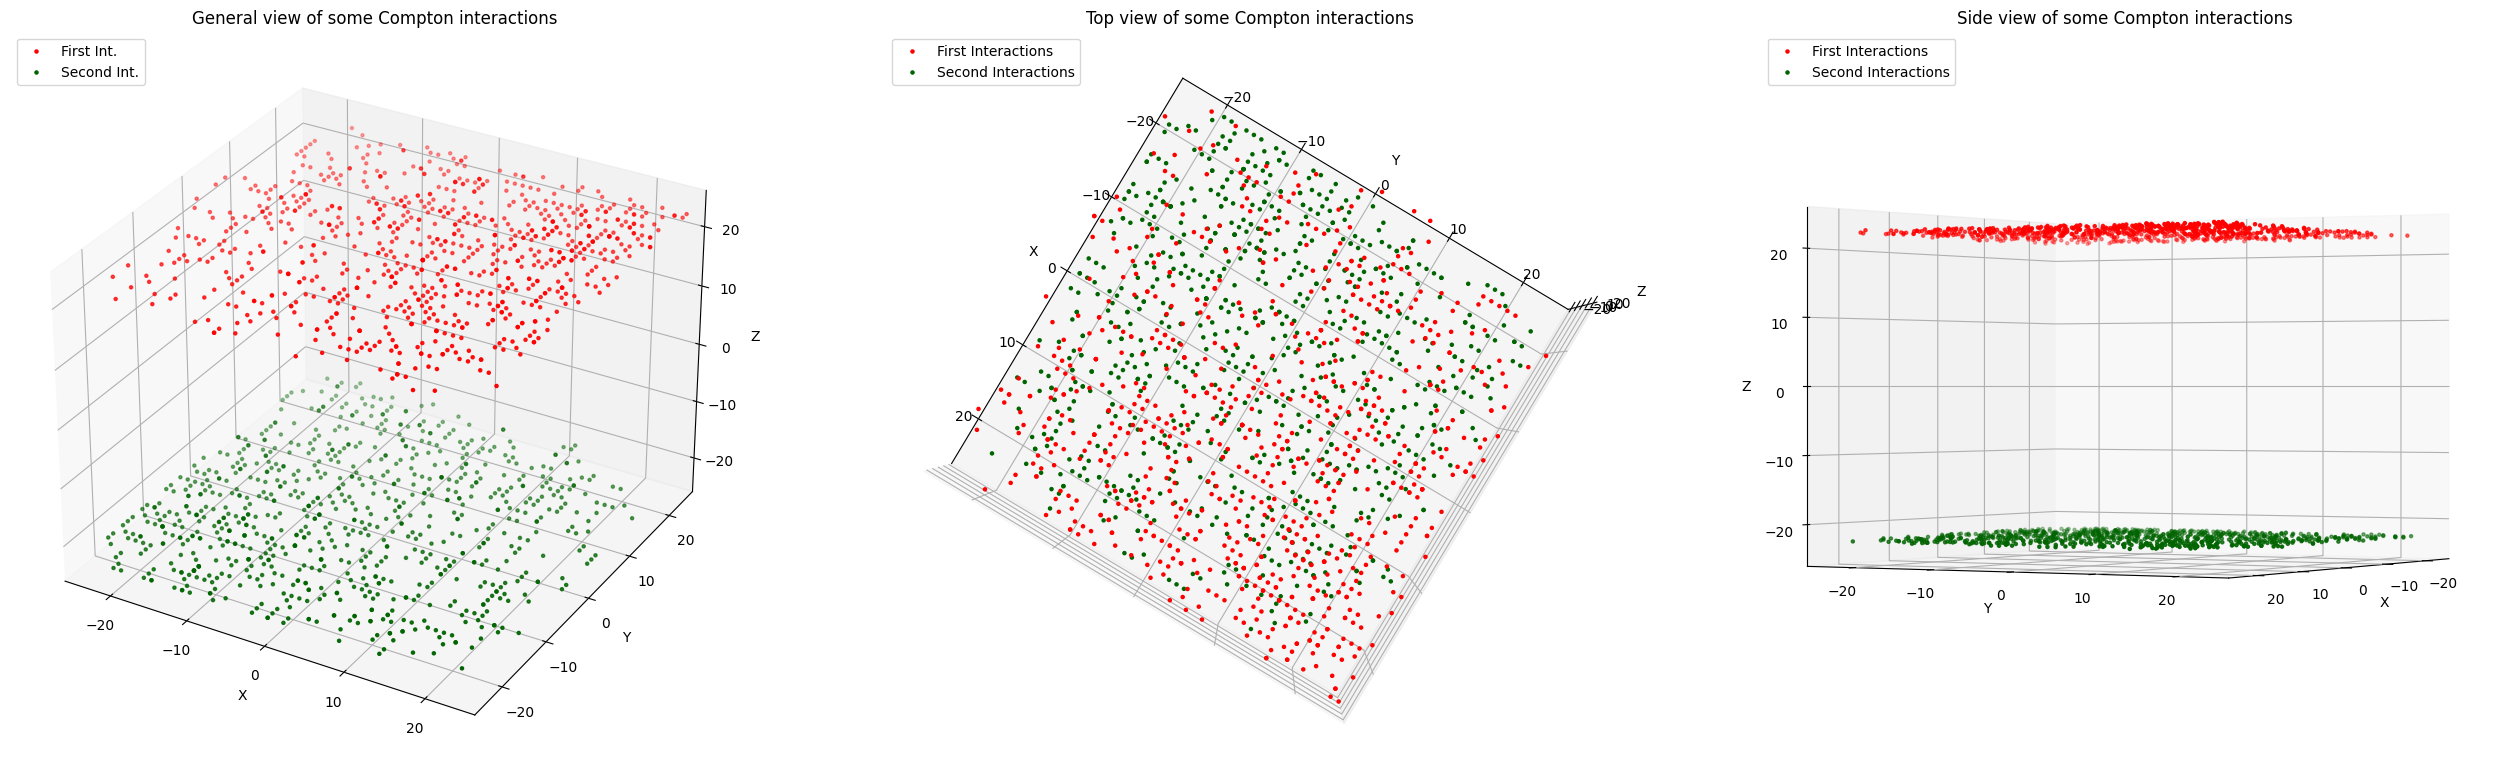

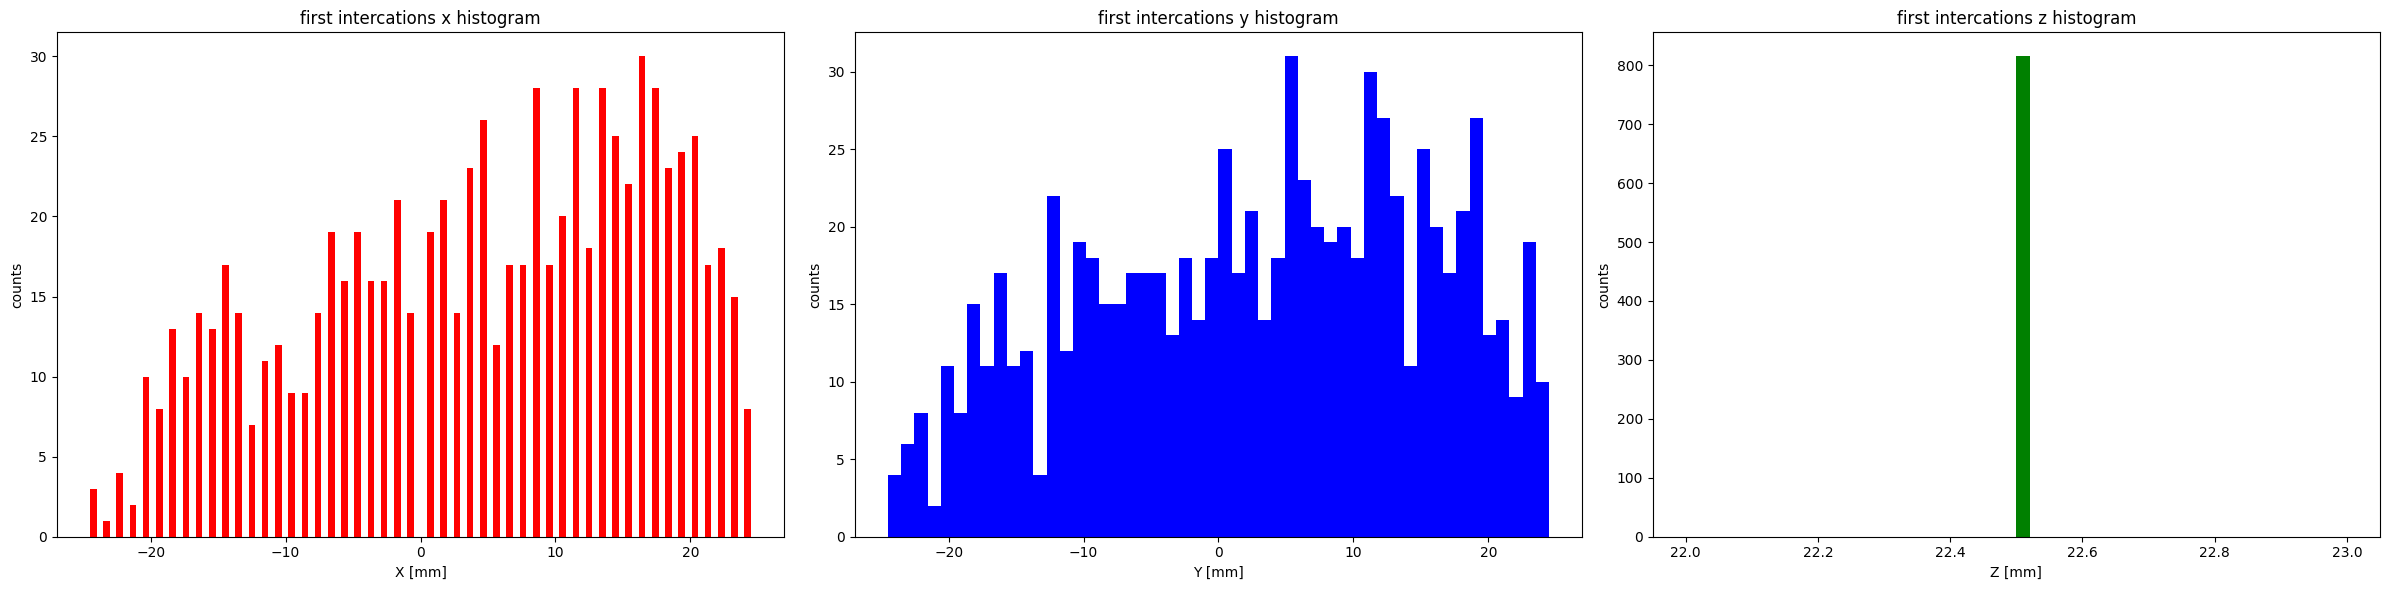

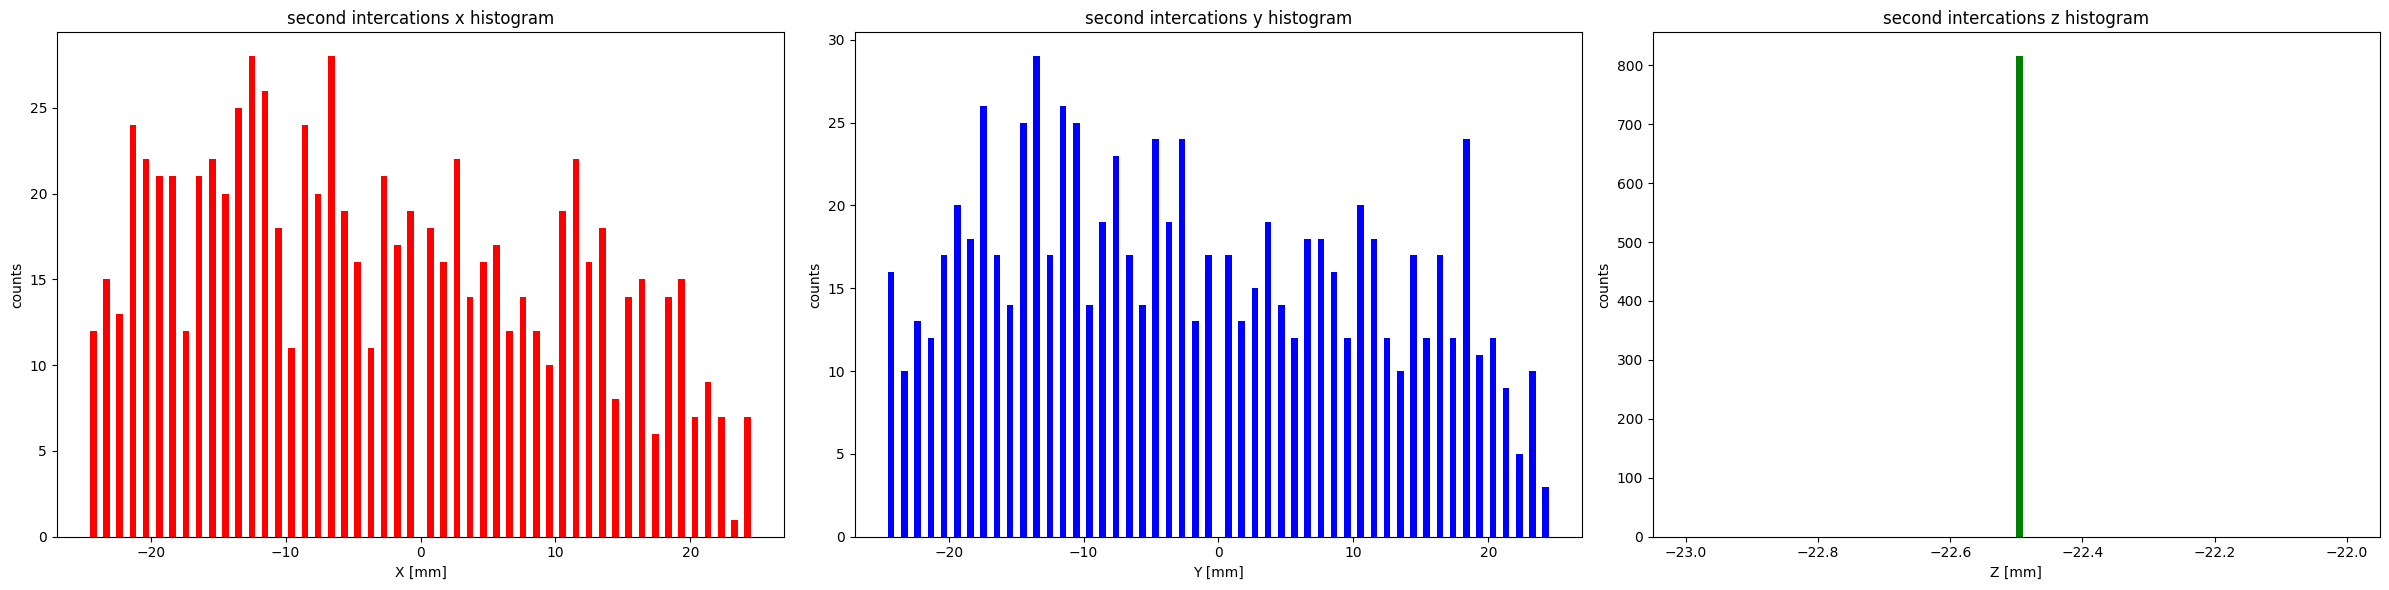

the number of voxels is:
5000
the coordinates of the voxels are:
[[-24.5 -24.5 -22.5]
 [-24.5 -23.5 -22.5]
 [-24.5 -22.5 -22.5]
 ...
 [ 24.5  22.5  22.5]
 [ 24.5  23.5  22.5]
 [ 24.5  24.5  22.5]]
indexed_first_int:
[[   383.             36.43814479   3996.        ]
 [   531.             84.34499398   2948.        ]
 [   829.             32.90376994   3493.        ]
 ...
 [496951.             71.62805001   3588.        ]
 [498026.            100.12076282   4690.        ]
 [499682.             30.78062587   3935.        ]]
All rows have the correct number of '1's.
All columns have the correct number of '1's.


<ipython-input-7-475d093db008>:43: RuntimeWarning: invalid value encountered in divide
  v = v / np.linalg.norm(v)
<ipython-input-7-475d093db008>:109: RuntimeWarning: divide by zero encountered in scalar divide
  alpha = (plane_z_axis - p1[2]) / v_tag[2]
<ipython-input-7-475d093db008>:110: RuntimeWarning: invalid value encountered in multiply
  location = p1 + alpha*v_tag


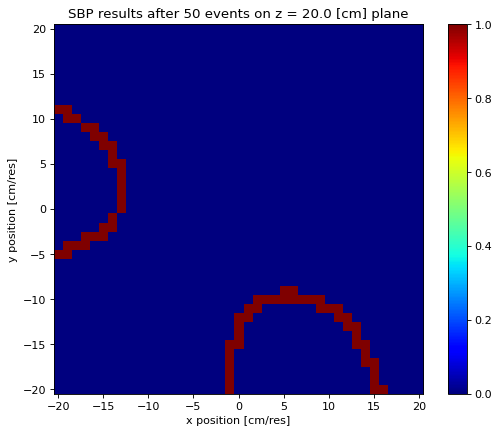

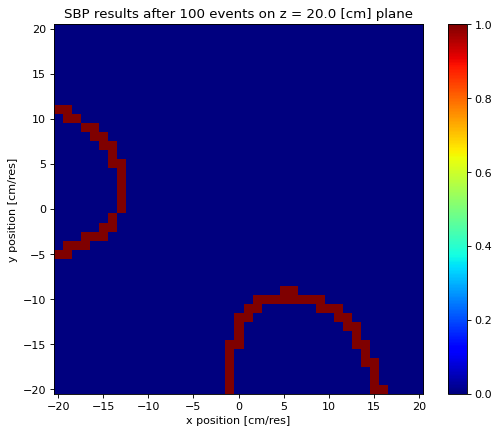

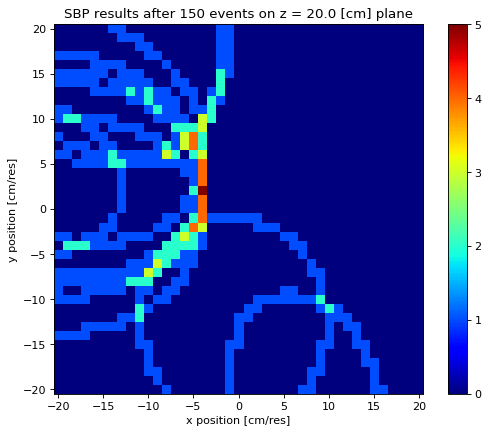

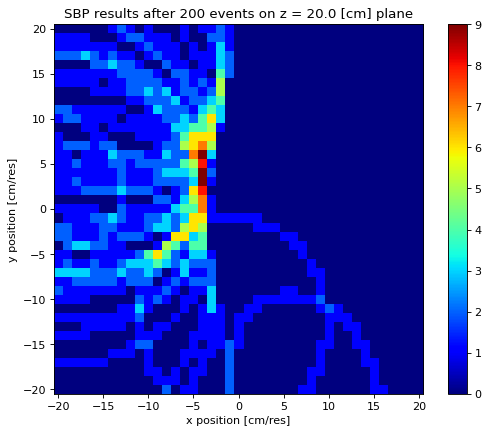

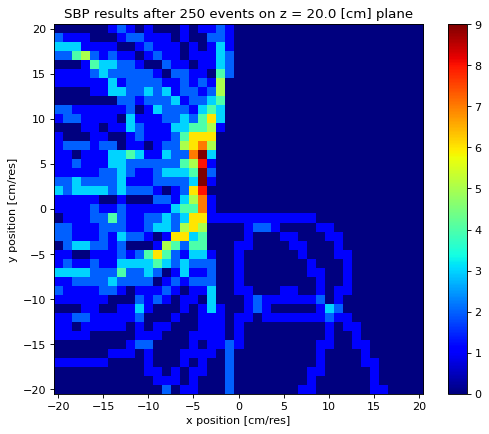

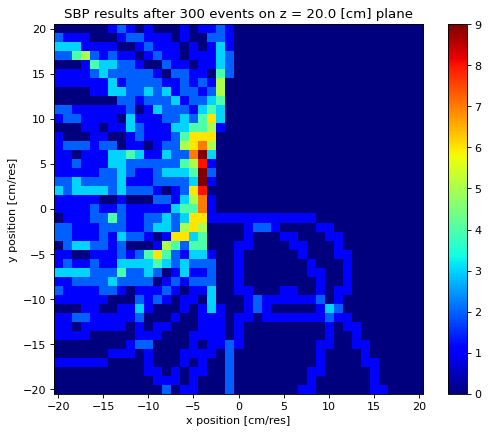

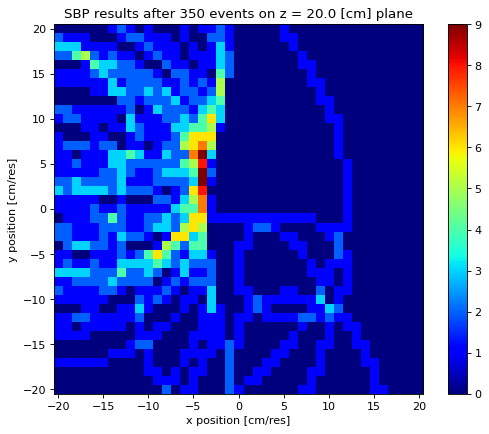

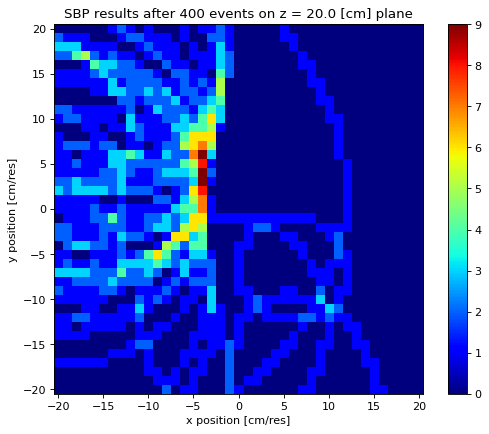

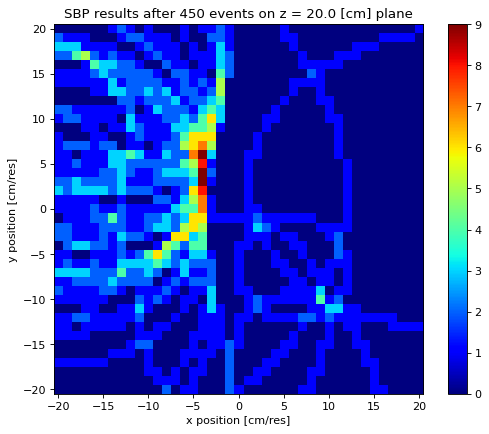

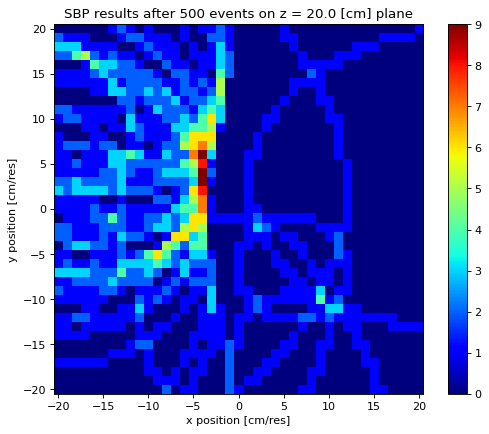

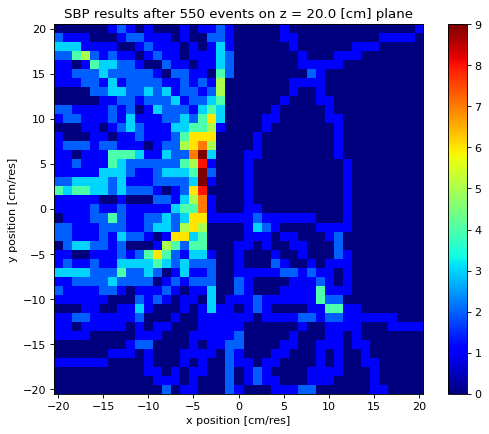

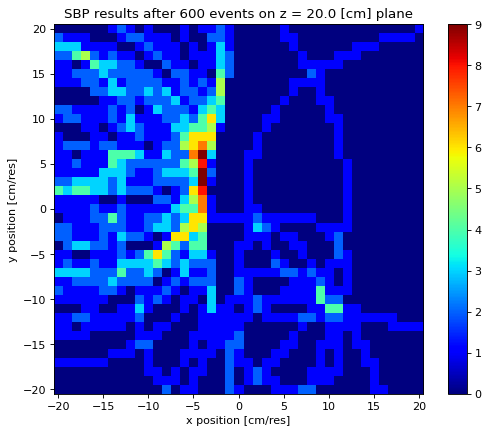

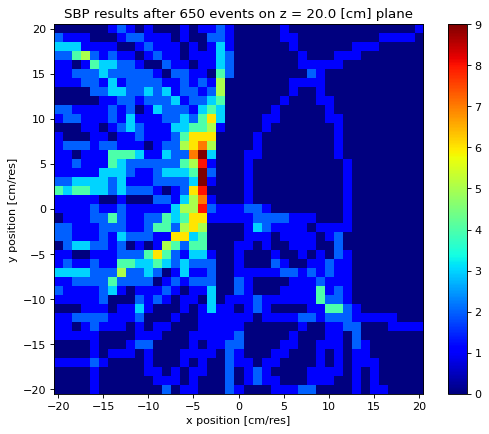

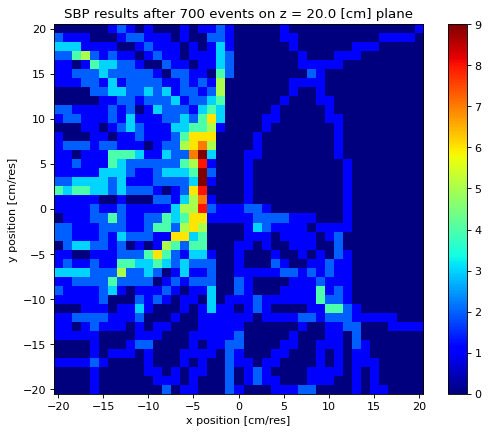

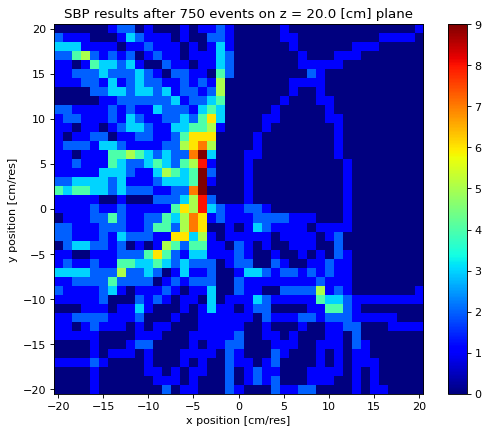

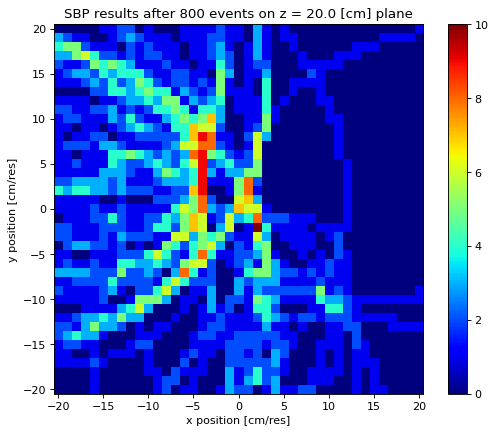

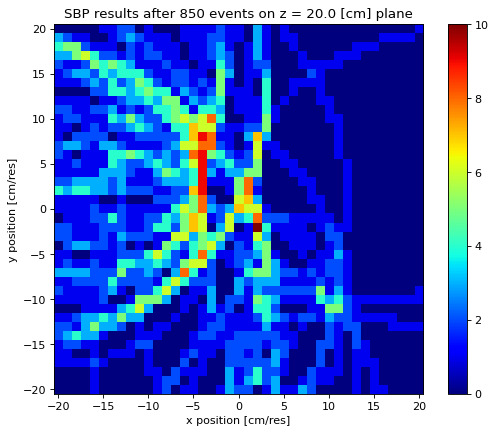

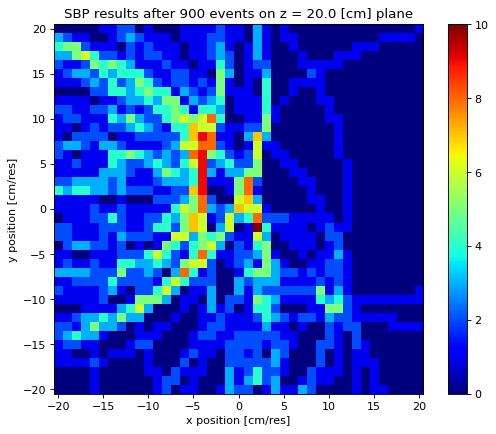

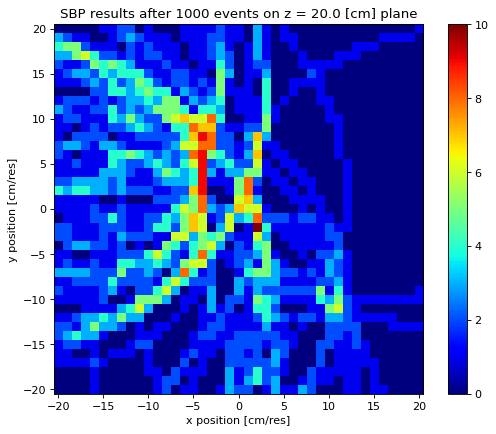

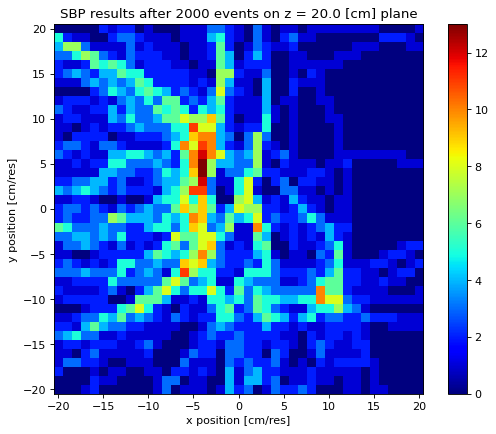

In [ ]:
# Given values
reference_voxels_in_row_x_col = 5
voxels_in_row_values = [50]
voxels_in_col_values = [50]
image_res_values = [10]
seed_values = [1]

# Iterate over all combinations with seed first
for seed in seed_values:
    for voxels_in_row in voxels_in_row_values:
        for voxels_in_col in voxels_in_col_values:
            # Check if voxels_in_row is equal to voxels_in_col
            if voxels_in_row == voxels_in_col:
                for image_res in image_res_values:
                    # Call the main function
                    p1, v21, est_theta, F0 = main(reference_voxels_in_row_x_col, voxels_in_row, voxels_in_col, image_res, seed,save_mat = False)


In [ ]:

def calctij_1(p1, x, y, f_location, deltaXY, plane_z_axis, mu_t, UpperDet_Z):
  R = calcR_1(p1, f_location, plane_z_axis)
  L = calcL_1(p1, f_location, plane_z_axis, UpperDet_Z)
  Delta = calcDelta_1(x, y, f_location, deltaXY)
  return (1/(R**2))*np.exp(-mu_t*L)*Delta

def calcR_1(p, f_location, plane_z_axis):
  planePoint = np.array([f_location[0], f_location[1],plane_z_axis])
  return distance.euclidean(p, planePoint)

def calcL_1(p, f_location, plane_z_axis, UpperDet_Z):
  planePoint = np.array([f_location[0], f_location[1],plane_z_axis])
  v = planePoint - p
  alpha = (UpperDet_Z-p[2])/v[2]
  pnew = p + alpha*v
  return distance.euclidean(pnew, p)

def calcDelta_1(xCone, yCone, f_location, deltaXY):
  fx = f_location[0]
  fy = f_location[1]
  xbool = np.bitwise_and(xCone >= fx - deltaXY / 2, xCone <= fx + deltaXY / 2)
  ybool = np.bitwise_and(yCone >= fy - deltaXY / 2, yCone <= fy + deltaXY / 2)
  decision = np.bitwise_and(xbool,ybool)
  if np.sum(decision) == 0:
    return 0
  return 1

def MLEM_TE(p1, v21, theta, mu_t, plane_z_axis, target_l, UpperDet, deltaXY, K):
    # v21 = v21
    N = len(p1)
    xy = np.arange(-target_l, target_l + deltaXY, deltaXY)
    m1 = len(xy)
    M = m1**2

    f = np.ones((3, M))
    xx, yy = np.meshgrid(xy, xy)
    #xx = xx.T
    #yy = yy.T
    f[1, :] = xx.flatten()
    f[2, :] = yy.flatten()
    F = np.zeros((K,M))
    coneNumDeg = 360
    T = np.zeros((N, M))
    x = np.zeros((N, coneNumDeg))
    y = np.zeros((N, coneNumDeg))

    #Ts = np.zeros((N, int(M**0.5 * 4)))  # maxx
    #print('Ts shape',Ts.shape)
    print(' Tij[%]   ')

    image_res = deltaXY
    image_size = 2 * target_l + 1
    for j in range(N):
        image, x[j], y[j] = calcCone(p1[j, :], v21[j, :], theta[j], coneNumDeg, plane_z_axis, image_res, image_size, target_l)
        #print(x[j], y[j])
        #xout = np.round(xout / 10) * 10
        #yout = np.round(xout / 10) * 10
        #A = np.unique(np.vstack((xout, yout)).T, axis=0)
        #print('A.shape[0]',A.shape[0])
        #Ts[j, 0] = A.shape[0]  # maxx
        for i in range(M):#min(A.shape[0]-1,Ts.shape[1]-1)):
          #if(A[i, 0] <= 200) & (A[i, 0] >= -200) & (A[i, 1] >= -200) & (A[i, 1] <= 200):
            #print('f[1:, :] is', f[1:, :])
            #print('A[i, :] is', A[i, :])
            #print('A[i, :].reshape((2, 1)) is',A[i, :].reshape((2, 1)))
            #m = np.where(np.sum(f[1:, :] == A[i, :].reshape((2, 1)), axis=0) == 2)[0]
            #print('m is', m)
            T[j, i] = calctij_1(p1[j], x[j], y[j], f[1:,i],deltaXY, plane_z_axis, mu_t, UpperDet)
            #print(m)
            #Ts[j, i + 1] = m  # maxx, saves the location of m in T, used afterward for speed up

    for iter in range(K): #iterations of ML-EM
      for l in range(M): #pixels
        fl = f[0,l]
        fl_next = 0
        for j in range (N): #events
          if np.isnan(x[j]).any() or np.isnan(y[j]).any():
              #skipping troubled events when v21 = (0,0,0) or v21 = (0,0,z~=0), smalll amount total
                continue
          denom = np.matmul(T[j, :], f[0])
          if denom > 0:
            fl_next += fl * T[j, l] / denom
        f[0, l] = fl_next #update
      F[iter, :] = f[0]
      plt.figure(iter)
      plt.imshow(F[iter].reshape(m1, -1), cmap = 'jet')
      plt.colorbar()  # Add a colorbar for reference
      plt.xlabel('x')
      plt.ylabel('y')
      plt.title('MLEM result for K = ' + str(iter))
      plt.show()
    return F, f[0].reshape(m1, -1), m1


In [ ]:
mu_t = (4.5 * 0.06357) / 10

target_l = 200  # [mm] from -200:10:200
plane_z_axis = 200
UpperDet = 25
deltaXY = 10  # [mm]
target_l = np.ceil((target_l / deltaXY)) * deltaXY

K = 8  # iterations

m1_vec = np.arange(0, target_l + deltaXY, deltaXY)
m1_vec = np.concatenate([-m1_vec[-1:0:-1], m1_vec])
m1 = len(m1_vec)


#T, Ts, Ms = MLEM_Preset(p1, v21, est_theta, mu_t, plane_z_axis, target_l, UpperDet, deltaXY)

In [ ]:
def MLEM_Grouped(p1, v21, theta, mu_t, plane_z_axis, target_l, UpperDet, deltaXY, K, voxels_per_channels):
    # v21 = v21
    N = len(p1)
    xy = np.arange(-target_l, target_l + deltaXY, deltaXY)
    m1 = len(xy)
    M = m1**2

    f = np.ones((3, M))
    xx, yy = np.meshgrid(xy, xy)
    #xx = xx.T
    #yy = yy.T
    f[1, :] = xx.flatten()
    f[2, :] = yy.flatten()
    F = np.zeros((K,M))
    coneNumDeg = 360
    T = np.zeros((N, M))
    x = np.zeros((N, coneNumDeg))
    y = np.zeros((N, coneNumDeg))
    T_grouped = np.zeros((int(N/voxels_per_channel), M))
    #Ts = np.zeros((N, int(M**0.5 * 4)))  # maxx
    #print('Ts shape',Ts.shape)
    print(' Tij[%]   ')

    image_res = deltaXY
    image_size = 2 * target_l + 1
    for j in range(N):
        image, x[j], y[j] = calcCone(p1[j, :], v21[j, :], theta[j], coneNumDeg, plane_z_axis, image_res, image_size, target_l)
        #print(x[j], y[j])
        #xout = np.round(xout / 10) * 10
        #yout = np.round(xout / 10) * 10
        #A = np.unique(np.vstack((xout, yout)).T, axis=0)
        #print('A.shape[0]',A.shape[0])
        #Ts[j, 0] = A.shape[0]  # maxx
        for i in range(M):#min(A.shape[0]-1,Ts.shape[1]-1)):
          #if(A[i, 0] <= 200) & (A[i, 0] >= -200) & (A[i, 1] >= -200) & (A[i, 1] <= 200):
            #print('f[1:, :] is', f[1:, :])
            #print('A[i, :] is', A[i, :])
            #print('A[i, :].reshape((2, 1)) is',A[i, :].reshape((2, 1)))
            #m = np.where(np.sum(f[1:, :] == A[i, :].reshape((2, 1)), axis=0) == 2)[0]
            #print('m is', m)
            T[j, i] = calctij_1(p1[j], x[j], y[j], f[1:,i],deltaXY, plane_z_axis, mu_t, UpperDet)
            #print(m)
            #Ts[j, i + 1] = m  # maxx, saves the location of m in T, used afterward for speed up

    for iter in range(K): #iterations of ML-EM
      for l in range(M): #pixels
        fl = f[0,l]
        fl_next = 0
        for j in range (int(N/voxels_per_channel)): #events
          #T_grouped = 0 #      <<<<<--------------------             Grouped Additon
          for m in range (voxels_per_channel): #      <<<<<--------------------             Grouped Additon
            T_grouped[j,:] = T_grouped[j,:] + T[voxels_per_channels*j + m, :]
          if np.isnan(x[j]).any() or np.isnan(y[j]).any():
              #skipping troubled events when v21 = (0,0,0) or v21 = (0,0,z~=0), smalll amount total
                continue
          denom = np.matmul(T_grouped[j,:], f[0]) #      <<<<<--------------------             Grouped Change
          if denom > 0:
            fl_next += voxels_per_channel * fl * T_grouped[j,l] / denom #      <<<<<--------------------             Grouped Change
        f[0, l] = fl_next #update
      F[iter, :] = f[0]
      plt.figure(iter)
      plt.imshow(F[iter].reshape(m1, -1), cmap = 'jet')
      plt.colorbar()  # Add a colorbar for reference
      plt.xlabel('x')
      plt.ylabel('y')
      plt.title('MLEM result for K = ' + str(iter))
      plt.show()
    return F, f[0].reshape(m1, -1), m1

 Tij[%]   


<ipython-input-22-00355e0e7d51>:95: RuntimeWarning: invalid value encountered in divide
  v_orth = v_orth / np.linalg.norm(v_orth)


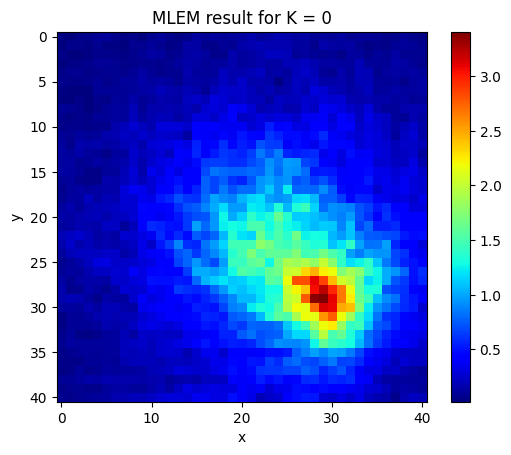

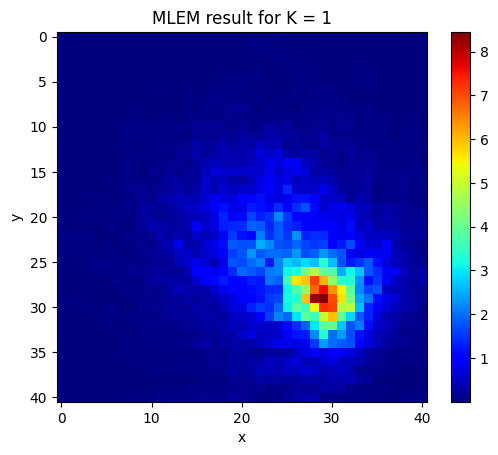

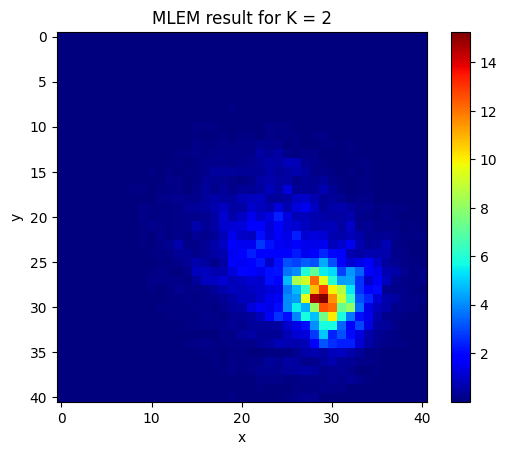

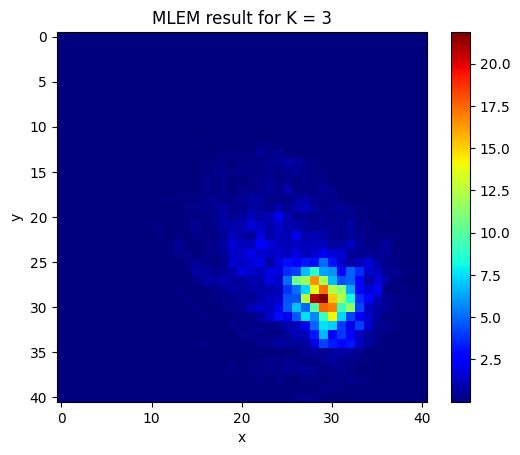

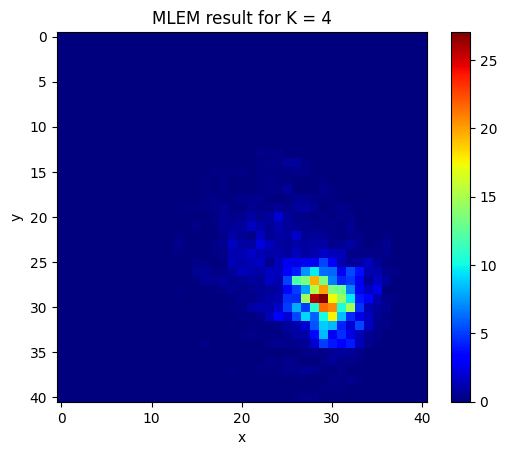

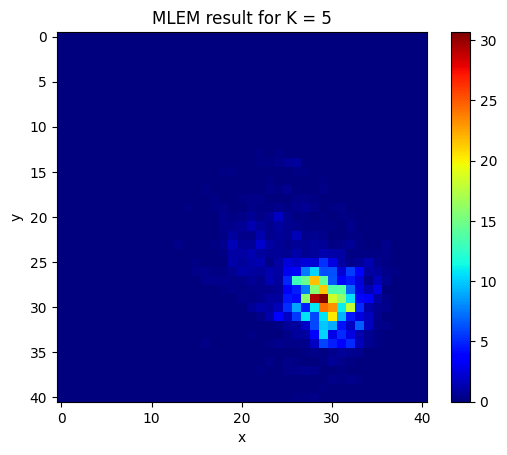

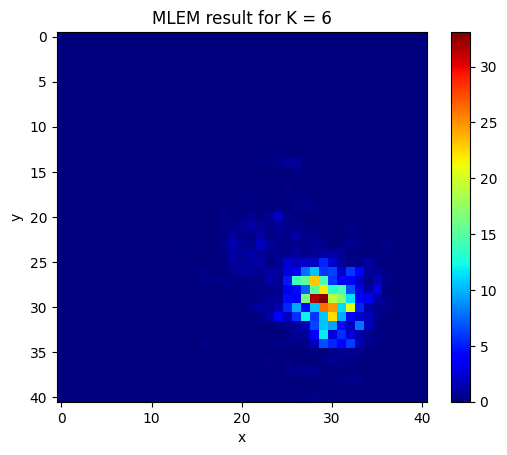

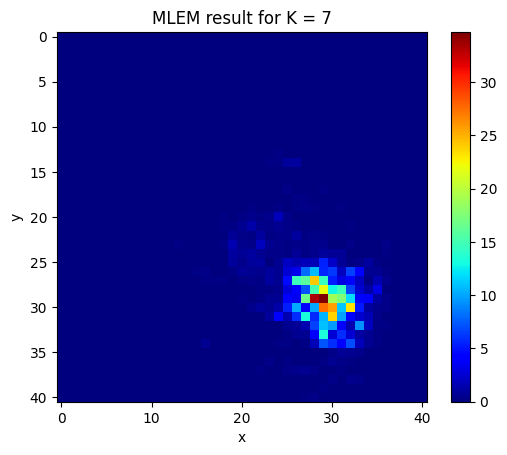

In [ ]:
F, target_final,moshe = MLEM_TE(p1, v21, est_theta, mu_t, plane_z_axis, target_l, UpperDet, deltaXY, K)

In [ ]:
# 10 X 10

mu_t = (4.5 * 0.06357) / 10

target_l = 200  # [mm] from -200:10:200
plane_z_axis = 200
UpperDet = 25
deltaXY = 10  # [mm]
target_l = np.ceil((target_l / deltaXY)) * deltaXY

K = 8  # iterations

m1_vec = np.arange(0, target_l + deltaXY, deltaXY)
m1_vec = np.concatenate([-m1_vec[-1:0:-1], m1_vec])
m1 = len(m1_vec)


#T, Ts, Ms = MLEM_Preset(p1, v21, est_theta, mu_t, plane_z_axis, target_l, UpperDet, deltaXY)

 Tij[%]   


<ipython-input-31-475d093db008>:109: RuntimeWarning: divide by zero encountered in double_scalars
  alpha = (plane_z_axis - p1[2]) / v_tag[2]
<ipython-input-31-475d093db008>:110: RuntimeWarning: invalid value encountered in multiply
  location = p1 + alpha*v_tag
<ipython-input-31-475d093db008>:92: RuntimeWarning: invalid value encountered in divide
  v = v21 / np.linalg.norm(v21)
<ipython-input-31-475d093db008>:95: RuntimeWarning: invalid value encountered in divide
  v_orth = v_orth / np.linalg.norm(v_orth)


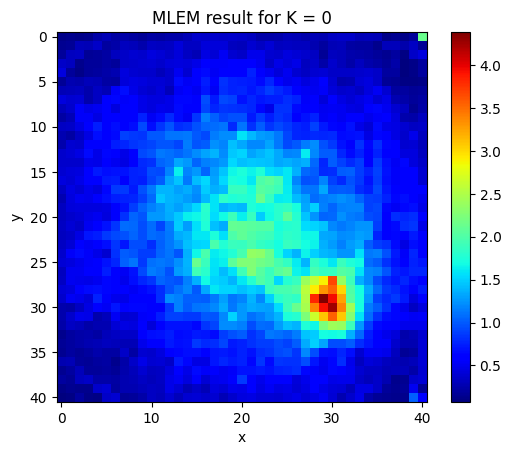

KeyboardInterrupt: 

In [ ]:
# 10 X 10
F, target_final,moshe = MLEM_TE(p1, v21, est_theta, mu_t, plane_z_axis, target_l, UpperDet, deltaXY, K)

 Tij[%]   


<ipython-input-31-475d093db008>:109: RuntimeWarning: divide by zero encountered in double_scalars
  alpha = (plane_z_axis - p1[2]) / v_tag[2]
<ipython-input-31-475d093db008>:110: RuntimeWarning: invalid value encountered in multiply
  location = p1 + alpha*v_tag
<ipython-input-31-475d093db008>:92: RuntimeWarning: invalid value encountered in divide
  v = v21 / np.linalg.norm(v21)
<ipython-input-31-475d093db008>:95: RuntimeWarning: invalid value encountered in divide
  v_orth = v_orth / np.linalg.norm(v_orth)


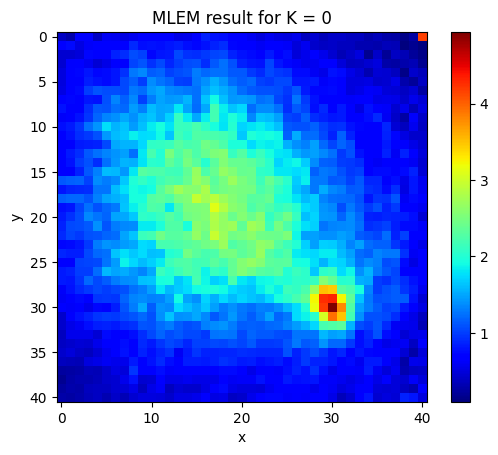

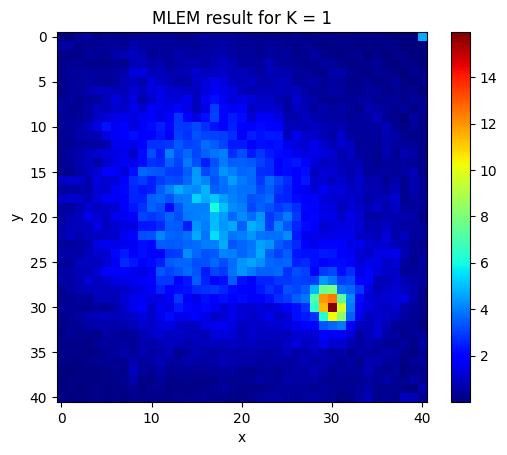

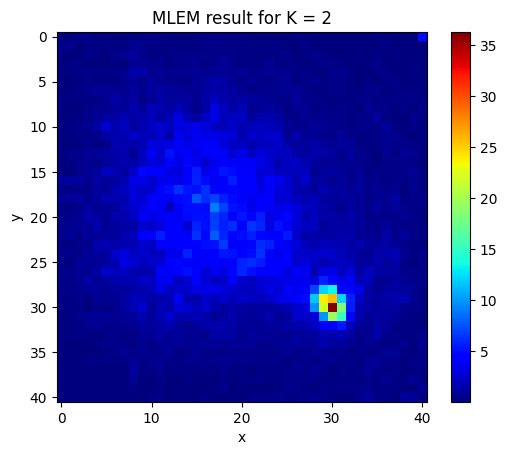

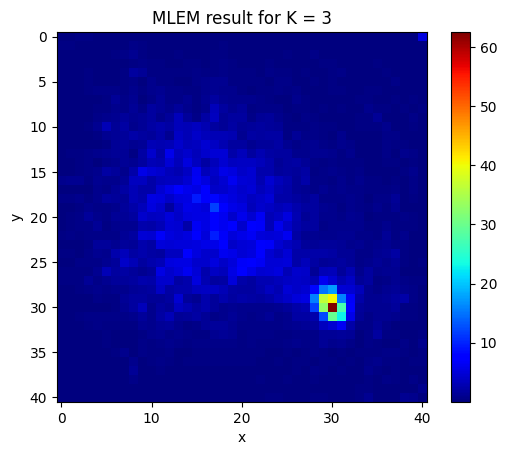

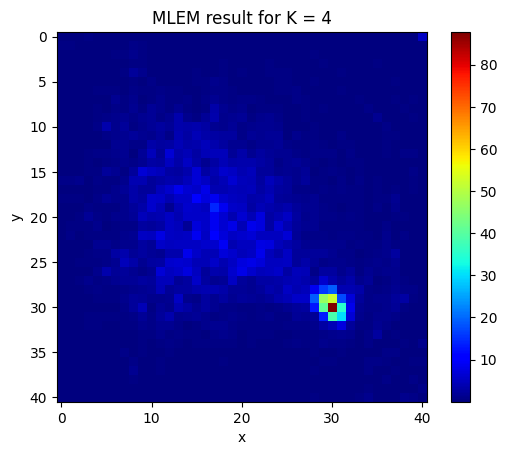

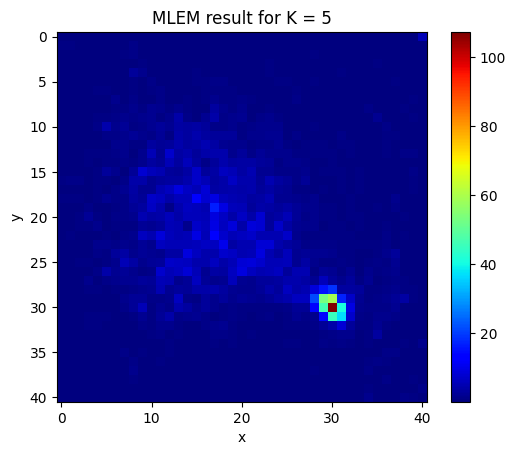

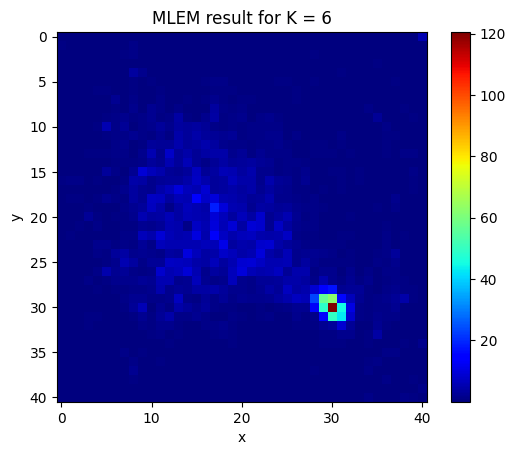

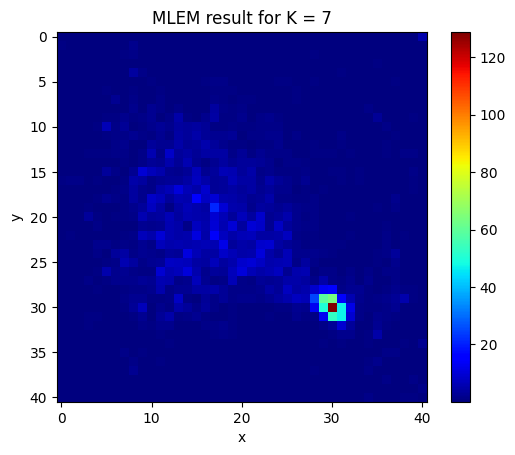

In [ ]:
# 20 X 20
F, target_final,moshe = MLEM_TE(p1, v21, est_theta, mu_t, plane_z_axis, target_l, UpperDet, deltaXY, K)

 Tij[%]   


<ipython-input-31-475d093db008>:92: RuntimeWarning: invalid value encountered in divide
  v = v21 / np.linalg.norm(v21)
<ipython-input-31-475d093db008>:109: RuntimeWarning: divide by zero encountered in double_scalars
  alpha = (plane_z_axis - p1[2]) / v_tag[2]
<ipython-input-31-475d093db008>:110: RuntimeWarning: invalid value encountered in multiply
  location = p1 + alpha*v_tag


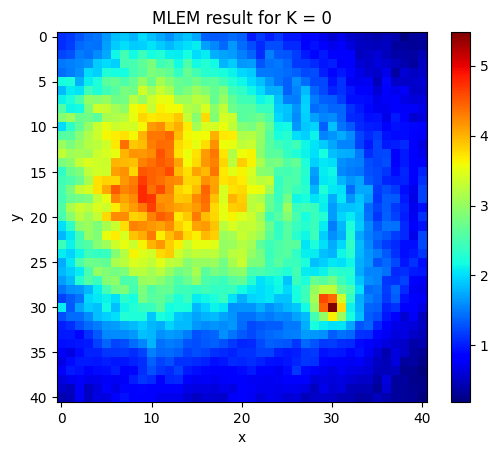

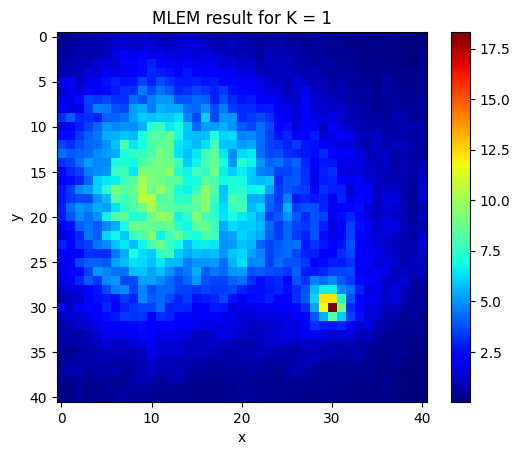

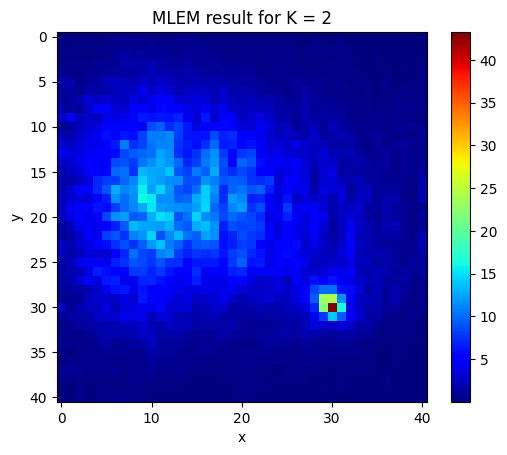

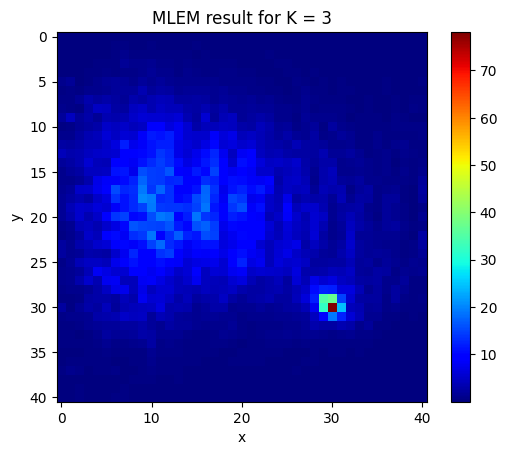

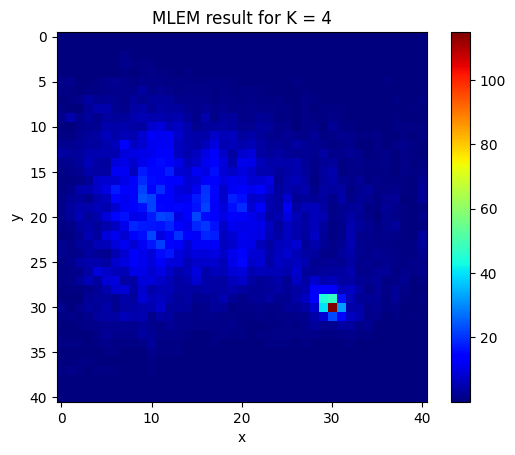

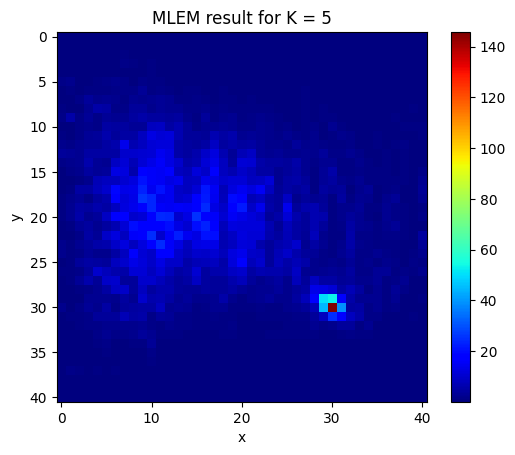

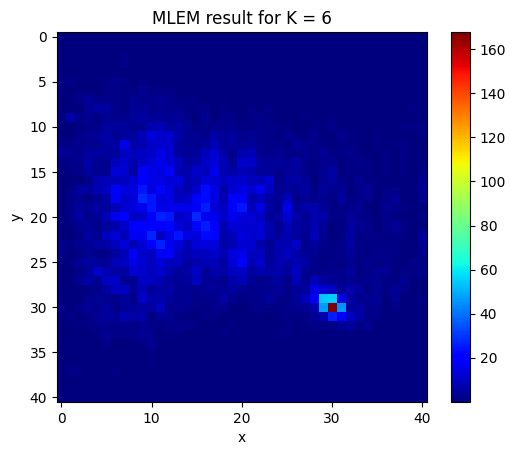

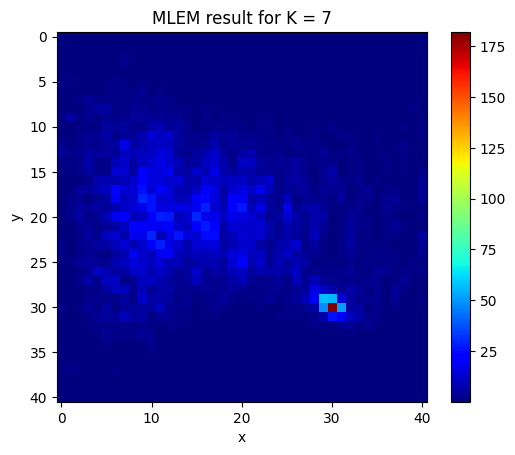

In [ ]:
# 50 X 50
F, target_final,moshe = MLEM_TE(p1, v21, est_theta, mu_t, plane_z_axis, target_l, UpperDet, deltaXY, K)

In [ ]:
# 50 X 50 with new MLEM
voxels_per_channel = 100
F, target_final,moshe = MLEM_Grouped(p1, v21, est_theta, mu_t, plane_z_axis, target_l, UpperDet, deltaXY, K, voxels_per_channel)

 Tij[%]   


<ipython-input-7-475d093db008>:92: RuntimeWarning: invalid value encountered in divide
  v = v21 / np.linalg.norm(v21)
<ipython-input-7-475d093db008>:109: RuntimeWarning: divide by zero encountered in double_scalars
  alpha = (plane_z_axis - p1[2]) / v_tag[2]
<ipython-input-7-475d093db008>:110: RuntimeWarning: invalid value encountered in multiply
  location = p1 + alpha*v_tag
